# Markets Insider Canadian Government Bond Data Extraction and Plotting
### Created and Maintained by Jaspreet Khela

Note: You need to run this notebook to generate the CSV files in the Google Colab filesystem (on the left side). Please double check the data in the CSV files against official sources to ensure data collection accuracy.

## Markets Insider Bond Data Extraction Script: Overview and Disclaimer

### Overview

This script programmatically extracts **Canadian government bond data** from Markets Insider and produces:

1. **Bond metadata**  
   Parsed directly from each bond’s “Bond Data” HTML table, including:
   - ISIN  
   - Name  
   - Issuer  
   - Country  
   - Currency  
   - Issue price and issue date  
   - Coupon rate and payment characteristics  
   - Maturity date and coupon schedule  

2. **Historical closing prices**  
   Retrieved via Markets Insider’s internal `Chart_GetChartData` JSON endpoint using the bond’s `tkData` identifier.  
   The script:
   - Extracts raw time series points from nested JSON structures  
   - Converts timestamps into calendar dates  
   - Filters observations to **weekdays only**  
   - Restricts data to a **single, user-defined date window**

3. **Bond classification**  
   Each bond is classified as:
   - **Short-term** if it matures within three years of the configured start date  
   - **Long-term** otherwise  

4. **Per-bond outputs**
   For each bond, the script:
   - Displays a clearly labeled dataframe in Google Colab (preceded by a readable bond title)  
   - Exports **one CSV file per bond** containing its full cleaned dataset  
   - Generates two plots:
     - Closing price over time (percent of par)  
     - Daily log returns  

5. **Master dataset**
   A single **root master CSV** is generated that vertically concatenates all individual bond dataframes.  
   This master file contains the same columns as the per-bond CSVs and is intended for downstream analysis or archiving.

### Design principles

- **Single source of truth for dates**  
  The start and end dates are defined once at the top of the script and automatically applied to all bonds.

- **Minimal redundancy**  
  Only essential identifiers are retained in each row. Redundant repeated identifiers have been removed to keep tables compact while preserving documentation URLs.

- **Maintainability**
  - Modular helper functions for parsing, filtering, classification, and plotting  
  - Extensive inline comments explaining purpose and assumptions  
  - No reliance on browser automation or fragile DOM event hooks  

### Disclaimer

- **Date range input required**  
  The script requires the user to explicitly specify the start and end dates at the top of the file. Results are strictly limited to this window.

- **Unofficial data source**  
  Markets Insider does not provide a documented public API for this data. The script relies on observed HTML structure and internal JSON endpoints, which may change without notice.

- **Verification strongly recommended**  
  All scraped data should be cross-checked against official sources (e.g., Government of Canada publications or primary dealer data) before being used for academic, financial, or professional purposes.

Use this script as a **data collection aid**, not as an authoritative source of record.


### Contact

Contact jaspreet.khela@mail.utoronto.ca or visit https://jaspreetkhela.github.io/JaspreetKhela/ to get in touch! Enjoy :)

## Canadian Bonds Data Scraper Script

Root master CSV written: bonds_master_all.csv

BOND: Short-term | CDA 2026 | 1.500% | Mat 6/1/2026 | CA135087E679


Term                                      bond_page_url  \
36  Short-term  https://markets.businessinsider.com/bonds/cana...   
37  Short-term  https://markets.businessinsider.com/bonds/cana...   
38  Short-term  https://markets.businessinsider.com/bonds/cana...   
39  Short-term  https://markets.businessinsider.com/bonds/cana...   
40  Short-term  https://markets.businessinsider.com/bonds/cana...   
41  Short-term  https://markets.businessinsider.com/bonds/cana...   
42  Short-term  https://markets.businessinsider.com/bonds/cana...   
43  Short-term  https://markets.businessinsider.com/bonds/cana...   
44  Short-term  https://markets.businessinsider.com/bonds/cana...   

                 tkData                                     chart_json_url  \
36  1,28975906,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
37  1,28975906,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
38  1,28975906,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
39  1,28975906,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
40  1,28975906,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
41  1,28975906,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
42  1,28975906,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
43  1,28975906,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
44  1,28975906,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

            ISIN      Name Country                    Issuer    Issue Volume  \
36  CA135087E679  CDA 2026  Canada  Canada, Government of...  13,472,000,000   
37  CA135087E679  CDA 2026  Canada  Canada, Government of...  13,472,000,000   
38  CA135087E679  CDA 2026  Canada  Canada, Government of...  13,472,000,000   
39  CA135087E679  CDA 2026  Canada  Canada, Government of...  13,472,000,000   
40  CA135087E679  CDA 2026  Canada  Canada, Government of...  13,472,000,000   
41  CA135087E679  CDA 2026  Canada  Canada, Government of...  13,472,000,000   
42  CA135087E679  CDA 2026  Canada  Canada, Government of...  13,472,000,000   
43  CA135087E679  CDA 2026  Canada  Canada, Government of...  13,472,000,000   
44  CA135087E679  CDA 2026  Canada  Canada, Government of...  13,472,000,000   

   Currency  ... Special Coupon Type Maturity Date Coupon Payment Date  \
36      CAD  ...                          6/1/2026            6/1/2026   
37      CAD  ...                          6/1/2026            6/1/2026   
38      CAD  ...                          6/1/2026            6/1/2026   
39      CAD  ...                          6/1/2026            6/1/2026   
40      CAD  ...                          6/1/2026            6/1/2026   
41      CAD  ...                          6/1/2026            6/1/2026   
42      CAD  ...                          6/1/2026            6/1/2026   
43      CAD  ...                          6/1/2026            6/1/2026   
44      CAD  ...                          6/1/2026            6/1/2026   

   Payment Frequency No. of Payments per Year Coupon Start Date  \
36                                        2.0         12/1/2015   
37                                        2.0         12/1/2015   
38                                        2.0         12/1/2015   
39                                        2.0         12/1/2015   
40                                        2.0         12/1/2015   
41                                        2.0         12/1/2015   
42                                        2.0         12/1/2015   
43                                        2.0         12/1/2015   
44                                        2.0         12/1/2015   

   Final Coupon Date Floater?        date Close Price (% of par)  
36         5/31/2026       No  2026-01-05                 99.680  
37         5/31/2026       No  2026-01-06                 99.690  
38         5/31/2026       No  2026-01-07                 99.690  
39         5/31/2026       No  2026-01-08                

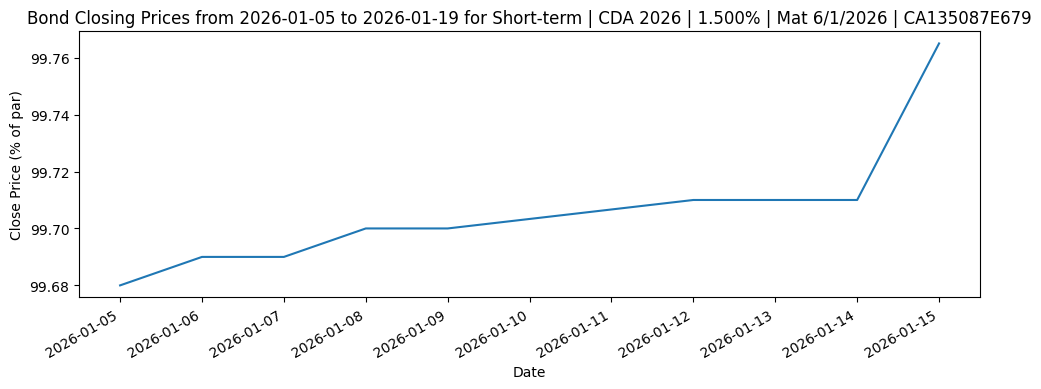

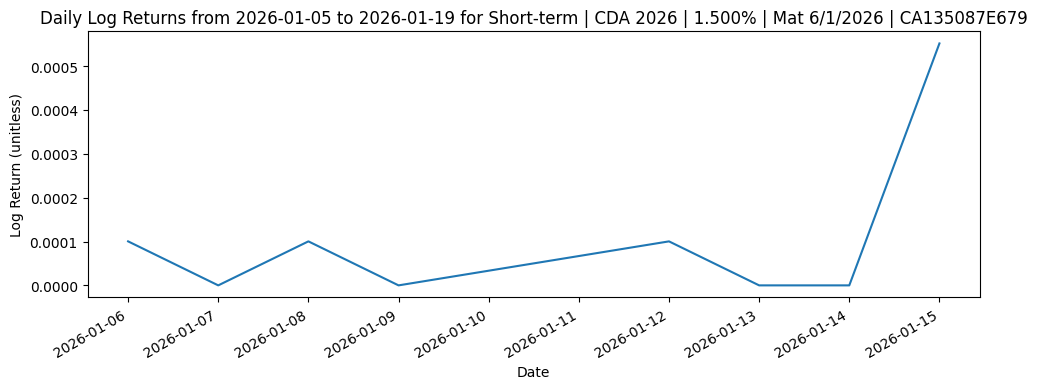


BOND: Short-term | CDA 2027 | 1.000% | Mat 6/1/2027 | CA135087F825


Term                                      bond_page_url  \
99   Short-term  https://markets.businessinsider.com/bonds/cana...   
100  Short-term  https://markets.businessinsider.com/bonds/cana...   
101  Short-term  https://markets.businessinsider.com/bonds/cana...   
102  Short-term  https://markets.businessinsider.com/bonds/cana...   
103  Short-term  https://markets.businessinsider.com/bonds/cana...   
104  Short-term  https://markets.businessinsider.com/bonds/cana...   
105  Short-term  https://markets.businessinsider.com/bonds/cana...   
106  Short-term  https://markets.businessinsider.com/bonds/cana...   
107  Short-term  https://markets.businessinsider.com/bonds/cana...   

                  tkData                                     chart_json_url  \
99   1,33461441,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
100  1,33461441,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
101  1,33461441,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
102  1,33461441,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
103  1,33461441,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
104  1,33461441,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
105  1,33461441,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
106  1,33461441,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
107  1,33461441,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

             ISIN      Name Country                    Issuer    Issue Volume  \
99   CA135087F825  CDA 2027  Canada  Canada, Government of...  15,490,000,000   
100  CA135087F825  CDA 2027  Canada  Canada, Government of...  15,490,000,000   
101  CA135087F825  CDA 2027  Canada  Canada, Government of...  15,490,000,000   
102  CA135087F825  CDA 2027  Canada  Canada, Government of...  15,490,000,000   
103  CA135087F825  CDA 2027  Canada  Canada, Government of...  15,490,000,000   
104  CA135087F825  CDA 2027  Canada  Canada, Government of...  15,490,000,000   
105  CA135087F825  CDA 2027  Canada  Canada, Government of...  15,490,000,000   
106  CA135087F825  CDA 2027  Canada  Canada, Government of...  15,490,000,000   
107  CA135087F825  CDA 2027  Canada  Canada, Government of...  15,490,000,000   

    Currency  ... Special Coupon Type Maturity Date Coupon Payment Date  \
99       CAD  ...                          6/1/2027            6/1/2026   
100      CAD  ...                          6/1/2027            6/1/2026   
101      CAD  ...                          6/1/2027            6/1/2026   
102      CAD  ...                          6/1/2027            6/1/2026   
103      CAD  ...                          6/1/2027            6/1/2026   
104      CAD  ...                          6/1/2027            6/1/2026   
105      CAD  ...                          6/1/2027            6/1/2026   
106      CAD  ...                          6/1/2027            6/1/2026   
107      CAD  ...                          6/1/2027            6/1/2026   

    Payment Frequency No. of Payments per Year Coupon Start Date  \
99                                         2.0         12/1/2016   
100                                        2.0         12/1/2016   
101                                        2.0         12/1/2016   
102                                        2.0         12/1/2016   
103                                        2.0         12/1/2016   
104                                        2.0         12/1/2016   
105                                        2.0         12/1/2016   
106                                        2.0         12/1/2016   
107                                        2.0         12/1/2016   

    Final Coupon Date Floater?        date Close Price (% of par)  
99          5/31/2027       No  2026-01-05                  98.00  
100         5/31/2027       No  2026-01-06                  98.00  
101         5/31/2027       No  2026-01-07                  98.00  
102 

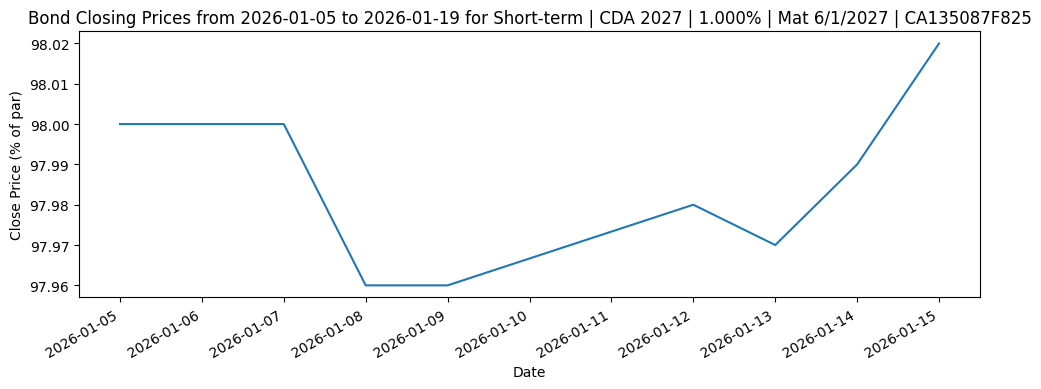

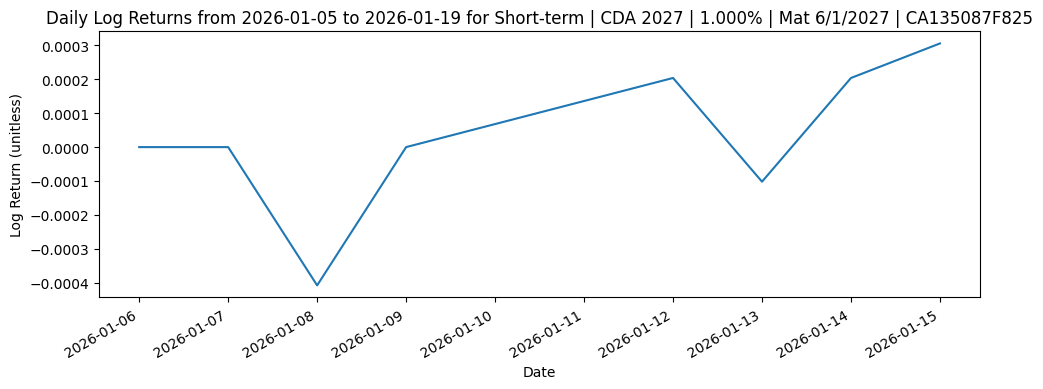


BOND: Short-term | CDA 2028 | 2.000% | Mat 6/1/2028 | CA135087H235


Term                                      bond_page_url  \
172  Short-term  https://markets.businessinsider.com/bonds/cana...   
173  Short-term  https://markets.businessinsider.com/bonds/cana...   
174  Short-term  https://markets.businessinsider.com/bonds/cana...   
175  Short-term  https://markets.businessinsider.com/bonds/cana...   
176  Short-term  https://markets.businessinsider.com/bonds/cana...   
177  Short-term  https://markets.businessinsider.com/bonds/cana...   
178  Short-term  https://markets.businessinsider.com/bonds/cana...   
179  Short-term  https://markets.businessinsider.com/bonds/cana...   
180  Short-term  https://markets.businessinsider.com/bonds/cana...   

                  tkData                                     chart_json_url  \
172  1,37720230,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
173  1,37720230,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
174  1,37720230,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
175  1,37720230,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
176  1,37720230,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
177  1,37720230,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
178  1,37720230,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
179  1,37720230,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
180  1,37720230,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

             ISIN      Name Country                    Issuer    Issue Volume  \
172  CA135087H235  CDA 2028  Canada  Canada, Government of...  13,500,000,000   
173  CA135087H235  CDA 2028  Canada  Canada, Government of...  13,500,000,000   
174  CA135087H235  CDA 2028  Canada  Canada, Government of...  13,500,000,000   
175  CA135087H235  CDA 2028  Canada  Canada, Government of...  13,500,000,000   
176  CA135087H235  CDA 2028  Canada  Canada, Government of...  13,500,000,000   
177  CA135087H235  CDA 2028  Canada  Canada, Government of...  13,500,000,000   
178  CA135087H235  CDA 2028  Canada  Canada, Government of...  13,500,000,000   
179  CA135087H235  CDA 2028  Canada  Canada, Government of...  13,500,000,000   
180  CA135087H235  CDA 2028  Canada  Canada, Government of...  13,500,000,000   

    Currency  ... Special Coupon Type Maturity Date Coupon Payment Date  \
172      CAD  ...                          6/1/2028            6/1/2026   
173      CAD  ...                          6/1/2028            6/1/2026   
174      CAD  ...                          6/1/2028            6/1/2026   
175      CAD  ...                          6/1/2028            6/1/2026   
176      CAD  ...                          6/1/2028            6/1/2026   
177      CAD  ...                          6/1/2028            6/1/2026   
178      CAD  ...                          6/1/2028            6/1/2026   
179      CAD  ...                          6/1/2028            6/1/2026   
180      CAD  ...                          6/1/2028            6/1/2026   

    Payment Frequency No. of Payments per Year Coupon Start Date  \
172                                        2.0         12/1/2017   
173                                        2.0         12/1/2017   
174                                        2.0         12/1/2017   
175                                        2.0         12/1/2017   
176                                        2.0         12/1/2017   
177                                        2.0         12/1/2017   
178                                        2.0         12/1/2017   
179                                        2.0         12/1/2017   
180                                        2.0         12/1/2017   

    Final Coupon Date Floater?        date Close Price (% of par)  
172         5/31/2028       No  2026-01-05                 98.550  
173         5/31/2028       No  2026-01-06                 98.530  
174         5/31/2028       No  2026-01-07                 98.590  
175 

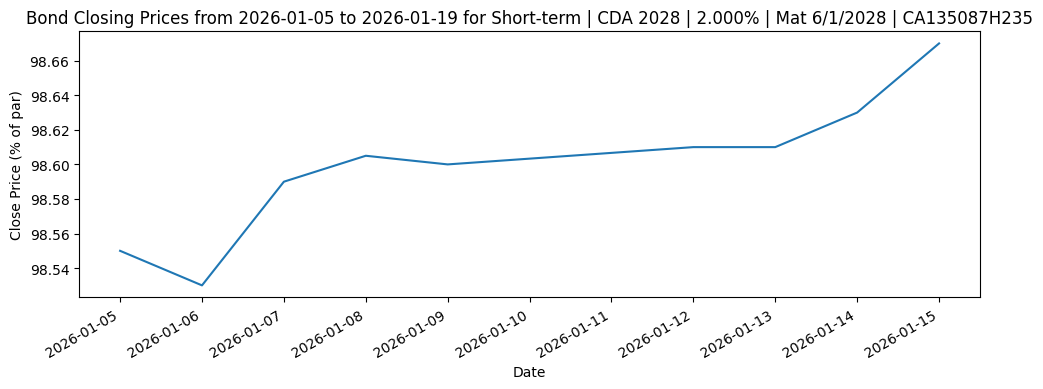

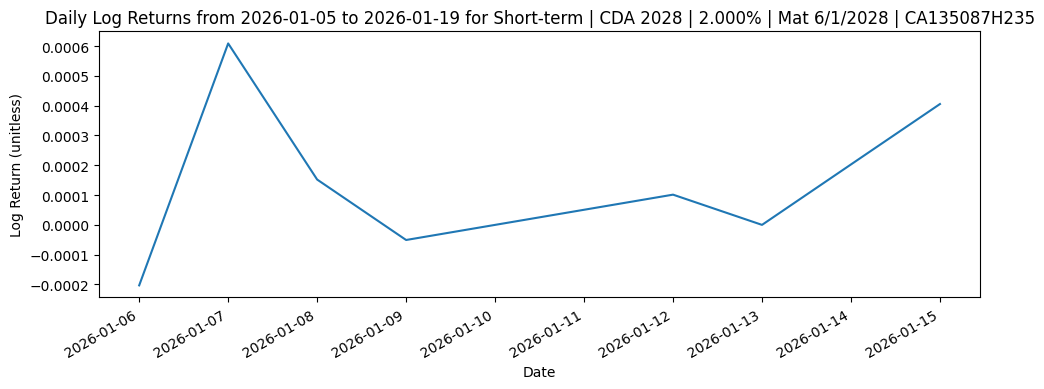


BOND: Long-term | CDA 18/29 | 2.250% | Mat 6/1/2029 | CA135087J397


Term                                      bond_page_url  \
371  Long-term  https://markets.businessinsider.com/bonds/cana...   
372  Long-term  https://markets.businessinsider.com/bonds/cana...   
373  Long-term  https://markets.businessinsider.com/bonds/cana...   
374  Long-term  https://markets.businessinsider.com/bonds/cana...   
375  Long-term  https://markets.businessinsider.com/bonds/cana...   
376  Long-term  https://markets.businessinsider.com/bonds/cana...   
377  Long-term  https://markets.businessinsider.com/bonds/cana...   
378  Long-term  https://markets.businessinsider.com/bonds/cana...   
379  Long-term  https://markets.businessinsider.com/bonds/cana...   

                  tkData                                     chart_json_url  \
371  1,42965744,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
372  1,42965744,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
373  1,42965744,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
374  1,42965744,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
375  1,42965744,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
376  1,42965744,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
377  1,42965744,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
378  1,42965744,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
379  1,42965744,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

             ISIN       Name Country                    Issuer  \
371  CA135087J397  CDA 18/29  Canada  Canada, Government of...   
372  CA135087J397  CDA 18/29  Canada  Canada, Government of...   
373  CA135087J397  CDA 18/29  Canada  Canada, Government of...   
374  CA135087J397  CDA 18/29  Canada  Canada, Government of...   
375  CA135087J397  CDA 18/29  Canada  Canada, Government of...   
376  CA135087J397  CDA 18/29  Canada  Canada, Government of...   
377  CA135087J397  CDA 18/29  Canada  Canada, Government of...   
378  CA135087J397  CDA 18/29  Canada  Canada, Government of...   
379  CA135087J397  CDA 18/29  Canada  Canada, Government of...   

       Issue Volume Currency  ... Special Coupon Type Maturity Date  \
371  12,300,000,000      CAD  ...                          6/1/2029   
372  12,300,000,000      CAD  ...                          6/1/2029   
373  12,300,000,000      CAD  ...                          6/1/2029   
374  12,300,000,000      CAD  ...                          6/1/2029   
375  12,300,000,000      CAD  ...                          6/1/2029   
376  12,300,000,000      CAD  ...                          6/1/2029   
377  12,300,000,000      CAD  ...                          6/1/2029   
378  12,300,000,000      CAD  ...                          6/1/2029   
379  12,300,000,000      CAD  ...                          6/1/2029   

    Coupon Payment Date Payment Frequency No. of Payments per Year  \
371            6/1/2026                                        2.0   
372            6/1/2026                                        2.0   
373            6/1/2026                                        2.0   
374            6/1/2026                                        2.0   
375            6/1/2026                                        2.0   
376            6/1/2026                                        2.0   
377            6/1/2026                                        2.0   
378            6/1/2026                                        2.0   
379            6/1/2026                                        2.0   

    Coupon Start Date Final Coupon Date Floater?        date  \
371         12/1/2018         5/31/2029       No  2026-01-05   
372         12/1/2018         5/31/2029       No  2026-01-06   
373         12/1/2018         5/31/2029       No  2026-01-07   
374         12/1/2018         5/31/2029       No  2026-01-08   
375         12/1/2018         5/31/2029       No  2026-01-09   
376         12/1/2018         5/31/2029       No  2026-01-12   
377    

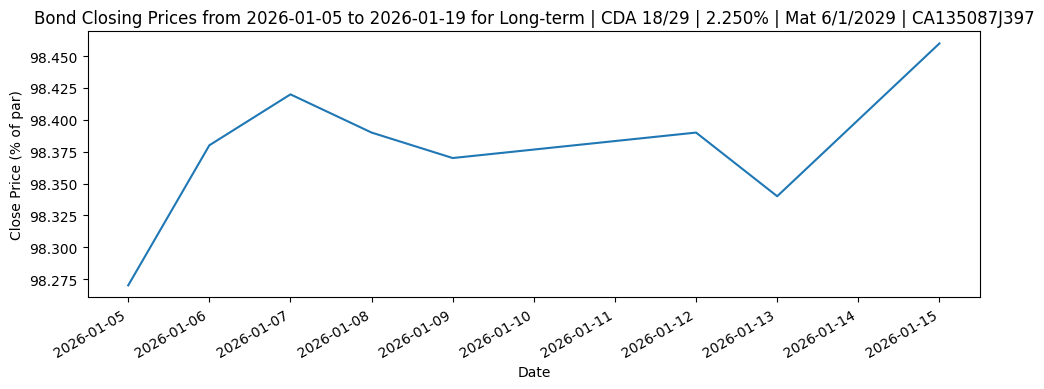

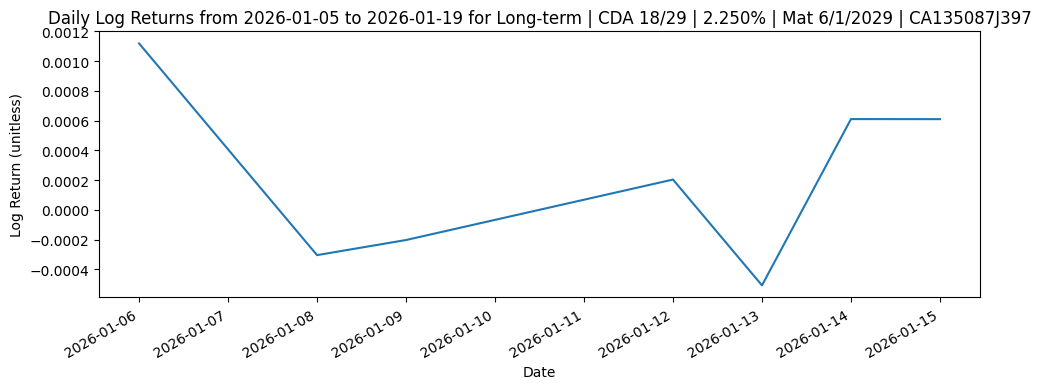


BOND: Long-term | CANADA 20/30 | 0.500% | Mat 12/1/2030 | CA135087L443


Term                                      bond_page_url  \
199  Long-term  https://markets.businessinsider.com/bonds/cana...   
200  Long-term  https://markets.businessinsider.com/bonds/cana...   
201  Long-term  https://markets.businessinsider.com/bonds/cana...   
202  Long-term  https://markets.businessinsider.com/bonds/cana...   
203  Long-term  https://markets.businessinsider.com/bonds/cana...   
204  Long-term  https://markets.businessinsider.com/bonds/cana...   
205  Long-term  https://markets.businessinsider.com/bonds/cana...   
206  Long-term  https://markets.businessinsider.com/bonds/cana...   
207  Long-term  https://markets.businessinsider.com/bonds/cana...   

                  tkData                                     chart_json_url  \
199  1,57501684,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
200  1,57501684,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
201  1,57501684,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
202  1,57501684,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
203  1,57501684,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
204  1,57501684,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
205  1,57501684,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
206  1,57501684,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
207  1,57501684,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

             ISIN          Name Country                    Issuer  \
199  CA135087L443  CANADA 20/30  Canada  Canada, Government of...   
200  CA135087L443  CANADA 20/30  Canada  Canada, Government of...   
201  CA135087L443  CANADA 20/30  Canada  Canada, Government of...   
202  CA135087L443  CANADA 20/30  Canada  Canada, Government of...   
203  CA135087L443  CANADA 20/30  Canada  Canada, Government of...   
204  CA135087L443  CANADA 20/30  Canada  Canada, Government of...   
205  CA135087L443  CANADA 20/30  Canada  Canada, Government of...   
206  CA135087L443  CANADA 20/30  Canada  Canada, Government of...   
207  CA135087L443  CANADA 20/30  Canada  Canada, Government of...   

       Issue Volume Currency  ... Special Coupon Type Maturity Date  \
199  40,000,000,000      CAD  ...                         12/1/2030   
200  40,000,000,000      CAD  ...                         12/1/2030   
201  40,000,000,000      CAD  ...                         12/1/2030   
202  40,000,000,000      CAD  ...                         12/1/2030   
203  40,000,000,000      CAD  ...                         12/1/2030   
204  40,000,000,000      CAD  ...                         12/1/2030   
205  40,000,000,000      CAD  ...                         12/1/2030   
206  40,000,000,000      CAD  ...                         12/1/2030   
207  40,000,000,000      CAD  ...                         12/1/2030   

    Coupon Payment Date Payment Frequency No. of Payments per Year  \
199            6/1/2026                                        2.0   
200            6/1/2026                                        2.0   
201            6/1/2026                                        2.0   
202            6/1/2026                                        2.0   
203            6/1/2026                                        2.0   
204            6/1/2026                                        2.0   
205            6/1/2026                                        2.0   
206            6/1/2026                                        2.0   
207            6/1/2026                                        2.0   

    Coupon Start Date Final Coupon Date Floater?        date  \
199         12/1/2020        11/30/2030       No  2026-01-05   
200         12/1/2020        11/30/2030       No  2026-01-06   
201         12/1/2020        11/30/2030       No  2026-01-07   
202         12/1/2020        11/30/2030       No  2026-01-08   
203         12/1/2020        11/30/2030       No  2026-01-09   
204         12/1/2020        11/30/2030  

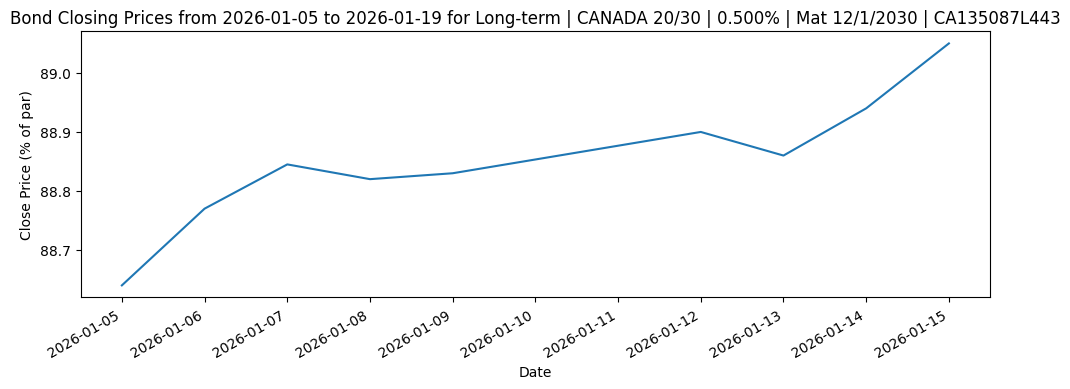

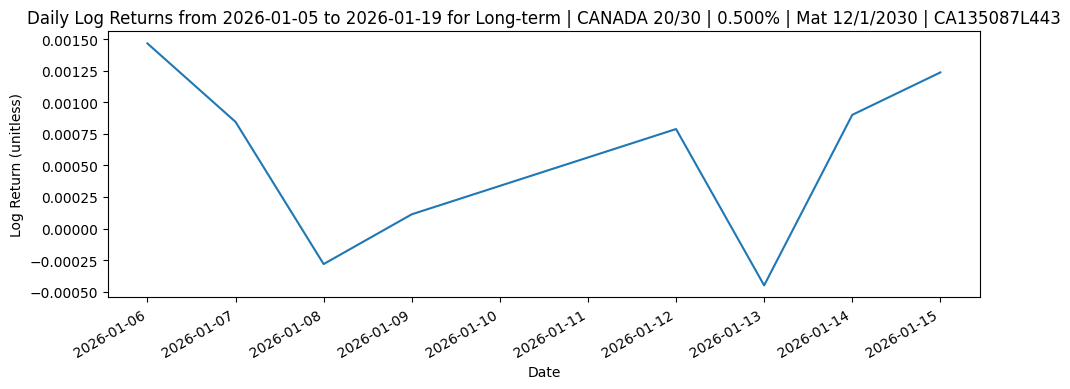


BOND: Short-term | CANADA 20/26 | 0.250% | Mat 3/1/2026 | CA135087L518


Term                                      bond_page_url  \
9   Short-term  https://markets.businessinsider.com/bonds/cana...   
10  Short-term  https://markets.businessinsider.com/bonds/cana...   
11  Short-term  https://markets.businessinsider.com/bonds/cana...   
12  Short-term  https://markets.businessinsider.com/bonds/cana...   
13  Short-term  https://markets.businessinsider.com/bonds/cana...   
14  Short-term  https://markets.businessinsider.com/bonds/cana...   
15  Short-term  https://markets.businessinsider.com/bonds/cana...   
16  Short-term  https://markets.businessinsider.com/bonds/cana...   
17  Short-term  https://markets.businessinsider.com/bonds/cana...   

                 tkData                                     chart_json_url  \
9   1,57601476,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
10  1,57601476,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
11  1,57601476,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
12  1,57601476,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
13  1,57601476,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
14  1,57601476,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
15  1,57601476,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
16  1,57601476,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
17  1,57601476,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

            ISIN          Name Country                    Issuer  \
9   CA135087L518  CANADA 20/26  Canada  Canada, Government of...   
10  CA135087L518  CANADA 20/26  Canada  Canada, Government of...   
11  CA135087L518  CANADA 20/26  Canada  Canada, Government of...   
12  CA135087L518  CANADA 20/26  Canada  Canada, Government of...   
13  CA135087L518  CANADA 20/26  Canada  Canada, Government of...   
14  CA135087L518  CANADA 20/26  Canada  Canada, Government of...   
15  CA135087L518  CANADA 20/26  Canada  Canada, Government of...   
16  CA135087L518  CANADA 20/26  Canada  Canada, Government of...   
17  CA135087L518  CANADA 20/26  Canada  Canada, Government of...   

      Issue Volume Currency  ... Special Coupon Type Maturity Date  \
9   34,000,000,000      CAD  ...                          3/1/2026   
10  34,000,000,000      CAD  ...                          3/1/2026   
11  34,000,000,000      CAD  ...                          3/1/2026   
12  34,000,000,000      CAD  ...                          3/1/2026   
13  34,000,000,000      CAD  ...                          3/1/2026   
14  34,000,000,000      CAD  ...                          3/1/2026   
15  34,000,000,000      CAD  ...                          3/1/2026   
16  34,000,000,000      CAD  ...                          3/1/2026   
17  34,000,000,000      CAD  ...                          3/1/2026   

   Coupon Payment Date Payment Frequency No. of Payments per Year  \
9             3/1/2026                                        2.0   
10            3/1/2026                                        2.0   
11            3/1/2026                                        2.0   
12            3/1/2026                                        2.0   
13            3/1/2026                                        2.0   
14            3/1/2026                                        2.0   
15            3/1/2026                                        2.0   
16            3/1/2026                                        2.0   
17            3/1/2026                                        2.0   

   Coupon Start Date Final Coupon Date Floater?        date  \
9           3/1/2021         2/28/2026       No  2026-01-05   
10          3/1/2021         2/28/2026       No  2026-01-06   
11          3/1/2021         2/28/2026       No  2026-01-07   
12          3/1/2021         2/28/2026       No  2026-01-08   
13          3/1/2021         2/28/2026       No  2026-01-09   
14          3/1/2021         2/28/2026       No  2026-01-12   
15          3/1/2021    

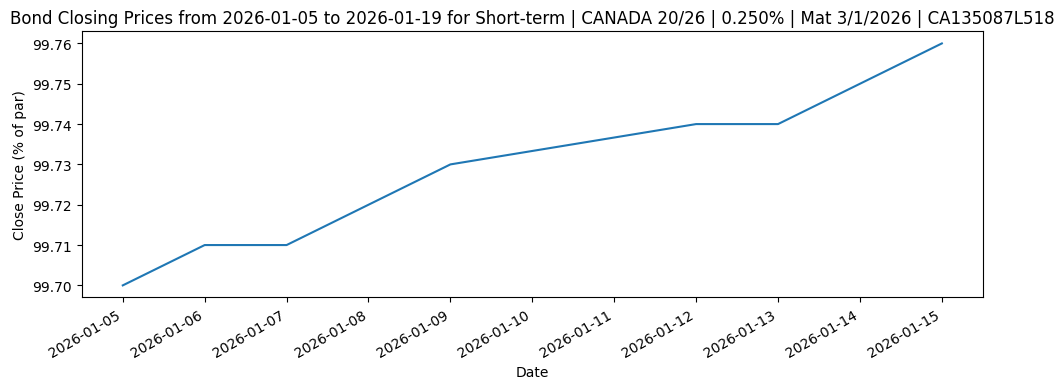

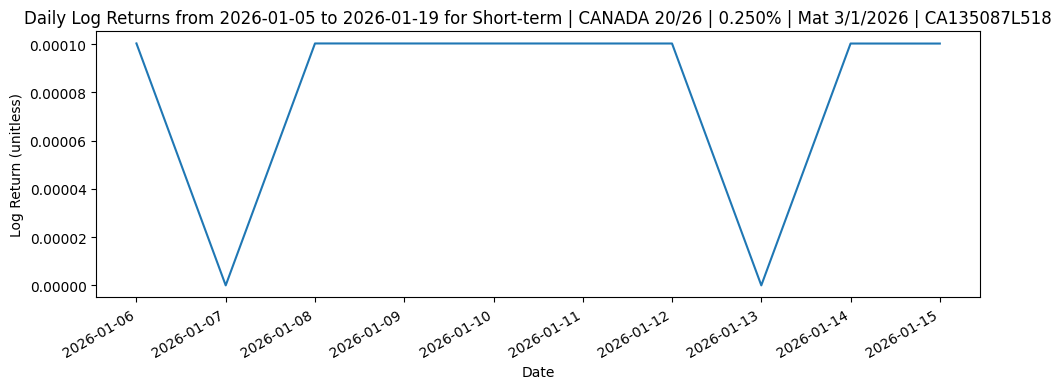


BOND: Short-term | CANADA 21/26 | 1.000% | Mat 9/1/2026 | CA135087L930


Term                                      bond_page_url  \
54  Short-term  https://markets.businessinsider.com/bonds/cana...   
55  Short-term  https://markets.businessinsider.com/bonds/cana...   
56  Short-term  https://markets.businessinsider.com/bonds/cana...   
57  Short-term  https://markets.businessinsider.com/bonds/cana...   
58  Short-term  https://markets.businessinsider.com/bonds/cana...   
59  Short-term  https://markets.businessinsider.com/bonds/cana...   
60  Short-term  https://markets.businessinsider.com/bonds/cana...   
61  Short-term  https://markets.businessinsider.com/bonds/cana...   
62  Short-term  https://markets.businessinsider.com/bonds/cana...   

                  tkData                                     chart_json_url  \
54  1,111141014,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
55  1,111141014,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
56  1,111141014,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
57  1,111141014,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
58  1,111141014,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
59  1,111141014,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
60  1,111141014,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
61  1,111141014,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
62  1,111141014,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

            ISIN          Name Country                    Issuer  \
54  CA135087L930  CANADA 21/26  Canada  Canada, Government of...   
55  CA135087L930  CANADA 21/26  Canada  Canada, Government of...   
56  CA135087L930  CANADA 21/26  Canada  Canada, Government of...   
57  CA135087L930  CANADA 21/26  Canada  Canada, Government of...   
58  CA135087L930  CANADA 21/26  Canada  Canada, Government of...   
59  CA135087L930  CANADA 21/26  Canada  Canada, Government of...   
60  CA135087L930  CANADA 21/26  Canada  Canada, Government of...   
61  CA135087L930  CANADA 21/26  Canada  Canada, Government of...   
62  CA135087L930  CANADA 21/26  Canada  Canada, Government of...   

      Issue Volume Currency  ... Special Coupon Type Maturity Date  \
54  23,000,000,000      CAD  ...                          9/1/2026   
55  23,000,000,000      CAD  ...                          9/1/2026   
56  23,000,000,000      CAD  ...                          9/1/2026   
57  23,000,000,000      CAD  ...                          9/1/2026   
58  23,000,000,000      CAD  ...                          9/1/2026   
59  23,000,000,000      CAD  ...                          9/1/2026   
60  23,000,000,000      CAD  ...                          9/1/2026   
61  23,000,000,000      CAD  ...                          9/1/2026   
62  23,000,000,000      CAD  ...                          9/1/2026   

   Coupon Payment Date Payment Frequency No. of Payments per Year  \
54            3/1/2026                                        2.0   
55            3/1/2026                                        2.0   
56            3/1/2026                                        2.0   
57            3/1/2026                                        2.0   
58            3/1/2026                                        2.0   
59            3/1/2026                                        2.0   
60            3/1/2026                                        2.0   
61            3/1/2026                                        2.0   
62            3/1/2026                                        2.0   

   Coupon Start Date Final Coupon Date Floater?        date  \
54          9/1/2021         8/31/2026       No  2026-01-05   
55          9/1/2021         8/31/2026       No  2026-01-06   
56          9/1/2021         8/31/2026       No  2026-01-07   
57          9/1/2021         8/31/2026       No  2026-01-08   
58          9/1/2021         8/31/2026       No  2026-01-09   
59          9/1/2021         8/31/2026       No  2026-01-12   
60          9/

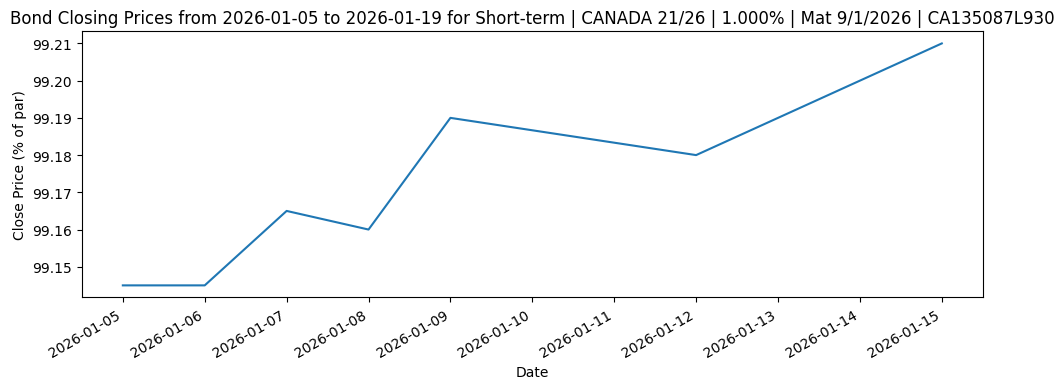

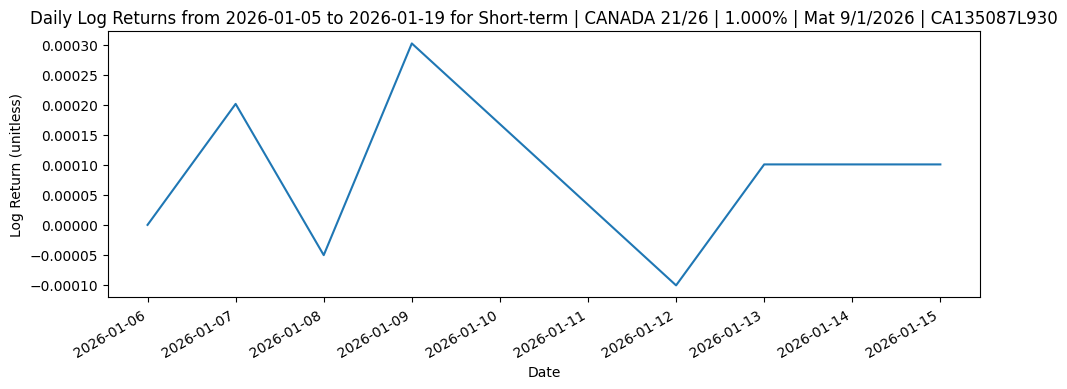


BOND: Long-term | CANADA 21/31 | 1.500% | Mat 6/1/2031 | CA135087M276


Term                                      bond_page_url  \
262  Long-term  https://markets.businessinsider.com/bonds/cana...   
263  Long-term  https://markets.businessinsider.com/bonds/cana...   
264  Long-term  https://markets.businessinsider.com/bonds/cana...   
265  Long-term  https://markets.businessinsider.com/bonds/cana...   
266  Long-term  https://markets.businessinsider.com/bonds/cana...   
267  Long-term  https://markets.businessinsider.com/bonds/cana...   
268  Long-term  https://markets.businessinsider.com/bonds/cana...   
269  Long-term  https://markets.businessinsider.com/bonds/cana...   
270  Long-term  https://markets.businessinsider.com/bonds/cana...   
271  Long-term  https://markets.businessinsider.com/bonds/cana...   

                   tkData                                     chart_json_url  \
262  1,111293704,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
263  1,111293704,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
264  1,111293704,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
265  1,111293704,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
266  1,111293704,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
267  1,111293704,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
268  1,111293704,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
269  1,111293704,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
270  1,111293704,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
271  1,111293704,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

             ISIN          Name Country                    Issuer  \
262  CA135087M276  CANADA 21/31  Canada  Canada, Government of...   
263  CA135087M276  CANADA 21/31  Canada  Canada, Government of...   
264  CA135087M276  CANADA 21/31  Canada  Canada, Government of...   
265  CA135087M276  CANADA 21/31  Canada  Canada, Government of...   
266  CA135087M276  CANADA 21/31  Canada  Canada, Government of...   
267  CA135087M276  CANADA 21/31  Canada  Canada, Government of...   
268  CA135087M276  CANADA 21/31  Canada  Canada, Government of...   
269  CA135087M276  CANADA 21/31  Canada  Canada, Government of...   
270  CA135087M276  CANADA 21/31  Canada  Canada, Government of...   
271  CA135087M276  CANADA 21/31  Canada  Canada, Government of...   

       Issue Volume Currency  ... Special Coupon Type Maturity Date  \
262  42,000,000,000      CAD  ...                          6/1/2031   
263  42,000,000,000      CAD  ...                          6/1/2031   
264  42,000,000,000      CAD  ...                          6/1/2031   
265  42,000,000,000      CAD  ...                          6/1/2031   
266  42,000,000,000      CAD  ...                          6/1/2031   
267  42,000,000,000      CAD  ...                          6/1/2031   
268  42,000,000,000      CAD  ...                          6/1/2031   
269  42,000,000,000      CAD  ...                          6/1/2031   
270  42,000,000,000      CAD  ...                          6/1/2031   
271  42,000,000,000      CAD  ...                          6/1/2031   

    Coupon Payment Date Payment Frequency No. of Payments per Year  \
262            6/1/2026                                        2.0   
263            6/1/2026                                        2.0   
264            6/1/2026                                        2.0   
265            6/1/2026                                        2.0   
266            6/1/2026                                        2.0   
267            6/1/2026                                        2.0   
268            6/1/2026                                        2.0   
269            6/1/2026                                        2.0   
270            6/1/2026                                        2.0   
271            6/1/2026                                        2.0   

    Coupon Start Date Final Coupon Date Floater?        

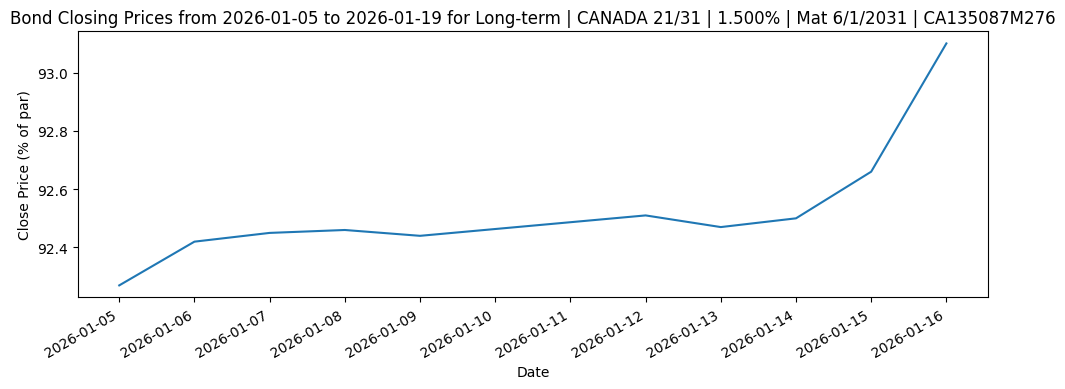

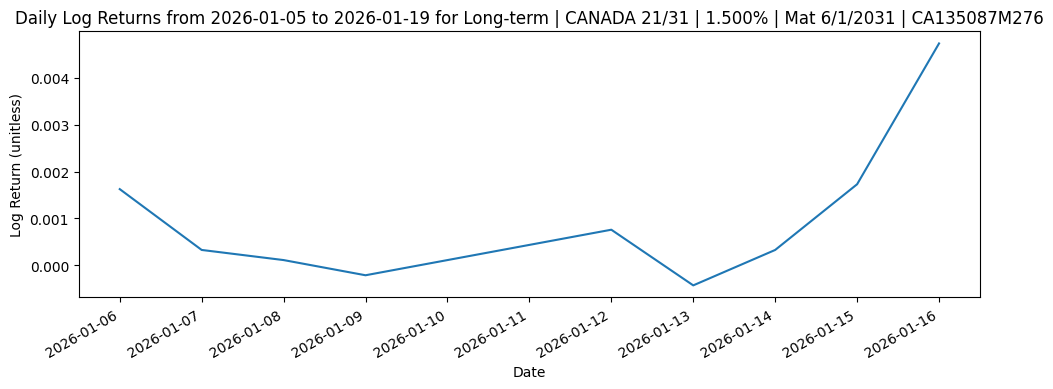


BOND: Short-term | CANADA 21/27 | 1.250% | Mat 3/1/2027 | CA135087M847


Term                                      bond_page_url  \
81  Short-term  https://markets.businessinsider.com/bonds/cana...   
82  Short-term  https://markets.businessinsider.com/bonds/cana...   
83  Short-term  https://markets.businessinsider.com/bonds/cana...   
84  Short-term  https://markets.businessinsider.com/bonds/cana...   
85  Short-term  https://markets.businessinsider.com/bonds/cana...   
86  Short-term  https://markets.businessinsider.com/bonds/cana...   
87  Short-term  https://markets.businessinsider.com/bonds/cana...   
88  Short-term  https://markets.businessinsider.com/bonds/cana...   
89  Short-term  https://markets.businessinsider.com/bonds/cana...   

                  tkData                                     chart_json_url  \
81  1,114329463,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
82  1,114329463,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
83  1,114329463,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
84  1,114329463,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
85  1,114329463,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
86  1,114329463,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
87  1,114329463,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
88  1,114329463,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
89  1,114329463,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

            ISIN          Name Country                    Issuer  \
81  CA135087M847  CANADA 21/27  Canada  Canada, Government of...   
82  CA135087M847  CANADA 21/27  Canada  Canada, Government of...   
83  CA135087M847  CANADA 21/27  Canada  Canada, Government of...   
84  CA135087M847  CANADA 21/27  Canada  Canada, Government of...   
85  CA135087M847  CANADA 21/27  Canada  Canada, Government of...   
86  CA135087M847  CANADA 21/27  Canada  Canada, Government of...   
87  CA135087M847  CANADA 21/27  Canada  Canada, Government of...   
88  CA135087M847  CANADA 21/27  Canada  Canada, Government of...   
89  CA135087M847  CANADA 21/27  Canada  Canada, Government of...   

      Issue Volume Currency  ... Special Coupon Type Maturity Date  \
81  13,000,000,000      CAD  ...                          3/1/2027   
82  13,000,000,000      CAD  ...                          3/1/2027   
83  13,000,000,000      CAD  ...                          3/1/2027   
84  13,000,000,000      CAD  ...                          3/1/2027   
85  13,000,000,000      CAD  ...                          3/1/2027   
86  13,000,000,000      CAD  ...                          3/1/2027   
87  13,000,000,000      CAD  ...                          3/1/2027   
88  13,000,000,000      CAD  ...                          3/1/2027   
89  13,000,000,000      CAD  ...                          3/1/2027   

   Coupon Payment Date Payment Frequency No. of Payments per Year  \
81            3/1/2026                                        2.0   
82            3/1/2026                                        2.0   
83            3/1/2026                                        2.0   
84            3/1/2026                                        2.0   
85            3/1/2026                                        2.0   
86            3/1/2026                                        2.0   
87            3/1/2026                                        2.0   
88            3/1/2026                                        2.0   
89            3/1/2026                                        2.0   

   Coupon Start Date Final Coupon Date Floater?        date  \
81          3/1/2022         2/28/2027       No  2026-01-05   
82          3/1/2022         2/28/2027       No  2026-01-06   
83          3/1/2022         2/28/2027       No  2026-01-07   
84          3/1/2022         2/28/2027       No  2026-01-08   
85          3/1/2022         2/28/2027       No  2026-01-09   
86          3/1/2022         2/28/2027       No  2026-01-12   
87          3/

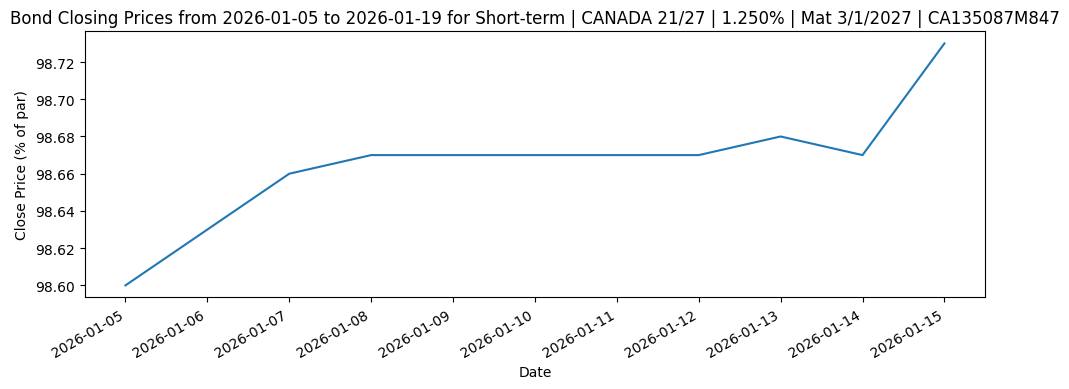

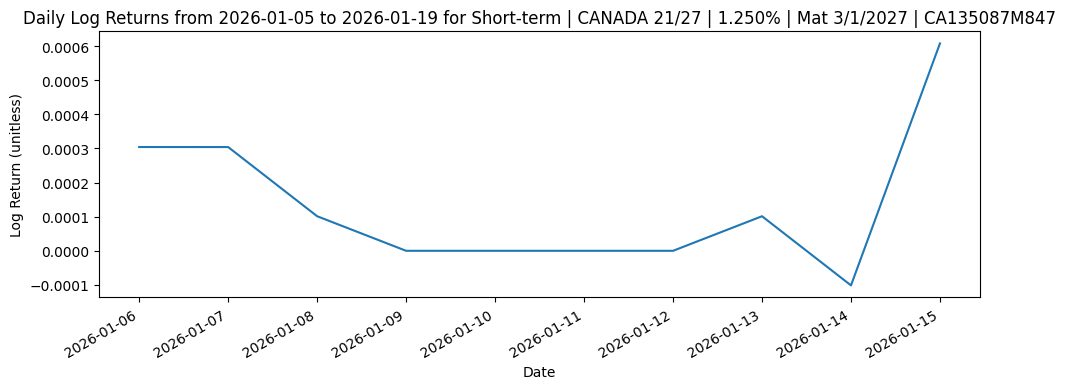


BOND: Long-term | CANADA 21/31 | 1.500% | Mat 12/1/2031 | CA135087N266


Term                                      bond_page_url  \
272  Long-term  https://markets.businessinsider.com/bonds/cana...   
273  Long-term  https://markets.businessinsider.com/bonds/cana...   
274  Long-term  https://markets.businessinsider.com/bonds/cana...   
275  Long-term  https://markets.businessinsider.com/bonds/cana...   
276  Long-term  https://markets.businessinsider.com/bonds/cana...   
277  Long-term  https://markets.businessinsider.com/bonds/cana...   
278  Long-term  https://markets.businessinsider.com/bonds/cana...   
279  Long-term  https://markets.businessinsider.com/bonds/cana...   
280  Long-term  https://markets.businessinsider.com/bonds/cana...   

                   tkData                                     chart_json_url  \
272  1,114466942,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
273  1,114466942,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
274  1,114466942,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
275  1,114466942,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
276  1,114466942,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
277  1,114466942,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
278  1,114466942,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
279  1,114466942,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
280  1,114466942,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

             ISIN          Name Country                    Issuer  \
272  CA135087N266  CANADA 21/31  Canada  Canada, Government of...   
273  CA135087N266  CANADA 21/31  Canada  Canada, Government of...   
274  CA135087N266  CANADA 21/31  Canada  Canada, Government of...   
275  CA135087N266  CANADA 21/31  Canada  Canada, Government of...   
276  CA135087N266  CANADA 21/31  Canada  Canada, Government of...   
277  CA135087N266  CANADA 21/31  Canada  Canada, Government of...   
278  CA135087N266  CANADA 21/31  Canada  Canada, Government of...   
279  CA135087N266  CANADA 21/31  Canada  Canada, Government of...   
280  CA135087N266  CANADA 21/31  Canada  Canada, Government of...   

       Issue Volume Currency  ... Special Coupon Type Maturity Date  \
272  32,000,000,000      CAD  ...                         12/1/2031   
273  32,000,000,000      CAD  ...                         12/1/2031   
274  32,000,000,000      CAD  ...                         12/1/2031   
275  32,000,000,000      CAD  ...                         12/1/2031   
276  32,000,000,000      CAD  ...                         12/1/2031   
277  32,000,000,000      CAD  ...                         12/1/2031   
278  32,000,000,000      CAD  ...                         12/1/2031   
279  32,000,000,000      CAD  ...                         12/1/2031   
280  32,000,000,000      CAD  ...                         12/1/2031   

    Coupon Payment Date Payment Frequency No. of Payments per Year  \
272            6/1/2026                                        2.0   
273            6/1/2026                                        2.0   
274            6/1/2026                                        2.0   
275            6/1/2026                                        2.0   
276            6/1/2026                                        2.0   
277            6/1/2026                                        2.0   
278            6/1/2026                                        2.0   
279            6/1/2026                                        2.0   
280            6/1/2026                                        2.0   

    Coupon Start Date Final Coupon Date Floater?        date  \
272         12/1/2021        11/30/2031       No  2026-01-05   
273         12/1/2021        11/30/2031       No  2026-01-06   
274         12/1/2021        11/30/2031       No  2026-01-07   
275         12/1/2021        11/30/2031       No  2026-01-08   
276         12/1/2021        11/30/2031       No  2026-01-09   
277         12/1/2021        11

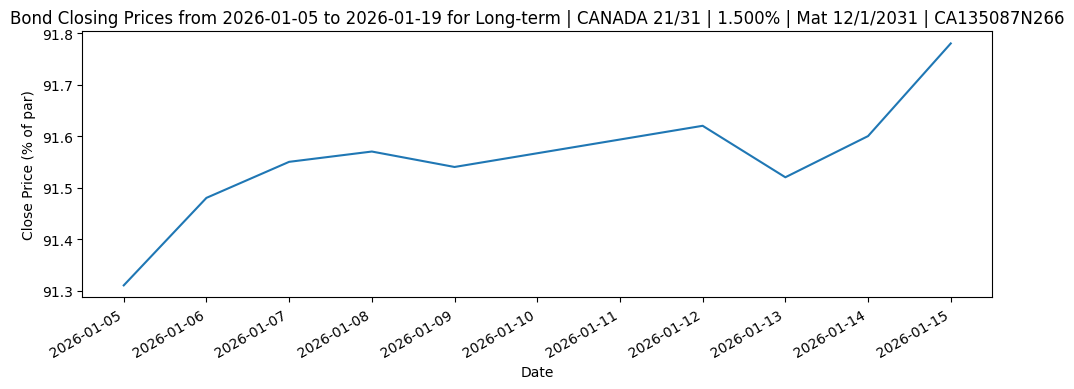

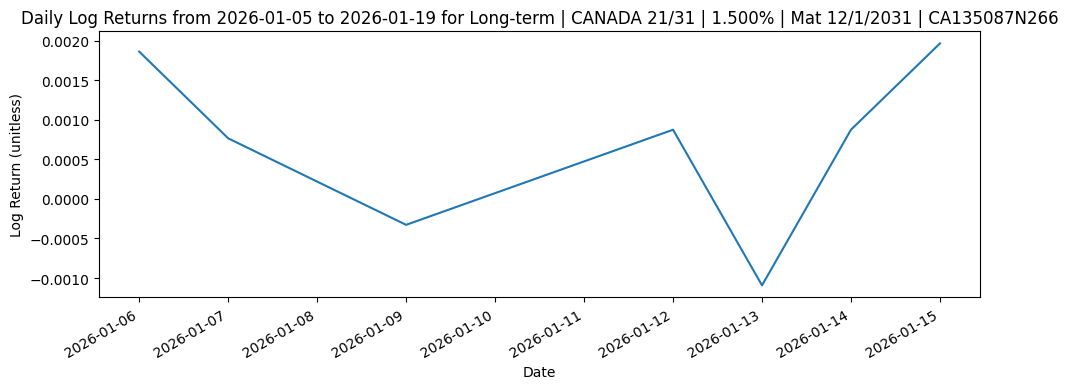


BOND: Long-term | CANADA 22/32 | 2.000% | Mat 6/1/2032 | CA135087N597


Term                                      bond_page_url  \
344  Long-term  https://markets.businessinsider.com/bonds/cana...   
345  Long-term  https://markets.businessinsider.com/bonds/cana...   
346  Long-term  https://markets.businessinsider.com/bonds/cana...   
347  Long-term  https://markets.businessinsider.com/bonds/cana...   
348  Long-term  https://markets.businessinsider.com/bonds/cana...   
349  Long-term  https://markets.businessinsider.com/bonds/cana...   
350  Long-term  https://markets.businessinsider.com/bonds/cana...   
351  Long-term  https://markets.businessinsider.com/bonds/cana...   
352  Long-term  https://markets.businessinsider.com/bonds/cana...   

                   tkData                                     chart_json_url  \
344  1,117606959,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
345  1,117606959,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
346  1,117606959,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
347  1,117606959,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
348  1,117606959,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
349  1,117606959,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
350  1,117606959,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
351  1,117606959,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
352  1,117606959,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

             ISIN          Name Country                    Issuer  \
344  CA135087N597  CANADA 22/32  Canada  Canada, Government of...   
345  CA135087N597  CANADA 22/32  Canada  Canada, Government of...   
346  CA135087N597  CANADA 22/32  Canada  Canada, Government of...   
347  CA135087N597  CANADA 22/32  Canada  Canada, Government of...   
348  CA135087N597  CANADA 22/32  Canada  Canada, Government of...   
349  CA135087N597  CANADA 22/32  Canada  Canada, Government of...   
350  CA135087N597  CANADA 22/32  Canada  Canada, Government of...   
351  CA135087N597  CANADA 22/32  Canada  Canada, Government of...   
352  CA135087N597  CANADA 22/32  Canada  Canada, Government of...   

       Issue Volume Currency  ... Special Coupon Type Maturity Date  \
344  24,000,000,000      CAD  ...                          6/1/2032   
345  24,000,000,000      CAD  ...                          6/1/2032   
346  24,000,000,000      CAD  ...                          6/1/2032   
347  24,000,000,000      CAD  ...                          6/1/2032   
348  24,000,000,000      CAD  ...                          6/1/2032   
349  24,000,000,000      CAD  ...                          6/1/2032   
350  24,000,000,000      CAD  ...                          6/1/2032   
351  24,000,000,000      CAD  ...                          6/1/2032   
352  24,000,000,000      CAD  ...                          6/1/2032   

    Coupon Payment Date Payment Frequency No. of Payments per Year  \
344            6/1/2026                                        2.0   
345            6/1/2026                                        2.0   
346            6/1/2026                                        2.0   
347            6/1/2026                                        2.0   
348            6/1/2026                                        2.0   
349            6/1/2026                                        2.0   
350            6/1/2026                                        2.0   
351            6/1/2026                                        2.0   
352            6/1/2026                                        2.0   

    Coupon Start Date Final Coupon Date Floater?        date  \
344          6/1/2022         5/31/2032       No  2026-01-05   
345          6/1/2022         5/31/2032       No  2026-01-06   
346          6/1/2022         5/31/2032       No  2026-01-07   
347          6/1/2022         5/31/2032       No  2026-01-08   
348          6/1/2022         5/31/2032       No  2026-01-09   
349          6/1/2022         5

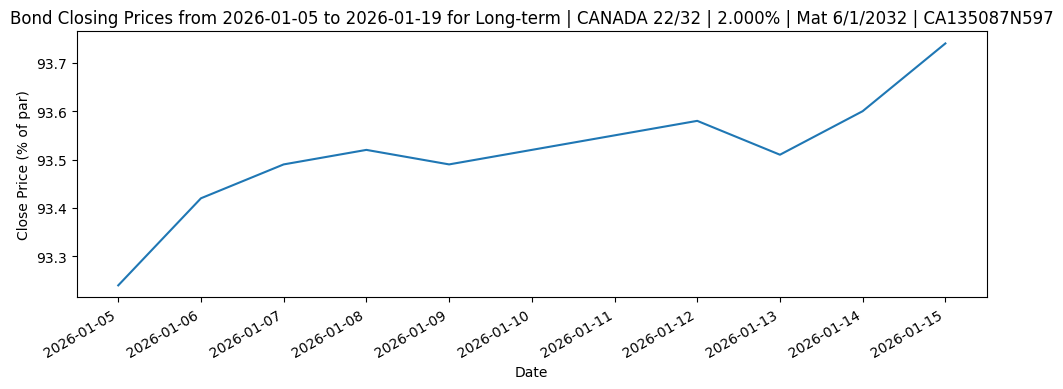

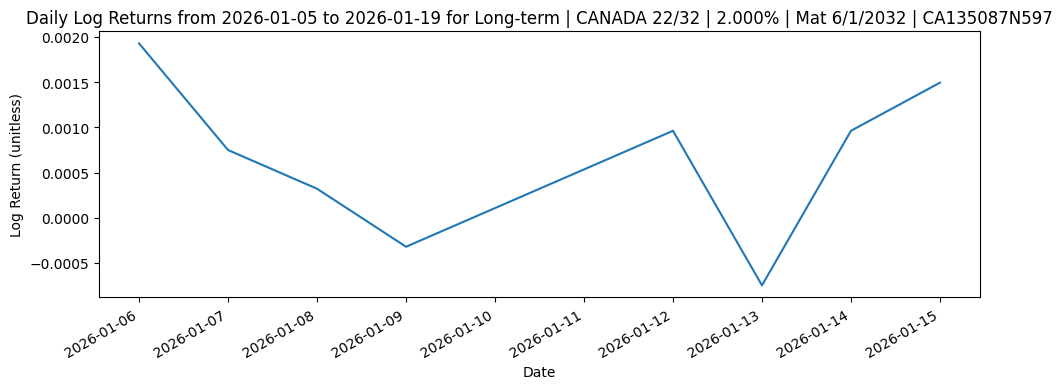


BOND: Long-term | CANADA 22/29 | 2.250% | Mat 12/1/2029 | CA135087N670


Term                                      bond_page_url  \
217  Long-term  https://markets.businessinsider.com/bonds/cana...   
218  Long-term  https://markets.businessinsider.com/bonds/cana...   
219  Long-term  https://markets.businessinsider.com/bonds/cana...   
220  Long-term  https://markets.businessinsider.com/bonds/cana...   
221  Long-term  https://markets.businessinsider.com/bonds/cana...   
222  Long-term  https://markets.businessinsider.com/bonds/cana...   
223  Long-term  https://markets.businessinsider.com/bonds/cana...   
224  Long-term  https://markets.businessinsider.com/bonds/cana...   
225  Long-term  https://markets.businessinsider.com/bonds/cana...   

                   tkData                                     chart_json_url  \
217  1,117855494,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
218  1,117855494,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
219  1,117855494,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
220  1,117855494,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
221  1,117855494,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
222  1,117855494,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
223  1,117855494,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
224  1,117855494,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
225  1,117855494,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

             ISIN          Name Country                    Issuer  \
217  CA135087N670  CANADA 22/29  Canada  Canada, Government of...   
218  CA135087N670  CANADA 22/29  Canada  Canada, Government of...   
219  CA135087N670  CANADA 22/29  Canada  Canada, Government of...   
220  CA135087N670  CANADA 22/29  Canada  Canada, Government of...   
221  CA135087N670  CANADA 22/29  Canada  Canada, Government of...   
222  CA135087N670  CANADA 22/29  Canada  Canada, Government of...   
223  CA135087N670  CANADA 22/29  Canada  Canada, Government of...   
224  CA135087N670  CANADA 22/29  Canada  Canada, Government of...   
225  CA135087N670  CANADA 22/29  Canada  Canada, Government of...   

      Issue Volume Currency  ... Special Coupon Type Maturity Date  \
217  5,000,000,000      CAD  ...                         12/1/2029   
218  5,000,000,000      CAD  ...                         12/1/2029   
219  5,000,000,000      CAD  ...                         12/1/2029   
220  5,000,000,000      CAD  ...                         12/1/2029   
221  5,000,000,000      CAD  ...                         12/1/2029   
222  5,000,000,000      CAD  ...                         12/1/2029   
223  5,000,000,000      CAD  ...                         12/1/2029   
224  5,000,000,000      CAD  ...                         12/1/2029   
225  5,000,000,000      CAD  ...                         12/1/2029   

    Coupon Payment Date Payment Frequency No. of Payments per Year  \
217            6/1/2026                                        2.0   
218            6/1/2026                                        2.0   
219            6/1/2026                                        2.0   
220            6/1/2026                                        2.0   
221            6/1/2026                                        2.0   
222            6/1/2026                                        2.0   
223            6/1/2026                                        2.0   
224            6/1/2026                                        2.0   
225            6/1/2026                                        2.0   

    Coupon Start Date Final Coupon Date Floater?        date  \
217          6/1/2022        11/30/2029       No  2026-01-05   
218          6/1/2022        11/30/2029       No  2026-01-06   
219          6/1/2022        11/30/2029       No  2026-01-07   
220          6/1/2022        11/30/2029       No  2026-01-08   
221          6/1/2022        11/30/2029       No  2026-01-09   
222          6/1/2022        11/30/2029  

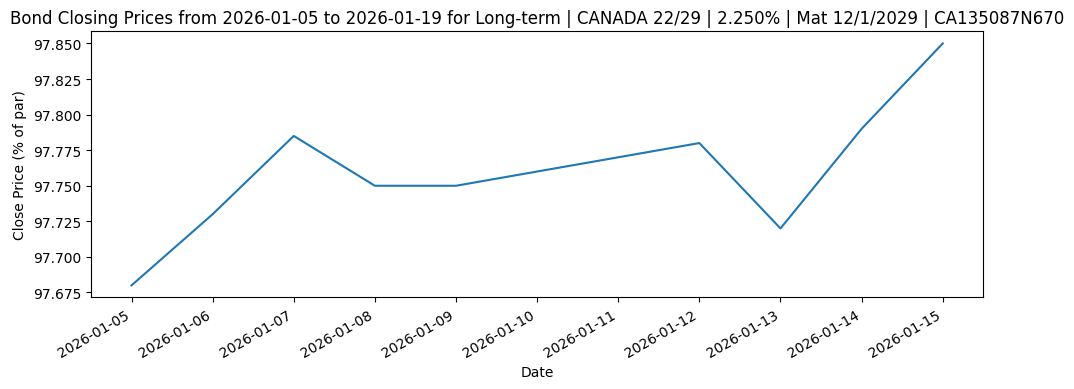

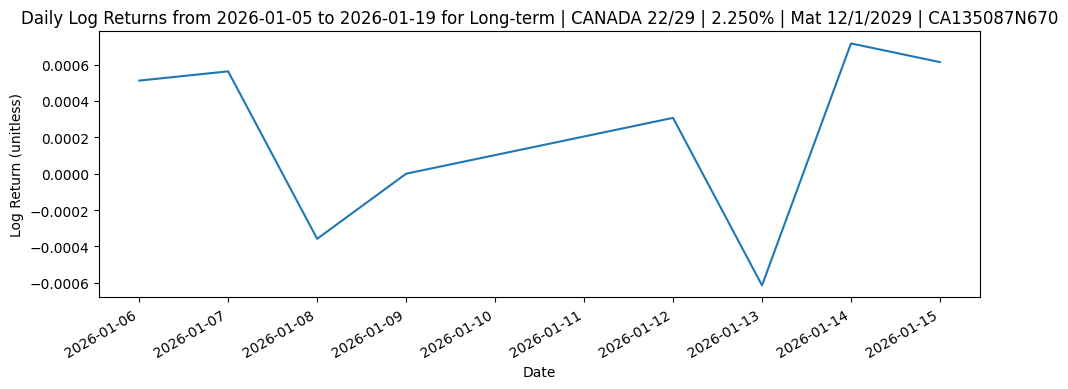


BOND: Short-term | CANADA 22/27 | 2.750% | Mat 9/1/2027 | CA135087N837


Term                                      bond_page_url  \
135  Short-term  https://markets.businessinsider.com/bonds/cana...   
136  Short-term  https://markets.businessinsider.com/bonds/cana...   
137  Short-term  https://markets.businessinsider.com/bonds/cana...   
138  Short-term  https://markets.businessinsider.com/bonds/cana...   
139  Short-term  https://markets.businessinsider.com/bonds/cana...   
140  Short-term  https://markets.businessinsider.com/bonds/cana...   
141  Short-term  https://markets.businessinsider.com/bonds/cana...   
142  Short-term  https://markets.businessinsider.com/bonds/cana...   
143  Short-term  https://markets.businessinsider.com/bonds/cana...   

                   tkData                                     chart_json_url  \
135  1,119036843,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
136  1,119036843,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
137  1,119036843,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
138  1,119036843,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
139  1,119036843,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
140  1,119036843,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
141  1,119036843,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
142  1,119036843,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
143  1,119036843,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

             ISIN          Name Country                    Issuer  \
135  CA135087N837  CANADA 22/27  Canada  Canada, Government of...   
136  CA135087N837  CANADA 22/27  Canada  Canada, Government of...   
137  CA135087N837  CANADA 22/27  Canada  Canada, Government of...   
138  CA135087N837  CANADA 22/27  Canada  Canada, Government of...   
139  CA135087N837  CANADA 22/27  Canada  Canada, Government of...   
140  CA135087N837  CANADA 22/27  Canada  Canada, Government of...   
141  CA135087N837  CANADA 22/27  Canada  Canada, Government of...   
142  CA135087N837  CANADA 22/27  Canada  Canada, Government of...   
143  CA135087N837  CANADA 22/27  Canada  Canada, Government of...   

       Issue Volume Currency  ... Special Coupon Type Maturity Date  \
135  16,000,000,000      CAD  ...                          9/1/2027   
136  16,000,000,000      CAD  ...                          9/1/2027   
137  16,000,000,000      CAD  ...                          9/1/2027   
138  16,000,000,000      CAD  ...                          9/1/2027   
139  16,000,000,000      CAD  ...                          9/1/2027   
140  16,000,000,000      CAD  ...                          9/1/2027   
141  16,000,000,000      CAD  ...                          9/1/2027   
142  16,000,000,000      CAD  ...                          9/1/2027   
143  16,000,000,000      CAD  ...                          9/1/2027   

    Coupon Payment Date Payment Frequency No. of Payments per Year  \
135            3/1/2026                                        2.0   
136            3/1/2026                                        2.0   
137            3/1/2026                                        2.0   
138            3/1/2026                                        2.0   
139            3/1/2026                                        2.0   
140            3/1/2026                                        2.0   
141            3/1/2026                                        2.0   
142            3/1/2026                                        2.0   
143            3/1/2026                                        2.0   

    Coupon Start Date Final Coupon Date Floater?        date  \
135          9/1/2022         8/31/2027       No  2026-01-05   
136          9/1/2022         8/31/2027       No  2026-01-06   
137          9/1/2022         8/31/2027       No  2026-01-07   
138          9/1/2022         8/31/2027       No  2026-01-08   
139          9/1/2022         8/31/2027       No  2026-01-09   
140          9/1/2022 

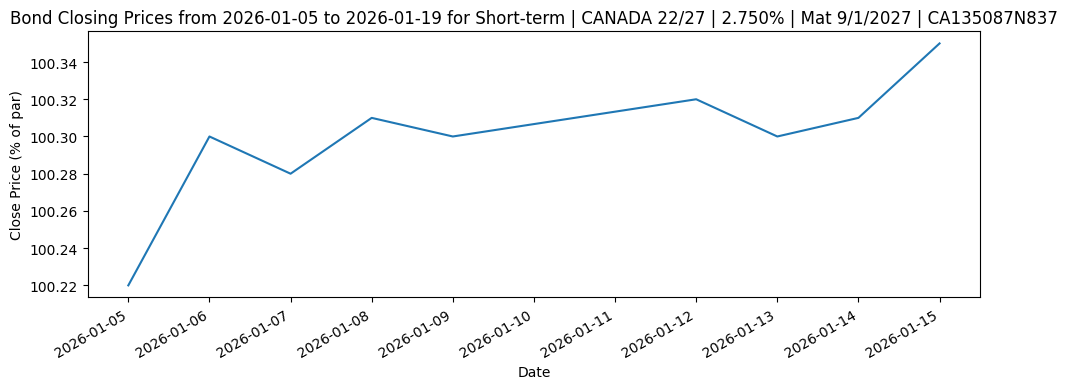

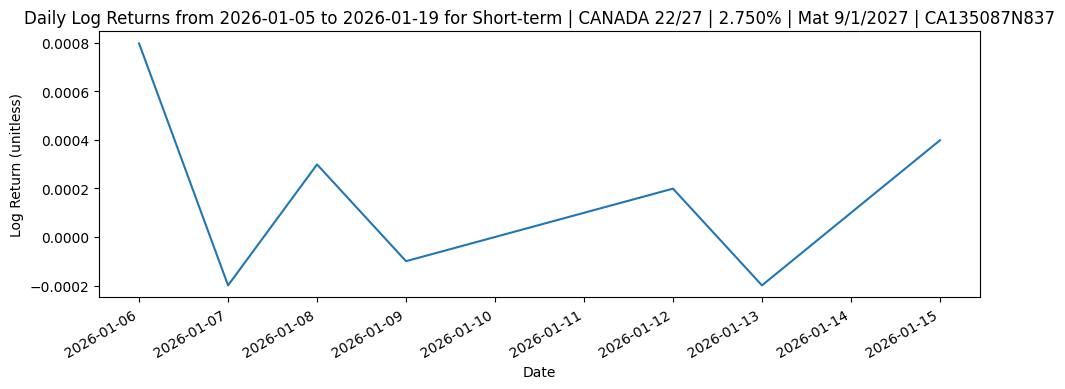


BOND: Long-term | CANADA 22/32 | 2.500% | Mat 12/1/2032 | CA135087P329


Term                                      bond_page_url  \
308  Long-term  https://markets.businessinsider.com/bonds/cana...   
309  Long-term  https://markets.businessinsider.com/bonds/cana...   
310  Long-term  https://markets.businessinsider.com/bonds/cana...   
311  Long-term  https://markets.businessinsider.com/bonds/cana...   
312  Long-term  https://markets.businessinsider.com/bonds/cana...   
313  Long-term  https://markets.businessinsider.com/bonds/cana...   
314  Long-term  https://markets.businessinsider.com/bonds/cana...   
315  Long-term  https://markets.businessinsider.com/bonds/cana...   
316  Long-term  https://markets.businessinsider.com/bonds/cana...   

                   tkData                                     chart_json_url  \
308  1,120914999,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
309  1,120914999,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
310  1,120914999,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
311  1,120914999,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
312  1,120914999,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
313  1,120914999,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
314  1,120914999,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
315  1,120914999,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
316  1,120914999,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

             ISIN          Name Country                    Issuer  \
308  CA135087P329  CANADA 22/32  Canada  Canada, Government of...   
309  CA135087P329  CANADA 22/32  Canada  Canada, Government of...   
310  CA135087P329  CANADA 22/32  Canada  Canada, Government of...   
311  CA135087P329  CANADA 22/32  Canada  Canada, Government of...   
312  CA135087P329  CANADA 22/32  Canada  Canada, Government of...   
313  CA135087P329  CANADA 22/32  Canada  Canada, Government of...   
314  CA135087P329  CANADA 22/32  Canada  Canada, Government of...   
315  CA135087P329  CANADA 22/32  Canada  Canada, Government of...   
316  CA135087P329  CANADA 22/32  Canada  Canada, Government of...   

       Issue Volume Currency  ... Special Coupon Type Maturity Date  \
308  21,000,000,000      CAD  ...                         12/1/2032   
309  21,000,000,000      CAD  ...                         12/1/2032   
310  21,000,000,000      CAD  ...                         12/1/2032   
311  21,000,000,000      CAD  ...                         12/1/2032   
312  21,000,000,000      CAD  ...                         12/1/2032   
313  21,000,000,000      CAD  ...                         12/1/2032   
314  21,000,000,000      CAD  ...                         12/1/2032   
315  21,000,000,000      CAD  ...                         12/1/2032   
316  21,000,000,000      CAD  ...                         12/1/2032   

    Coupon Payment Date Payment Frequency No. of Payments per Year  \
308            6/1/2026                                        2.0   
309            6/1/2026                                        2.0   
310            6/1/2026                                        2.0   
311            6/1/2026                                        2.0   
312            6/1/2026                                        2.0   
313            6/1/2026                                        2.0   
314            6/1/2026                                        2.0   
315            6/1/2026                                        2.0   
316            6/1/2026                                        2.0   

    Coupon Start Date Final Coupon Date Floater?        date  \
308         12/1/2022        11/30/2032       No  2026-01-05   
309         12/1/2022        11/30/2032       No  2026-01-06   
310         12/1/2022        11/30/2032       No  2026-01-07   
311         12/1/2022        11/30/2032       No  2026-01-08   
312         12/1/2022        11/30/2032       No  2026-01-09   
313         12/1/2022        11

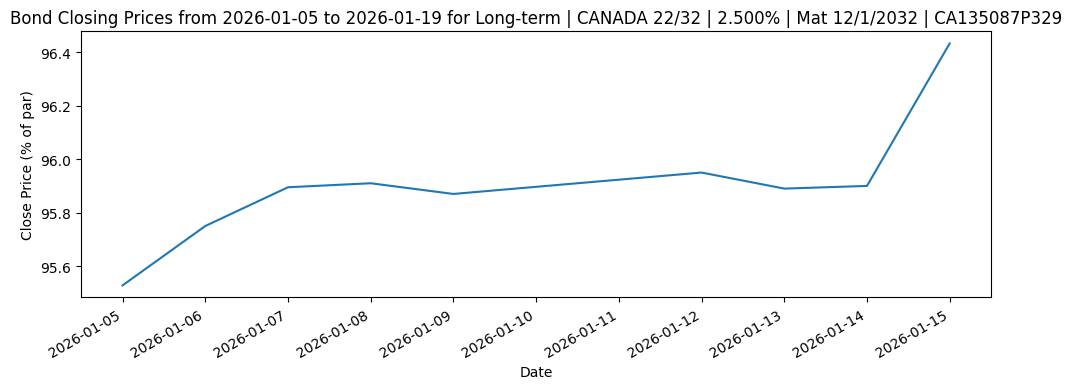

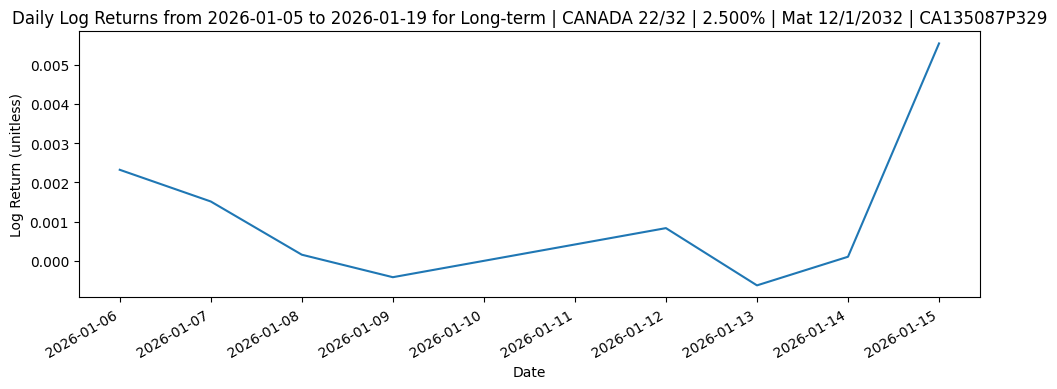


BOND: Short-term | CANADA 22/28 | 3.500% | Mat 3/1/2028 | CA135087P576


Term                                      bond_page_url  \
163  Short-term  https://markets.businessinsider.com/bonds/cana...   
164  Short-term  https://markets.businessinsider.com/bonds/cana...   
165  Short-term  https://markets.businessinsider.com/bonds/cana...   
166  Short-term  https://markets.businessinsider.com/bonds/cana...   
167  Short-term  https://markets.businessinsider.com/bonds/cana...   
168  Short-term  https://markets.businessinsider.com/bonds/cana...   
169  Short-term  https://markets.businessinsider.com/bonds/cana...   
170  Short-term  https://markets.businessinsider.com/bonds/cana...   
171  Short-term  https://markets.businessinsider.com/bonds/cana...   

                   tkData                                     chart_json_url  \
163  1,122651336,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
164  1,122651336,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
165  1,122651336,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
166  1,122651336,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
167  1,122651336,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
168  1,122651336,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
169  1,122651336,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
170  1,122651336,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
171  1,122651336,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

             ISIN          Name Country                    Issuer  \
163  CA135087P576  CANADA 22/28  Canada  Canada, Government of...   
164  CA135087P576  CANADA 22/28  Canada  Canada, Government of...   
165  CA135087P576  CANADA 22/28  Canada  Canada, Government of...   
166  CA135087P576  CANADA 22/28  Canada  Canada, Government of...   
167  CA135087P576  CANADA 22/28  Canada  Canada, Government of...   
168  CA135087P576  CANADA 22/28  Canada  Canada, Government of...   
169  CA135087P576  CANADA 22/28  Canada  Canada, Government of...   
170  CA135087P576  CANADA 22/28  Canada  Canada, Government of...   
171  CA135087P576  CANADA 22/28  Canada  Canada, Government of...   

       Issue Volume Currency  ... Special Coupon Type Maturity Date  \
163  15,000,000,000      CAD  ...                          3/1/2028   
164  15,000,000,000      CAD  ...                          3/1/2028   
165  15,000,000,000      CAD  ...                          3/1/2028   
166  15,000,000,000      CAD  ...                          3/1/2028   
167  15,000,000,000      CAD  ...                          3/1/2028   
168  15,000,000,000      CAD  ...                          3/1/2028   
169  15,000,000,000      CAD  ...                          3/1/2028   
170  15,000,000,000      CAD  ...                          3/1/2028   
171  15,000,000,000      CAD  ...                          3/1/2028   

    Coupon Payment Date Payment Frequency No. of Payments per Year  \
163            3/1/2026                                        2.0   
164            3/1/2026                                        2.0   
165            3/1/2026                                        2.0   
166            3/1/2026                                        2.0   
167            3/1/2026                                        2.0   
168            3/1/2026                                        2.0   
169            3/1/2026                                        2.0   
170            3/1/2026                                        2.0   
171            3/1/2026                                        2.0   

    Coupon Start Date Final Coupon Date Floater?        date  \
163          3/1/2023         2/29/2028       No  2026-01-05   
164          3/1/2023         2/29/2028       No  2026-01-06   
165          3/1/2023         2/29/2028       No  2026-01-07   
166          3/1/2023         2/29/2028       No  2026-01-08   
167          3/1/2023         2/29/2028       No  2026-01-09   
168          3/1/2023 

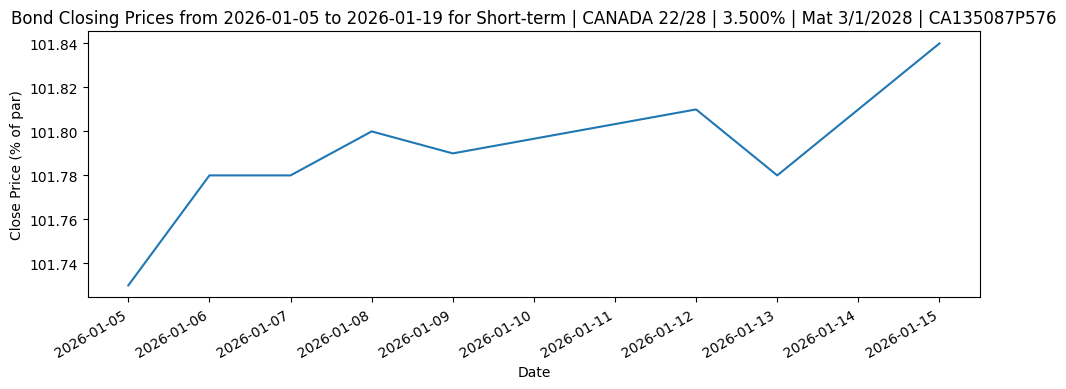

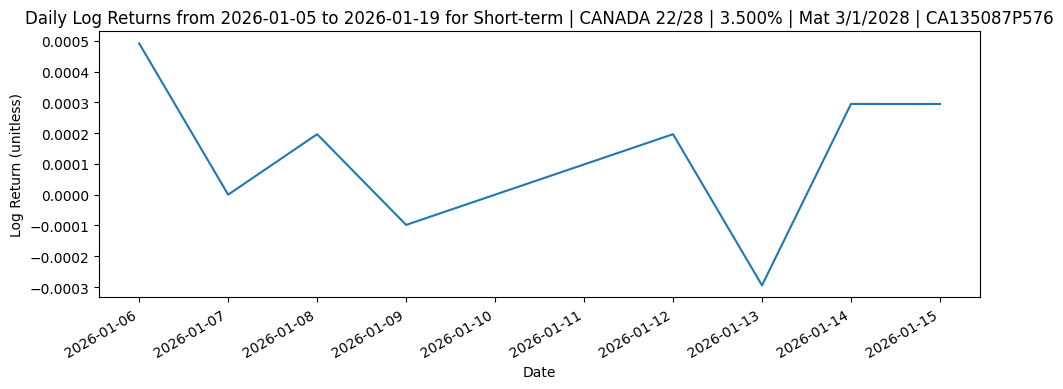


BOND: Short-term | CANADA 22/27 | 3.245% | Mat 8/24/2027 | CA135087P733


Term                                      bond_page_url  \
126  Short-term  https://markets.businessinsider.com/bonds/cana...   
127  Short-term  https://markets.businessinsider.com/bonds/cana...   
128  Short-term  https://markets.businessinsider.com/bonds/cana...   
129  Short-term  https://markets.businessinsider.com/bonds/cana...   
130  Short-term  https://markets.businessinsider.com/bonds/cana...   
131  Short-term  https://markets.businessinsider.com/bonds/cana...   
132  Short-term  https://markets.businessinsider.com/bonds/cana...   
133  Short-term  https://markets.businessinsider.com/bonds/cana...   
134  Short-term  https://markets.businessinsider.com/bonds/cana...   

                   tkData                                     chart_json_url  \
126  1,123653782,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
127  1,123653782,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
128  1,123653782,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
129  1,123653782,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
130  1,123653782,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
131  1,123653782,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
132  1,123653782,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
133  1,123653782,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
134  1,123653782,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

             ISIN          Name Country                    Issuer  \
126  CA135087P733  CANADA 22/27  Canada  Canada, Government of...   
127  CA135087P733  CANADA 22/27  Canada  Canada, Government of...   
128  CA135087P733  CANADA 22/27  Canada  Canada, Government of...   
129  CA135087P733  CANADA 22/27  Canada  Canada, Government of...   
130  CA135087P733  CANADA 22/27  Canada  Canada, Government of...   
131  CA135087P733  CANADA 22/27  Canada  Canada, Government of...   
132  CA135087P733  CANADA 22/27  Canada  Canada, Government of...   
133  CA135087P733  CANADA 22/27  Canada  Canada, Government of...   
134  CA135087P733  CANADA 22/27  Canada  Canada, Government of...   

    Issue Volume Currency  ... Special Coupon Type Maturity Date  \
126  500,000,000      CAD  ...                         8/24/2027   
127  500,000,000      CAD  ...                         8/24/2027   
128  500,000,000      CAD  ...                         8/24/2027   
129  500,000,000      CAD  ...                         8/24/2027   
130  500,000,000      CAD  ...                         8/24/2027   
131  500,000,000      CAD  ...                         8/24/2027   
132  500,000,000      CAD  ...                         8/24/2027   
133  500,000,000      CAD  ...                         8/24/2027   
134  500,000,000      CAD  ...                         8/24/2027   

    Coupon Payment Date Payment Frequency No. of Payments per Year  \
126           2/24/2026                                        2.0   
127           2/24/2026                                        2.0   
128           2/24/2026                                        2.0   
129           2/24/2026                                        2.0   
130           2/24/2026                                        2.0   
131           2/24/2026                                        2.0   
132           2/24/2026                                        2.0   
133           2/24/2026                                        2.0   
134           2/24/2026                                        2.0   

    Coupon Start Date Final Coupon Date Floater?        date  \
126         2/24/2023         8/23/2027       No  2026-01-05   
127         2/24/2023         8/23/2027       No  2026-01-06   
128         2/24/2023         8/23/2027       No  2026-01-07   
129         2/24/2023         8/23/2027       No  2026-01-08   
130         2/24/2023         8/23/2027       No  2026-01-09   
131         2/24/2023         8/23/2027       No  20

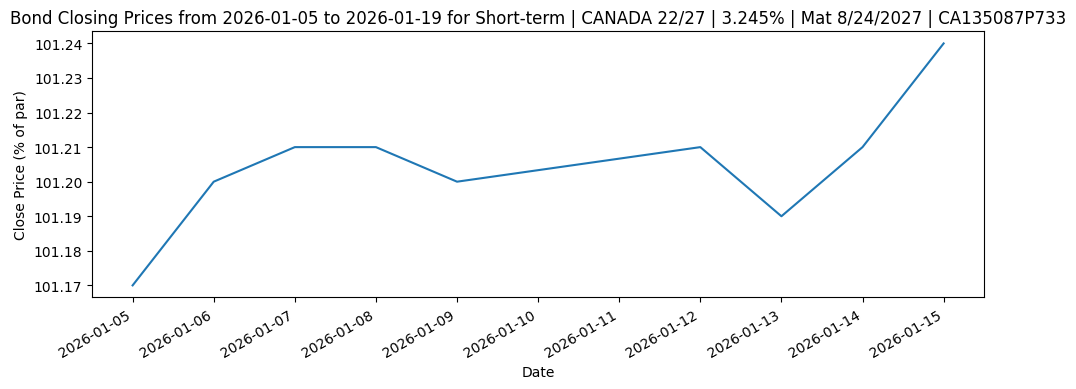

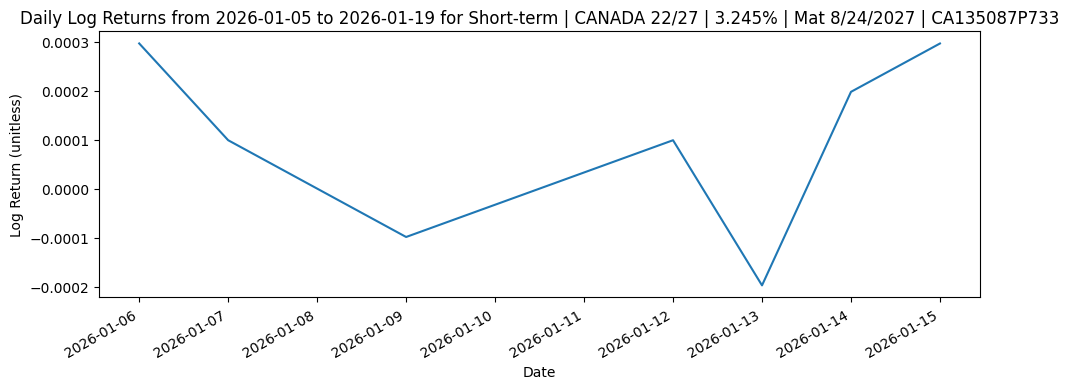


BOND: Short-term | CANADA 23/26 | 3.000% | Mat 4/1/2026 | CA135087P816


Term                                      bond_page_url  \
18  Short-term  https://markets.businessinsider.com/bonds/cana...   
19  Short-term  https://markets.businessinsider.com/bonds/cana...   
20  Short-term  https://markets.businessinsider.com/bonds/cana...   
21  Short-term  https://markets.businessinsider.com/bonds/cana...   
22  Short-term  https://markets.businessinsider.com/bonds/cana...   
23  Short-term  https://markets.businessinsider.com/bonds/cana...   
24  Short-term  https://markets.businessinsider.com/bonds/cana...   
25  Short-term  https://markets.businessinsider.com/bonds/cana...   
26  Short-term  https://markets.businessinsider.com/bonds/cana...   

                  tkData                                     chart_json_url  \
18  1,124578091,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
19  1,124578091,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
20  1,124578091,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
21  1,124578091,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
22  1,124578091,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
23  1,124578091,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
24  1,124578091,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
25  1,124578091,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
26  1,124578091,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

            ISIN          Name Country                    Issuer  \
18  CA135087P816  CANADA 23/26  Canada  Canada, Government of...   
19  CA135087P816  CANADA 23/26  Canada  Canada, Government of...   
20  CA135087P816  CANADA 23/26  Canada  Canada, Government of...   
21  CA135087P816  CANADA 23/26  Canada  Canada, Government of...   
22  CA135087P816  CANADA 23/26  Canada  Canada, Government of...   
23  CA135087P816  CANADA 23/26  Canada  Canada, Government of...   
24  CA135087P816  CANADA 23/26  Canada  Canada, Government of...   
25  CA135087P816  CANADA 23/26  Canada  Canada, Government of...   
26  CA135087P816  CANADA 23/26  Canada  Canada, Government of...   

      Issue Volume Currency  ... Special Coupon Type Maturity Date  \
18  10,000,000,000      CAD  ...                          4/1/2026   
19  10,000,000,000      CAD  ...                          4/1/2026   
20  10,000,000,000      CAD  ...                          4/1/2026   
21  10,000,000,000      CAD  ...                          4/1/2026   
22  10,000,000,000      CAD  ...                          4/1/2026   
23  10,000,000,000      CAD  ...                          4/1/2026   
24  10,000,000,000      CAD  ...                          4/1/2026   
25  10,000,000,000      CAD  ...                          4/1/2026   
26  10,000,000,000      CAD  ...                          4/1/2026   

   Coupon Payment Date Payment Frequency No. of Payments per Year  \
18            4/1/2026                                        2.0   
19            4/1/2026                                        2.0   
20            4/1/2026                                        2.0   
21            4/1/2026                                        2.0   
22            4/1/2026                                        2.0   
23            4/1/2026                                        2.0   
24            4/1/2026                                        2.0   
25            4/1/2026                                        2.0   
26            4/1/2026                                        2.0   

   Coupon Start Date Final Coupon Date Floater?        date  \
18          4/1/2023         3/31/2026       No  2026-01-05   
19          4/1/2023         3/31/2026       No  2026-01-06   
20          4/1/2023         3/31/2026       No  2026-01-07   
21          4/1/2023         3/31/2026       No  2026-01-08   
22          4/1/2023         3/31/2026       No  2026-01-09   
23          4/1/2023         3/31/2026       No  2026-01-12   
24          4/

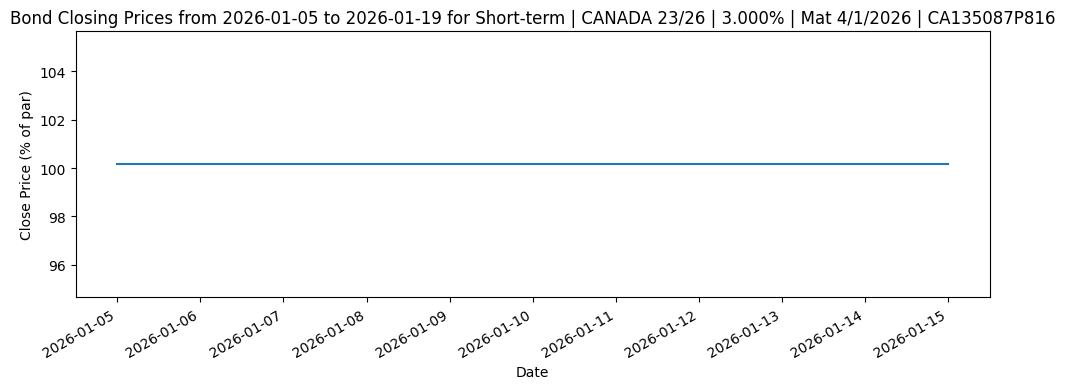

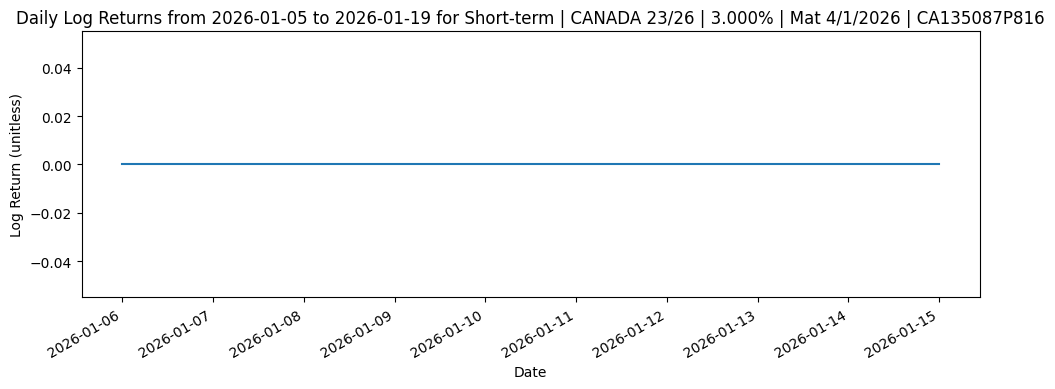


BOND: Short-term | CANADA 23/28 | 3.250% | Mat 9/1/2028 | CA135087Q491


Term                                      bond_page_url  \
181  Short-term  https://markets.businessinsider.com/bonds/cana...   
182  Short-term  https://markets.businessinsider.com/bonds/cana...   
183  Short-term  https://markets.businessinsider.com/bonds/cana...   
184  Short-term  https://markets.businessinsider.com/bonds/cana...   
185  Short-term  https://markets.businessinsider.com/bonds/cana...   
186  Short-term  https://markets.businessinsider.com/bonds/cana...   
187  Short-term  https://markets.businessinsider.com/bonds/cana...   
188  Short-term  https://markets.businessinsider.com/bonds/cana...   
189  Short-term  https://markets.businessinsider.com/bonds/cana...   

                   tkData                                     chart_json_url  \
181  1,126528699,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
182  1,126528699,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
183  1,126528699,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
184  1,126528699,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
185  1,126528699,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
186  1,126528699,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
187  1,126528699,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
188  1,126528699,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
189  1,126528699,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

             ISIN          Name Country                    Issuer  \
181  CA135087Q491  CANADA 23/28  Canada  Canada, Government of...   
182  CA135087Q491  CANADA 23/28  Canada  Canada, Government of...   
183  CA135087Q491  CANADA 23/28  Canada  Canada, Government of...   
184  CA135087Q491  CANADA 23/28  Canada  Canada, Government of...   
185  CA135087Q491  CANADA 23/28  Canada  Canada, Government of...   
186  CA135087Q491  CANADA 23/28  Canada  Canada, Government of...   
187  CA135087Q491  CANADA 23/28  Canada  Canada, Government of...   
188  CA135087Q491  CANADA 23/28  Canada  Canada, Government of...   
189  CA135087Q491  CANADA 23/28  Canada  Canada, Government of...   

       Issue Volume Currency  ... Special Coupon Type Maturity Date  \
181  20,000,000,000      CAD  ...                          9/1/2028   
182  20,000,000,000      CAD  ...                          9/1/2028   
183  20,000,000,000      CAD  ...                          9/1/2028   
184  20,000,000,000      CAD  ...                          9/1/2028   
185  20,000,000,000      CAD  ...                          9/1/2028   
186  20,000,000,000      CAD  ...                          9/1/2028   
187  20,000,000,000      CAD  ...                          9/1/2028   
188  20,000,000,000      CAD  ...                          9/1/2028   
189  20,000,000,000      CAD  ...                          9/1/2028   

    Coupon Payment Date Payment Frequency No. of Payments per Year  \
181            3/1/2026                                        2.0   
182            3/1/2026                                        2.0   
183            3/1/2026                                        2.0   
184            3/1/2026                                        2.0   
185            3/1/2026                                        2.0   
186            3/1/2026                                        2.0   
187            3/1/2026                                        2.0   
188            3/1/2026                                        2.0   
189            3/1/2026                                        2.0   

    Coupon Start Date Final Coupon Date Floater?        date  \
181          9/1/2023         8/31/2028       No  2026-01-05   
182          9/1/2023         8/31/2028       No  2026-01-06   
183          9/1/2023         8/31/2028       No  2026-01-07   
184          9/1/2023         8/31/2028       No  2026-01-08   
185          9/1/2023         8/31/2028       No  2026-01-09   
186          9/1/2023 

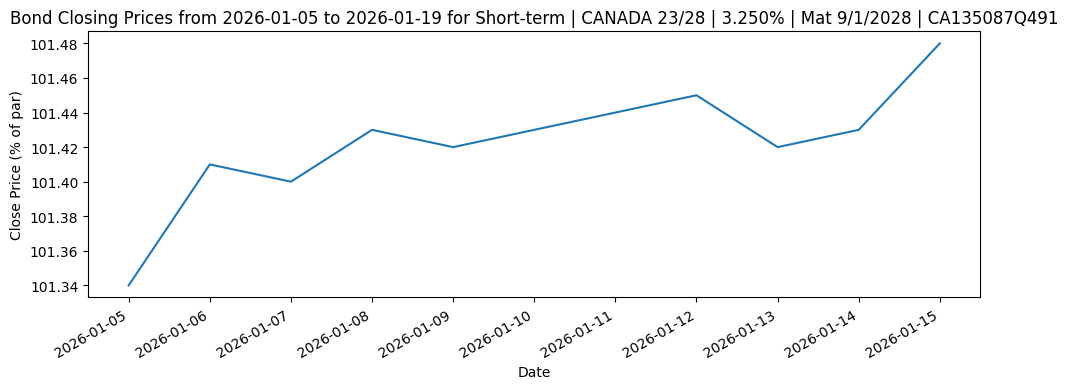

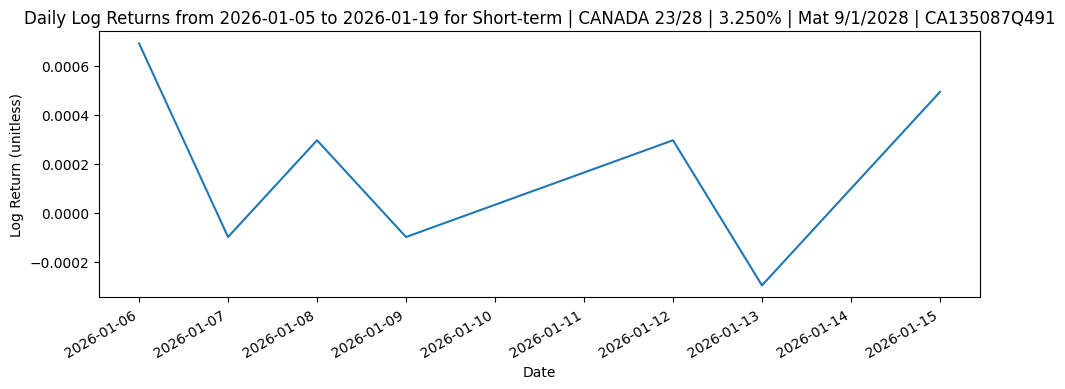


BOND: Long-term | CANADA 23/33 | 3.250% | Mat 12/1/2033 | CA135087Q723


Term                                      bond_page_url  \
335  Long-term  https://markets.businessinsider.com/bonds/cana...   
336  Long-term  https://markets.businessinsider.com/bonds/cana...   
337  Long-term  https://markets.businessinsider.com/bonds/cana...   
338  Long-term  https://markets.businessinsider.com/bonds/cana...   
339  Long-term  https://markets.businessinsider.com/bonds/cana...   
340  Long-term  https://markets.businessinsider.com/bonds/cana...   
341  Long-term  https://markets.businessinsider.com/bonds/cana...   
342  Long-term  https://markets.businessinsider.com/bonds/cana...   
343  Long-term  https://markets.businessinsider.com/bonds/cana...   

                   tkData                                     chart_json_url  \
335  1,128007448,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
336  1,128007448,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
337  1,128007448,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
338  1,128007448,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
339  1,128007448,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
340  1,128007448,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
341  1,128007448,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
342  1,128007448,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
343  1,128007448,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

             ISIN          Name Country                    Issuer  \
335  CA135087Q723  CANADA 23/33  Canada  Canada, Government of...   
336  CA135087Q723  CANADA 23/33  Canada  Canada, Government of...   
337  CA135087Q723  CANADA 23/33  Canada  Canada, Government of...   
338  CA135087Q723  CANADA 23/33  Canada  Canada, Government of...   
339  CA135087Q723  CANADA 23/33  Canada  Canada, Government of...   
340  CA135087Q723  CANADA 23/33  Canada  Canada, Government of...   
341  CA135087Q723  CANADA 23/33  Canada  Canada, Government of...   
342  CA135087Q723  CANADA 23/33  Canada  Canada, Government of...   
343  CA135087Q723  CANADA 23/33  Canada  Canada, Government of...   

       Issue Volume Currency  ... Special Coupon Type Maturity Date  \
335  21,000,000,000      CAD  ...                         12/1/2033   
336  21,000,000,000      CAD  ...                         12/1/2033   
337  21,000,000,000      CAD  ...                         12/1/2033   
338  21,000,000,000      CAD  ...                         12/1/2033   
339  21,000,000,000      CAD  ...                         12/1/2033   
340  21,000,000,000      CAD  ...                         12/1/2033   
341  21,000,000,000      CAD  ...                         12/1/2033   
342  21,000,000,000      CAD  ...                         12/1/2033   
343  21,000,000,000      CAD  ...                         12/1/2033   

    Coupon Payment Date Payment Frequency No. of Payments per Year  \
335            6/1/2026                                        2.0   
336            6/1/2026                                        2.0   
337            6/1/2026                                        2.0   
338            6/1/2026                                        2.0   
339            6/1/2026                                        2.0   
340            6/1/2026                                        2.0   
341            6/1/2026                                        2.0   
342            6/1/2026                                        2.0   
343            6/1/2026                                        2.0   

    Coupon Start Date Final Coupon Date Floater?        date  \
335         12/1/2023        11/30/2033       No  2026-01-05   
336         12/1/2023        11/30/2033       No  2026-01-06   
337         12/1/2023        11/30/2033       No  2026-01-07   
338         12/1/2023        11/30/2033       No  2026-01-08   
339         12/1/2023        11/30/2033       No  2026-01-09   
340         12/1/2023        11

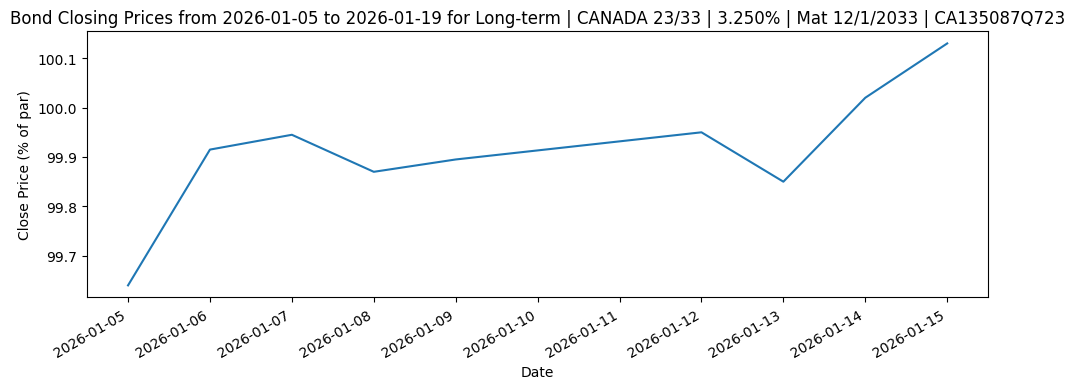

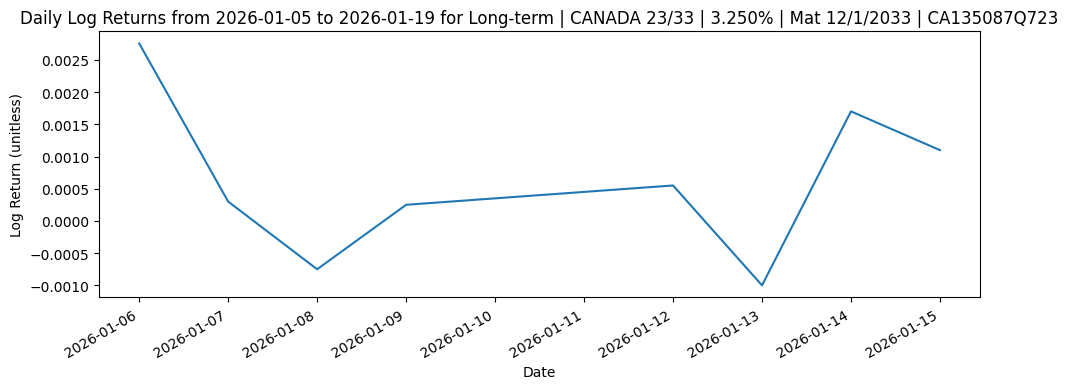


BOND: Long-term | CANADA 23/29 | 4.000% | Mat 3/1/2029 | CA135087Q988


Term                                      bond_page_url  \
326  Long-term  https://markets.businessinsider.com/bonds/cana...   
327  Long-term  https://markets.businessinsider.com/bonds/cana...   
328  Long-term  https://markets.businessinsider.com/bonds/cana...   
329  Long-term  https://markets.businessinsider.com/bonds/cana...   
330  Long-term  https://markets.businessinsider.com/bonds/cana...   
331  Long-term  https://markets.businessinsider.com/bonds/cana...   
332  Long-term  https://markets.businessinsider.com/bonds/cana...   
333  Long-term  https://markets.businessinsider.com/bonds/cana...   
334  Long-term  https://markets.businessinsider.com/bonds/cana...   

                   tkData                                     chart_json_url  \
326  1,130328741,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
327  1,130328741,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
328  1,130328741,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
329  1,130328741,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
330  1,130328741,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
331  1,130328741,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
332  1,130328741,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
333  1,130328741,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
334  1,130328741,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

             ISIN          Name Country                    Issuer  \
326  CA135087Q988  CANADA 23/29  Canada  Canada, Government of...   
327  CA135087Q988  CANADA 23/29  Canada  Canada, Government of...   
328  CA135087Q988  CANADA 23/29  Canada  Canada, Government of...   
329  CA135087Q988  CANADA 23/29  Canada  Canada, Government of...   
330  CA135087Q988  CANADA 23/29  Canada  Canada, Government of...   
331  CA135087Q988  CANADA 23/29  Canada  Canada, Government of...   
332  CA135087Q988  CANADA 23/29  Canada  Canada, Government of...   
333  CA135087Q988  CANADA 23/29  Canada  Canada, Government of...   
334  CA135087Q988  CANADA 23/29  Canada  Canada, Government of...   

       Issue Volume Currency  ... Special Coupon Type Maturity Date  \
326  27,000,000,000      CAD  ...                          3/1/2029   
327  27,000,000,000      CAD  ...                          3/1/2029   
328  27,000,000,000      CAD  ...                          3/1/2029   
329  27,000,000,000      CAD  ...                          3/1/2029   
330  27,000,000,000      CAD  ...                          3/1/2029   
331  27,000,000,000      CAD  ...                          3/1/2029   
332  27,000,000,000      CAD  ...                          3/1/2029   
333  27,000,000,000      CAD  ...                          3/1/2029   
334  27,000,000,000      CAD  ...                          3/1/2029   

    Coupon Payment Date Payment Frequency No. of Payments per Year  \
326            3/1/2026                                        2.0   
327            3/1/2026                                        2.0   
328            3/1/2026                                        2.0   
329            3/1/2026                                        2.0   
330            3/1/2026                                        2.0   
331            3/1/2026                                        2.0   
332            3/1/2026                                        2.0   
333            3/1/2026                                        2.0   
334            3/1/2026                                        2.0   

    Coupon Start Date Final Coupon Date Floater?        date  \
326          3/1/2024         2/28/2029       No  2026-01-05   
327          3/1/2024         2/28/2029       No  2026-01-06   
328          3/1/2024         2/28/2029       No  2026-01-07   
329          3/1/2024         2/28/2029       No  2026-01-08   
330          3/1/2024         2/28/2029       No  2026-01-09   
331          3/1/2024         2

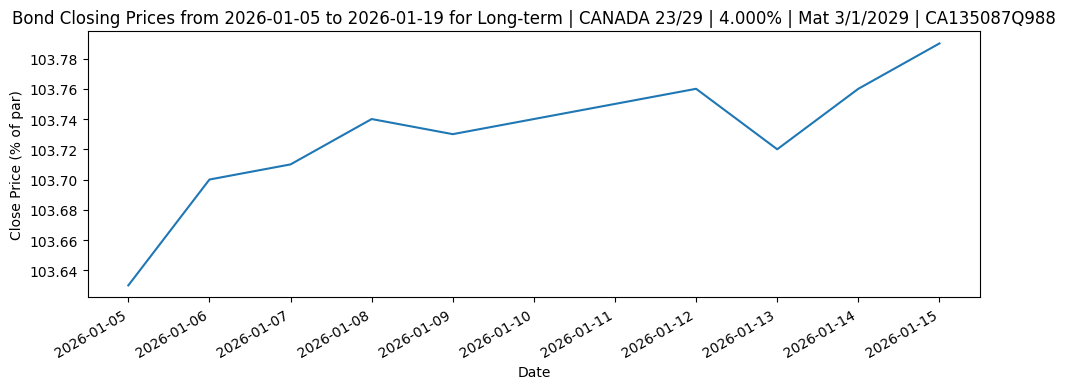

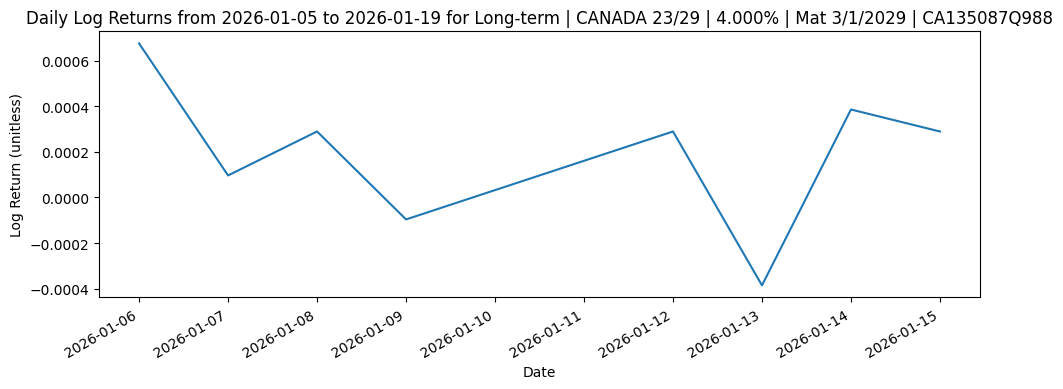


BOND: Short-term | CANADA 23/26 | 4.500% | Mat 2/1/2026 | CA135087R226


Term                                      bond_page_url  \
0  Short-term  https://markets.businessinsider.com/bonds/cana...   
1  Short-term  https://markets.businessinsider.com/bonds/cana...   
2  Short-term  https://markets.businessinsider.com/bonds/cana...   
3  Short-term  https://markets.businessinsider.com/bonds/cana...   
4  Short-term  https://markets.businessinsider.com/bonds/cana...   
5  Short-term  https://markets.businessinsider.com/bonds/cana...   
6  Short-term  https://markets.businessinsider.com/bonds/cana...   
7  Short-term  https://markets.businessinsider.com/bonds/cana...   
8  Short-term  https://markets.businessinsider.com/bonds/cana...   

                 tkData                                     chart_json_url  \
0  1,130654501,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
1  1,130654501,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
2  1,130654501,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
3  1,130654501,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
4  1,130654501,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
5  1,130654501,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
6  1,130654501,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
7  1,130654501,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
8  1,130654501,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

           ISIN          Name Country                    Issuer  \
0  CA135087R226  CANADA 23/26  Canada  Canada, Government of...   
1  CA135087R226  CANADA 23/26  Canada  Canada, Government of...   
2  CA135087R226  CANADA 23/26  Canada  Canada, Government of...   
3  CA135087R226  CANADA 23/26  Canada  Canada, Government of...   
4  CA135087R226  CANADA 23/26  Canada  Canada, Government of...   
5  CA135087R226  CANADA 23/26  Canada  Canada, Government of...   
6  CA135087R226  CANADA 23/26  Canada  Canada, Government of...   
7  CA135087R226  CANADA 23/26  Canada  Canada, Government of...   
8  CA135087R226  CANADA 23/26  Canada  Canada, Government of...   

     Issue Volume Currency  ... Special Coupon Type Maturity Date  \
0  23,000,000,000      CAD  ...                          2/1/2026   
1  23,000,000,000      CAD  ...                          2/1/2026   
2  23,000,000,000      CAD  ...                          2/1/2026   
3  23,000,000,000      CAD  ...                          2/1/2026   
4  23,000,000,000      CAD  ...                          2/1/2026   
5  23,000,000,000      CAD  ...                          2/1/2026   
6  23,000,000,000      CAD  ...                          2/1/2026   
7  23,000,000,000      CAD  ...                          2/1/2026   
8  23,000,000,000      CAD  ...                          2/1/2026   

  Coupon Payment Date Payment Frequency No. of Payments per Year  \
0            2/1/2026                                        2.0   
1            2/1/2026                                        2.0   
2            2/1/2026                                        2.0   
3            2/1/2026                                        2.0   
4            2/1/2026                                        2.0   
5            2/1/2026                                        2.0   
6            2/1/2026                                        2.0   
7            2/1/2026                                        2.0   
8            2/1/2026                                        2.0   

  Coupon Start Date Final Coupon Date Floater?        date  \
0          2/1/2024         1/31/2026       No  2026-01-05   
1          2/1/2024         1/31/2026       No  2026-01-06   
2          2/1/2024         1/31/2026       No  2026-01-07   
3          2/1/2024         1/31/2026       No  2026-01-08   
4          2/1/2024         1/31/2026       No  2026-01-09   
5          2/1/2024         1/31/2026       No  2026-01-12   
6          2/1/2024         1/31/2026       No  2026-01-13   
7       

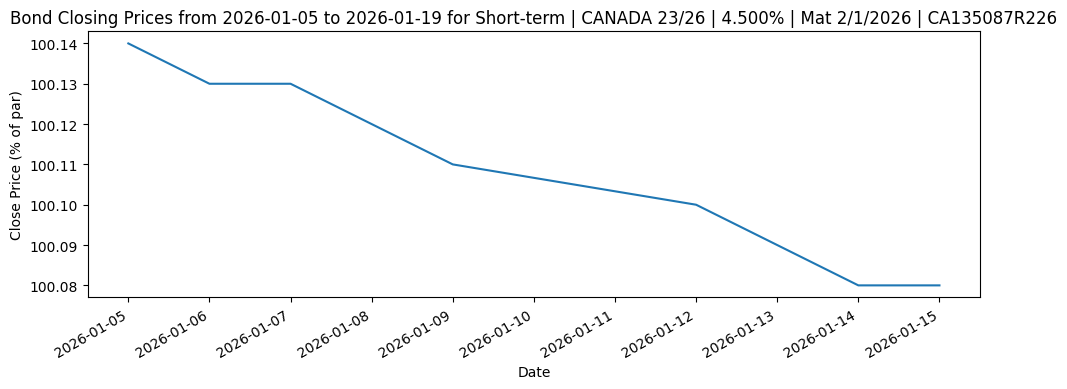

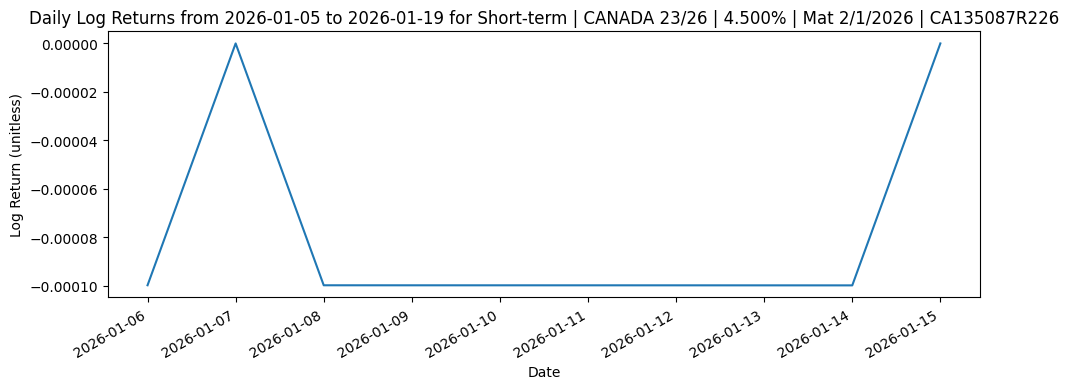


BOND: Long-term | CANADA 23/34 | 3.000% | Mat 6/1/2034 | CA135087R481


Term                                      bond_page_url  \
299  Long-term  https://markets.businessinsider.com/bonds/cana...   
300  Long-term  https://markets.businessinsider.com/bonds/cana...   
301  Long-term  https://markets.businessinsider.com/bonds/cana...   
302  Long-term  https://markets.businessinsider.com/bonds/cana...   
303  Long-term  https://markets.businessinsider.com/bonds/cana...   
304  Long-term  https://markets.businessinsider.com/bonds/cana...   
305  Long-term  https://markets.businessinsider.com/bonds/cana...   
306  Long-term  https://markets.businessinsider.com/bonds/cana...   
307  Long-term  https://markets.businessinsider.com/bonds/cana...   

                   tkData                                     chart_json_url  \
299  1,131843886,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
300  1,131843886,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
301  1,131843886,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
302  1,131843886,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
303  1,131843886,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
304  1,131843886,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
305  1,131843886,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
306  1,131843886,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
307  1,131843886,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

             ISIN          Name Country                    Issuer  \
299  CA135087R481  CANADA 23/34  Canada  Canada, Government of...   
300  CA135087R481  CANADA 23/34  Canada  Canada, Government of...   
301  CA135087R481  CANADA 23/34  Canada  Canada, Government of...   
302  CA135087R481  CANADA 23/34  Canada  Canada, Government of...   
303  CA135087R481  CANADA 23/34  Canada  Canada, Government of...   
304  CA135087R481  CANADA 23/34  Canada  Canada, Government of...   
305  CA135087R481  CANADA 23/34  Canada  Canada, Government of...   
306  CA135087R481  CANADA 23/34  Canada  Canada, Government of...   
307  CA135087R481  CANADA 23/34  Canada  Canada, Government of...   

       Issue Volume Currency  ... Special Coupon Type Maturity Date  \
299  34,000,000,000      CAD  ...                          6/1/2034   
300  34,000,000,000      CAD  ...                          6/1/2034   
301  34,000,000,000      CAD  ...                          6/1/2034   
302  34,000,000,000      CAD  ...                          6/1/2034   
303  34,000,000,000      CAD  ...                          6/1/2034   
304  34,000,000,000      CAD  ...                          6/1/2034   
305  34,000,000,000      CAD  ...                          6/1/2034   
306  34,000,000,000      CAD  ...                          6/1/2034   
307  34,000,000,000      CAD  ...                          6/1/2034   

    Coupon Payment Date Payment Frequency No. of Payments per Year  \
299            6/1/2026                                        2.0   
300            6/1/2026                                        2.0   
301            6/1/2026                                        2.0   
302            6/1/2026                                        2.0   
303            6/1/2026                                        2.0   
304            6/1/2026                                        2.0   
305            6/1/2026                                        2.0   
306            6/1/2026                                        2.0   
307            6/1/2026                                        2.0   

    Coupon Start Date Final Coupon Date Floater?        date  \
299          6/1/2024         5/31/2034       No  2026-01-05   
300          6/1/2024         5/31/2034       No  2026-01-06   
301          6/1/2024         5/31/2034       No  2026-01-07   
302          6/1/2024         5/31/2034       No  2026-01-08   
303          6/1/2024         5/31/2034       No  2026-01-09   
304          6/1/2024         5

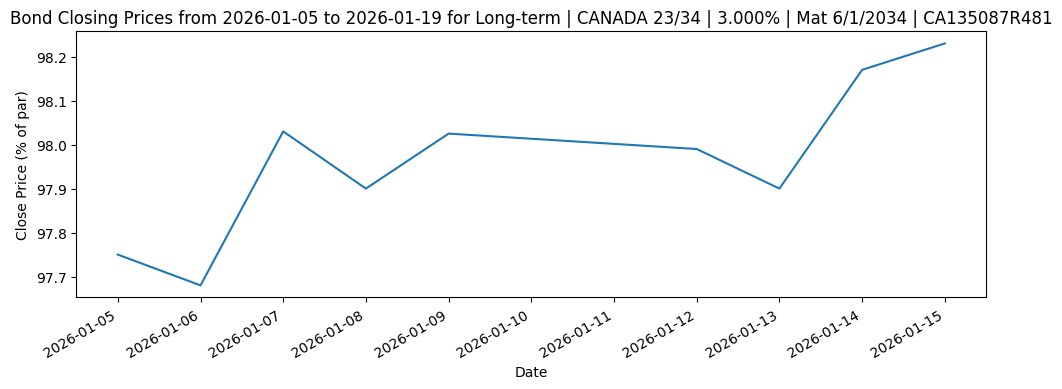

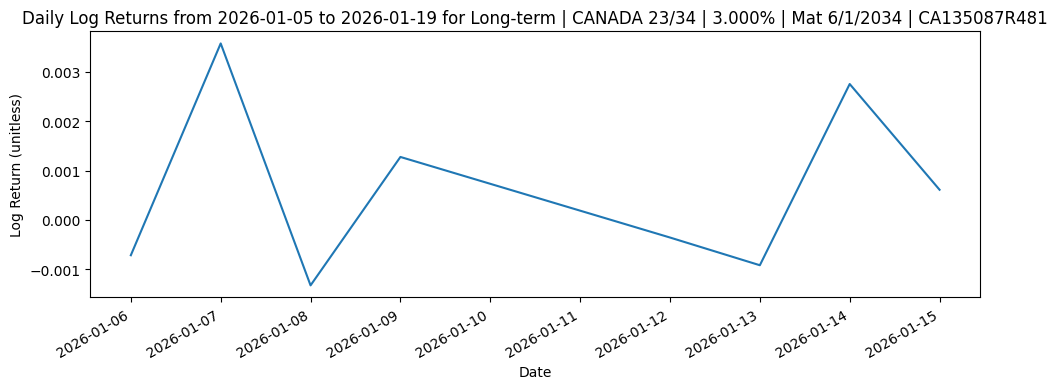


BOND: Short-term | CANADA 24/26 | 4.000% | Mat 5/1/2026 | CA135087R556


Term                                      bond_page_url  \
27  Short-term  https://markets.businessinsider.com/bonds/cana...   
28  Short-term  https://markets.businessinsider.com/bonds/cana...   
29  Short-term  https://markets.businessinsider.com/bonds/cana...   
30  Short-term  https://markets.businessinsider.com/bonds/cana...   
31  Short-term  https://markets.businessinsider.com/bonds/cana...   
32  Short-term  https://markets.businessinsider.com/bonds/cana...   
33  Short-term  https://markets.businessinsider.com/bonds/cana...   
34  Short-term  https://markets.businessinsider.com/bonds/cana...   
35  Short-term  https://markets.businessinsider.com/bonds/cana...   

                  tkData                                     chart_json_url  \
27  1,132969994,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
28  1,132969994,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
29  1,132969994,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
30  1,132969994,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
31  1,132969994,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
32  1,132969994,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
33  1,132969994,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
34  1,132969994,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
35  1,132969994,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

            ISIN          Name Country                    Issuer  \
27  CA135087R556  CANADA 24/26  Canada  Canada, Government of...   
28  CA135087R556  CANADA 24/26  Canada  Canada, Government of...   
29  CA135087R556  CANADA 24/26  Canada  Canada, Government of...   
30  CA135087R556  CANADA 24/26  Canada  Canada, Government of...   
31  CA135087R556  CANADA 24/26  Canada  Canada, Government of...   
32  CA135087R556  CANADA 24/26  Canada  Canada, Government of...   
33  CA135087R556  CANADA 24/26  Canada  Canada, Government of...   
34  CA135087R556  CANADA 24/26  Canada  Canada, Government of...   
35  CA135087R556  CANADA 24/26  Canada  Canada, Government of...   

      Issue Volume Currency  ... Special Coupon Type Maturity Date  \
27  26,000,000,000      CAD  ...                          5/1/2026   
28  26,000,000,000      CAD  ...                          5/1/2026   
29  26,000,000,000      CAD  ...                          5/1/2026   
30  26,000,000,000      CAD  ...                          5/1/2026   
31  26,000,000,000      CAD  ...                          5/1/2026   
32  26,000,000,000      CAD  ...                          5/1/2026   
33  26,000,000,000      CAD  ...                          5/1/2026   
34  26,000,000,000      CAD  ...                          5/1/2026   
35  26,000,000,000      CAD  ...                          5/1/2026   

   Coupon Payment Date Payment Frequency No. of Payments per Year  \
27            5/1/2026                                        2.0   
28            5/1/2026                                        2.0   
29            5/1/2026                                        2.0   
30            5/1/2026                                        2.0   
31            5/1/2026                                        2.0   
32            5/1/2026                                        2.0   
33            5/1/2026                                        2.0   
34            5/1/2026                                        2.0   
35            5/1/2026                                        2.0   

   Coupon Start Date Final Coupon Date Floater?        date  \
27          5/1/2024         4/30/2026       No  2026-01-05   
28          5/1/2024         4/30/2026       No  2026-01-06   
29          5/1/2024         4/30/2026       No  2026-01-07   
30          5/1/2024         4/30/2026       No  2026-01-08   
31          5/1/2024         4/30/2026       No  2026-01-09   
32          5/1/2024         4/30/2026       No  2026-01-12   
33          5/

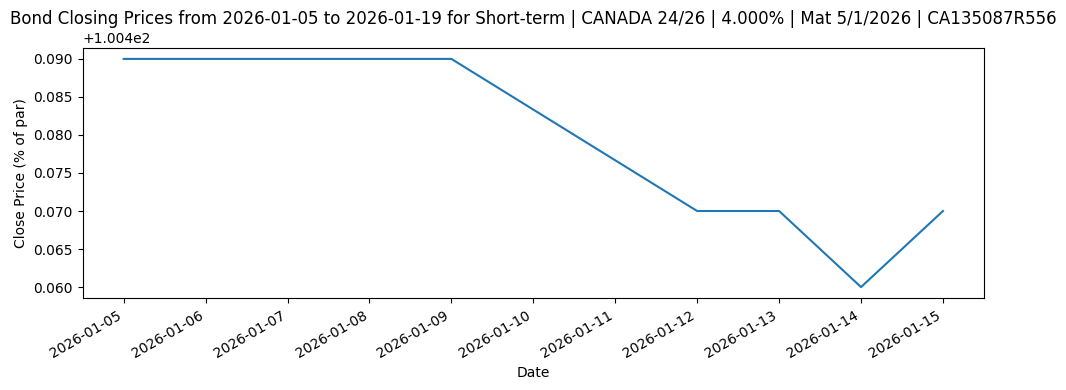

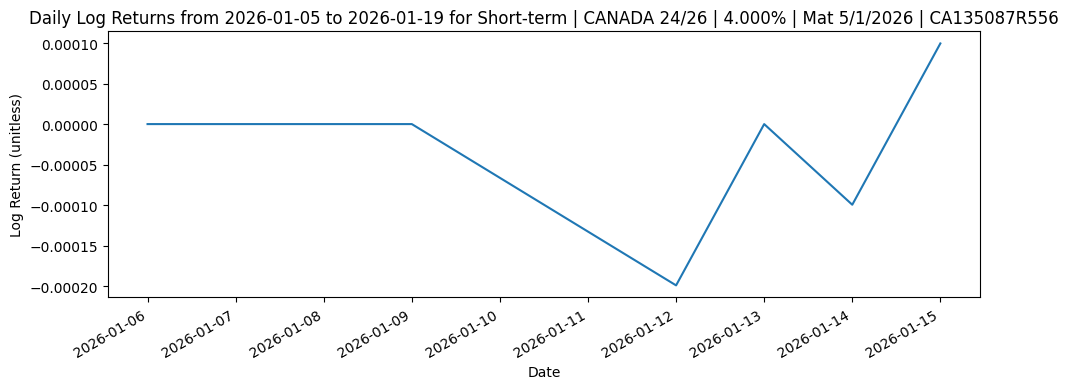


BOND: Long-term | CANADA 24/34 | 3.500% | Mat 3/1/2034 | CA135087R713


Term                                      bond_page_url  \
226  Long-term  https://markets.businessinsider.com/bonds/cana...   
227  Long-term  https://markets.businessinsider.com/bonds/cana...   
228  Long-term  https://markets.businessinsider.com/bonds/cana...   
229  Long-term  https://markets.businessinsider.com/bonds/cana...   
230  Long-term  https://markets.businessinsider.com/bonds/cana...   
231  Long-term  https://markets.businessinsider.com/bonds/cana...   
232  Long-term  https://markets.businessinsider.com/bonds/cana...   
233  Long-term  https://markets.businessinsider.com/bonds/cana...   
234  Long-term  https://markets.businessinsider.com/bonds/cana...   

                   tkData                                     chart_json_url  \
226  1,133356706,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
227  1,133356706,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
228  1,133356706,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
229  1,133356706,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
230  1,133356706,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
231  1,133356706,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
232  1,133356706,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
233  1,133356706,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
234  1,133356706,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

             ISIN          Name Country                    Issuer  \
226  CA135087R713  CANADA 24/34  Canada  Canada, Government of...   
227  CA135087R713  CANADA 24/34  Canada  Canada, Government of...   
228  CA135087R713  CANADA 24/34  Canada  Canada, Government of...   
229  CA135087R713  CANADA 24/34  Canada  Canada, Government of...   
230  CA135087R713  CANADA 24/34  Canada  Canada, Government of...   
231  CA135087R713  CANADA 24/34  Canada  Canada, Government of...   
232  CA135087R713  CANADA 24/34  Canada  Canada, Government of...   
233  CA135087R713  CANADA 24/34  Canada  Canada, Government of...   
234  CA135087R713  CANADA 24/34  Canada  Canada, Government of...   

      Issue Volume Currency  ... Special Coupon Type Maturity Date  \
226  6,000,000,000      CAD  ...                          3/1/2034   
227  6,000,000,000      CAD  ...                          3/1/2034   
228  6,000,000,000      CAD  ...                          3/1/2034   
229  6,000,000,000      CAD  ...                          3/1/2034   
230  6,000,000,000      CAD  ...                          3/1/2034   
231  6,000,000,000      CAD  ...                          3/1/2034   
232  6,000,000,000      CAD  ...                          3/1/2034   
233  6,000,000,000      CAD  ...                          3/1/2034   
234  6,000,000,000      CAD  ...                          3/1/2034   

    Coupon Payment Date Payment Frequency No. of Payments per Year  \
226            3/1/2026                                        2.0   
227            3/1/2026                                        2.0   
228            3/1/2026                                        2.0   
229            3/1/2026                                        2.0   
230            3/1/2026                                        2.0   
231            3/1/2026                                        2.0   
232            3/1/2026                                        2.0   
233            3/1/2026                                        2.0   
234            3/1/2026                                        2.0   

    Coupon Start Date Final Coupon Date Floater?        date  \
226          9/1/2024         2/28/2034       No  2026-01-05   
227          9/1/2024         2/28/2034       No  2026-01-06   
228          9/1/2024         2/28/2034       No  2026-01-07   
229          9/1/2024         2/28/2034       No  2026-01-08   
230          9/1/2024         2/28/2034       No  2026-01-09   
231          9/1/2024         2/28/2034  

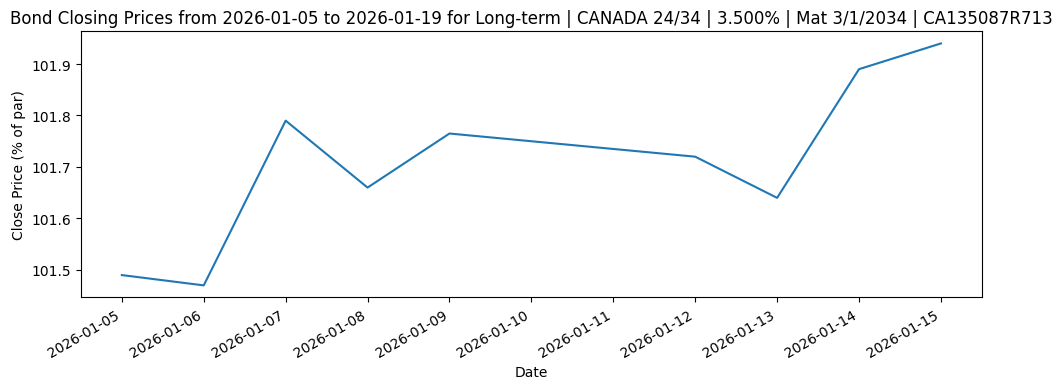

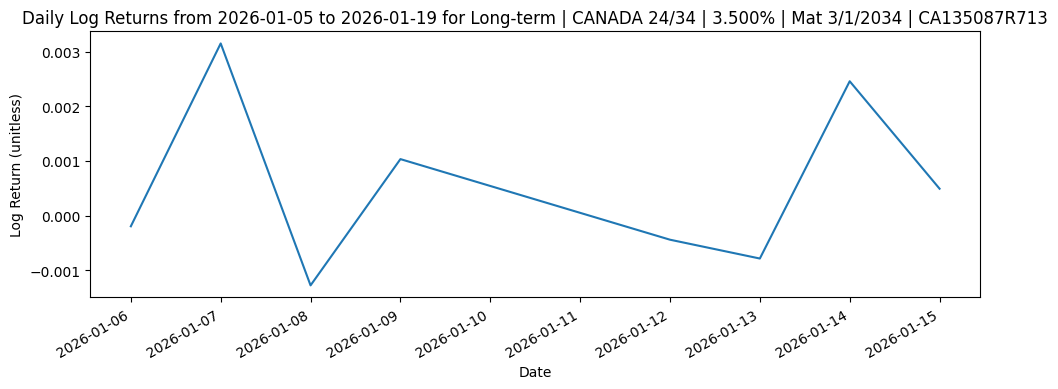


BOND: Long-term | CANADA 24/29 | 3.500% | Mat 9/1/2029 | CA135087R895


Term                                      bond_page_url  \
244  Long-term  https://markets.businessinsider.com/bonds/cana...   
245  Long-term  https://markets.businessinsider.com/bonds/cana...   
246  Long-term  https://markets.businessinsider.com/bonds/cana...   
247  Long-term  https://markets.businessinsider.com/bonds/cana...   
248  Long-term  https://markets.businessinsider.com/bonds/cana...   
249  Long-term  https://markets.businessinsider.com/bonds/cana...   
250  Long-term  https://markets.businessinsider.com/bonds/cana...   
251  Long-term  https://markets.businessinsider.com/bonds/cana...   
252  Long-term  https://markets.businessinsider.com/bonds/cana...   

                   tkData                                     chart_json_url  \
244  1,134387959,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
245  1,134387959,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
246  1,134387959,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
247  1,134387959,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
248  1,134387959,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
249  1,134387959,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
250  1,134387959,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
251  1,134387959,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
252  1,134387959,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

             ISIN          Name Country                    Issuer  \
244  CA135087R895  CANADA 24/29  Canada  Canada, Government of...   
245  CA135087R895  CANADA 24/29  Canada  Canada, Government of...   
246  CA135087R895  CANADA 24/29  Canada  Canada, Government of...   
247  CA135087R895  CANADA 24/29  Canada  Canada, Government of...   
248  CA135087R895  CANADA 24/29  Canada  Canada, Government of...   
249  CA135087R895  CANADA 24/29  Canada  Canada, Government of...   
250  CA135087R895  CANADA 24/29  Canada  Canada, Government of...   
251  CA135087R895  CANADA 24/29  Canada  Canada, Government of...   
252  CA135087R895  CANADA 24/29  Canada  Canada, Government of...   

       Issue Volume Currency  ... Special Coupon Type Maturity Date  \
244  30,000,000,000      CAD  ...                          9/1/2029   
245  30,000,000,000      CAD  ...                          9/1/2029   
246  30,000,000,000      CAD  ...                          9/1/2029   
247  30,000,000,000      CAD  ...                          9/1/2029   
248  30,000,000,000      CAD  ...                          9/1/2029   
249  30,000,000,000      CAD  ...                          9/1/2029   
250  30,000,000,000      CAD  ...                          9/1/2029   
251  30,000,000,000      CAD  ...                          9/1/2029   
252  30,000,000,000      CAD  ...                          9/1/2029   

    Coupon Payment Date Payment Frequency No. of Payments per Year  \
244            3/1/2026                                        2.0   
245            3/1/2026                                        2.0   
246            3/1/2026                                        2.0   
247            3/1/2026                                        2.0   
248            3/1/2026                                        2.0   
249            3/1/2026                                        2.0   
250            3/1/2026                                        2.0   
251            3/1/2026                                        2.0   
252            3/1/2026                                        2.0   

    Coupon Start Date Final Coupon Date Floater?        date  \
244          9/1/2024         8/31/2029       No  2026-01-05   
245          9/1/2024         8/31/2029       No  2026-01-06   
246          9/1/2024         8/31/2029       No  2026-01-07   
247          9/1/2024         8/31/2029       No  2026-01-08   
248          9/1/2024         8/31/2029       No  2026-01-09   
249          9/1/2024         8

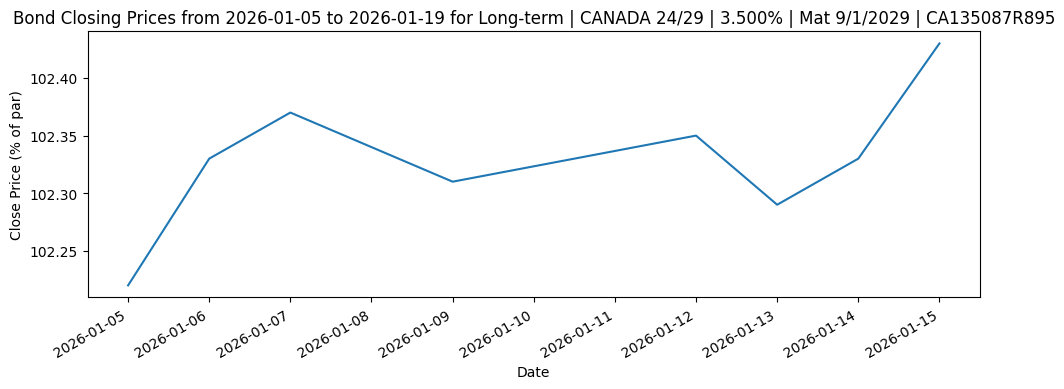

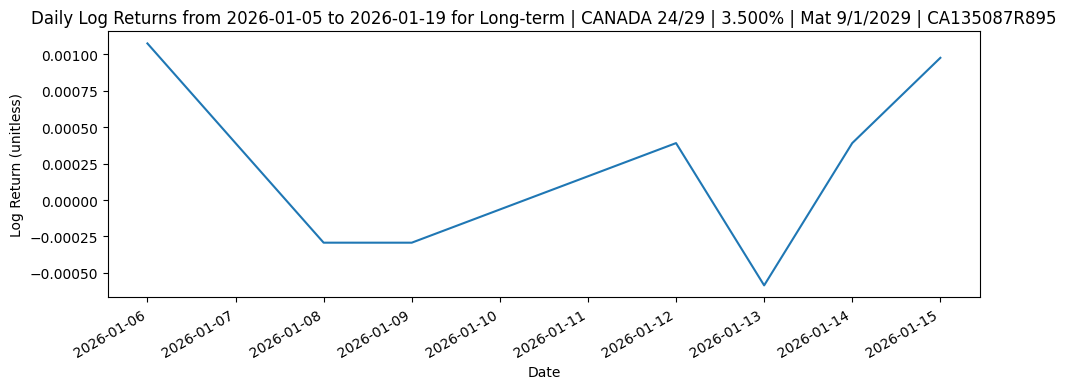


BOND: Short-term | CANADA 24/26 | 4.000% | Mat 8/3/2026 | CA135087R978


Term                                      bond_page_url  \
45  Short-term  https://markets.businessinsider.com/bonds/cana...   
46  Short-term  https://markets.businessinsider.com/bonds/cana...   
47  Short-term  https://markets.businessinsider.com/bonds/cana...   
48  Short-term  https://markets.businessinsider.com/bonds/cana...   
49  Short-term  https://markets.businessinsider.com/bonds/cana...   
50  Short-term  https://markets.businessinsider.com/bonds/cana...   
51  Short-term  https://markets.businessinsider.com/bonds/cana...   
52  Short-term  https://markets.businessinsider.com/bonds/cana...   
53  Short-term  https://markets.businessinsider.com/bonds/cana...   

                  tkData                                     chart_json_url  \
45  1,135402145,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
46  1,135402145,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
47  1,135402145,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
48  1,135402145,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
49  1,135402145,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
50  1,135402145,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
51  1,135402145,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
52  1,135402145,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
53  1,135402145,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

            ISIN          Name Country                    Issuer  \
45  CA135087R978  CANADA 24/26  Canada  Canada, Government of...   
46  CA135087R978  CANADA 24/26  Canada  Canada, Government of...   
47  CA135087R978  CANADA 24/26  Canada  Canada, Government of...   
48  CA135087R978  CANADA 24/26  Canada  Canada, Government of...   
49  CA135087R978  CANADA 24/26  Canada  Canada, Government of...   
50  CA135087R978  CANADA 24/26  Canada  Canada, Government of...   
51  CA135087R978  CANADA 24/26  Canada  Canada, Government of...   
52  CA135087R978  CANADA 24/26  Canada  Canada, Government of...   
53  CA135087R978  CANADA 24/26  Canada  Canada, Government of...   

      Issue Volume Currency  ... Special Coupon Type Maturity Date  \
45  22,000,000,000      CAD  ...                          8/3/2026   
46  22,000,000,000      CAD  ...                          8/3/2026   
47  22,000,000,000      CAD  ...                          8/3/2026   
48  22,000,000,000      CAD  ...                          8/3/2026   
49  22,000,000,000      CAD  ...                          8/3/2026   
50  22,000,000,000      CAD  ...                          8/3/2026   
51  22,000,000,000      CAD  ...                          8/3/2026   
52  22,000,000,000      CAD  ...                          8/3/2026   
53  22,000,000,000      CAD  ...                          8/3/2026   

   Coupon Payment Date Payment Frequency No. of Payments per Year  \
45            2/1/2026                                        2.0   
46            2/1/2026                                        2.0   
47            2/1/2026                                        2.0   
48            2/1/2026                                        2.0   
49            2/1/2026                                        2.0   
50            2/1/2026                                        2.0   
51            2/1/2026                                        2.0   
52            2/1/2026                                        2.0   
53            2/1/2026                                        2.0   

   Coupon Start Date Final Coupon Date Floater?        date  \
45          8/1/2024          8/2/2026       No  2026-01-05   
46          8/1/2024          8/2/2026       No  2026-01-06   
47          8/1/2024          8/2/2026       No  2026-01-07   
48          8/1/2024          8/2/2026       No  2026-01-08   
49          8/1/2024          8/2/2026       No  2026-01-09   
50          8/1/2024          8/2/2026       No  2026-01-12   
51          8/

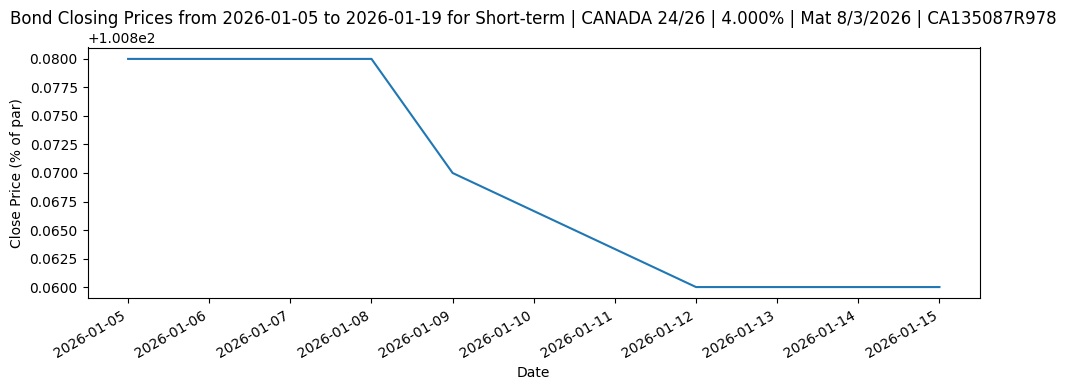

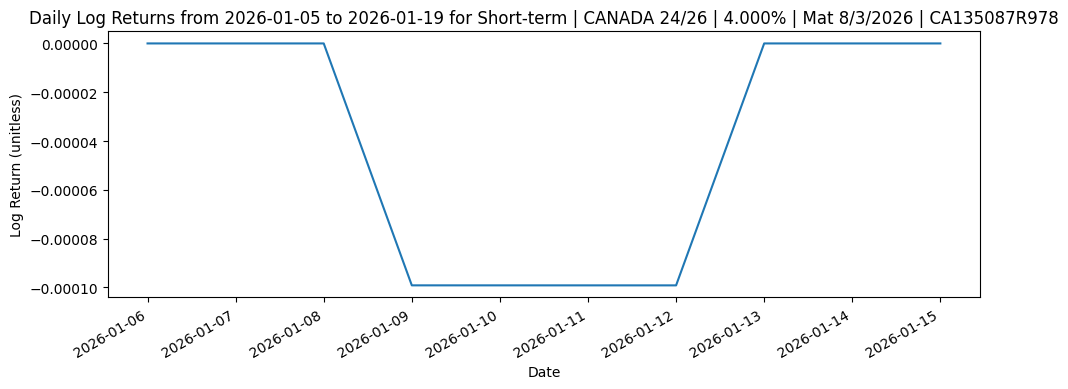


BOND: Long-term | CANADA 24/34 | 3.250% | Mat 12/1/2034 | CA135087S216


Term                                      bond_page_url  \
353  Long-term  https://markets.businessinsider.com/bonds/cana...   
354  Long-term  https://markets.businessinsider.com/bonds/cana...   
355  Long-term  https://markets.businessinsider.com/bonds/cana...   
356  Long-term  https://markets.businessinsider.com/bonds/cana...   
357  Long-term  https://markets.businessinsider.com/bonds/cana...   
358  Long-term  https://markets.businessinsider.com/bonds/cana...   
359  Long-term  https://markets.businessinsider.com/bonds/cana...   
360  Long-term  https://markets.businessinsider.com/bonds/cana...   
361  Long-term  https://markets.businessinsider.com/bonds/cana...   

                   tkData                                     chart_json_url  \
353  1,136888775,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
354  1,136888775,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
355  1,136888775,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
356  1,136888775,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
357  1,136888775,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
358  1,136888775,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
359  1,136888775,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
360  1,136888775,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
361  1,136888775,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

             ISIN          Name Country                    Issuer  \
353  CA135087S216  CANADA 24/34  Canada  Canada, Government of...   
354  CA135087S216  CANADA 24/34  Canada  Canada, Government of...   
355  CA135087S216  CANADA 24/34  Canada  Canada, Government of...   
356  CA135087S216  CANADA 24/34  Canada  Canada, Government of...   
357  CA135087S216  CANADA 24/34  Canada  Canada, Government of...   
358  CA135087S216  CANADA 24/34  Canada  Canada, Government of...   
359  CA135087S216  CANADA 24/34  Canada  Canada, Government of...   
360  CA135087S216  CANADA 24/34  Canada  Canada, Government of...   
361  CA135087S216  CANADA 24/34  Canada  Canada, Government of...   

       Issue Volume Currency  ... Special Coupon Type Maturity Date  \
353  30,000,000,000      CAD  ...                         12/1/2034   
354  30,000,000,000      CAD  ...                         12/1/2034   
355  30,000,000,000      CAD  ...                         12/1/2034   
356  30,000,000,000      CAD  ...                         12/1/2034   
357  30,000,000,000      CAD  ...                         12/1/2034   
358  30,000,000,000      CAD  ...                         12/1/2034   
359  30,000,000,000      CAD  ...                         12/1/2034   
360  30,000,000,000      CAD  ...                         12/1/2034   
361  30,000,000,000      CAD  ...                         12/1/2034   

    Coupon Payment Date Payment Frequency No. of Payments per Year  \
353            6/1/2026                                        2.0   
354            6/1/2026                                        2.0   
355            6/1/2026                                        2.0   
356            6/1/2026                                        2.0   
357            6/1/2026                                        2.0   
358            6/1/2026                                        2.0   
359            6/1/2026                                        2.0   
360            6/1/2026                                        2.0   
361            6/1/2026                                        2.0   

    Coupon Start Date Final Coupon Date Floater?        date  \
353         12/1/2024        11/30/2034       No  2026-01-05   
354         12/1/2024        11/30/2034       No  2026-01-06   
355         12/1/2024        11/30/2034       No  2026-01-07   
356         12/1/2024        11/30/2034       No  2026-01-08   
357         12/1/2024        11/30/2034       No  2026-01-09   
358         12/1/2024        11

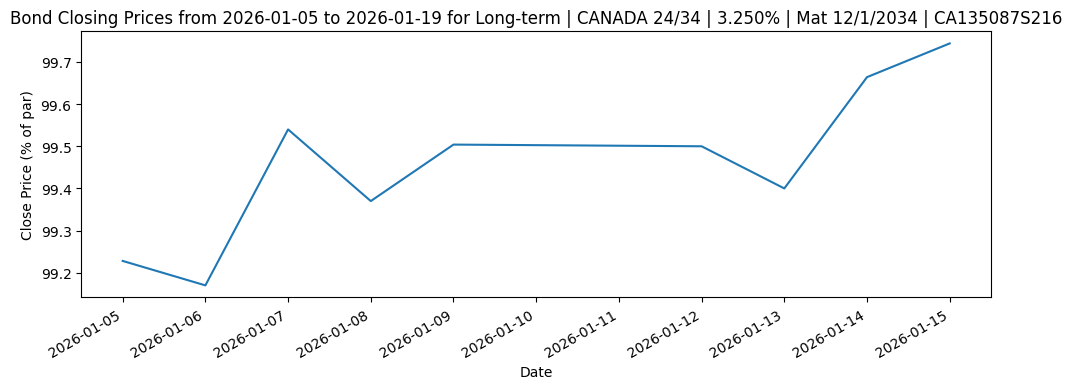

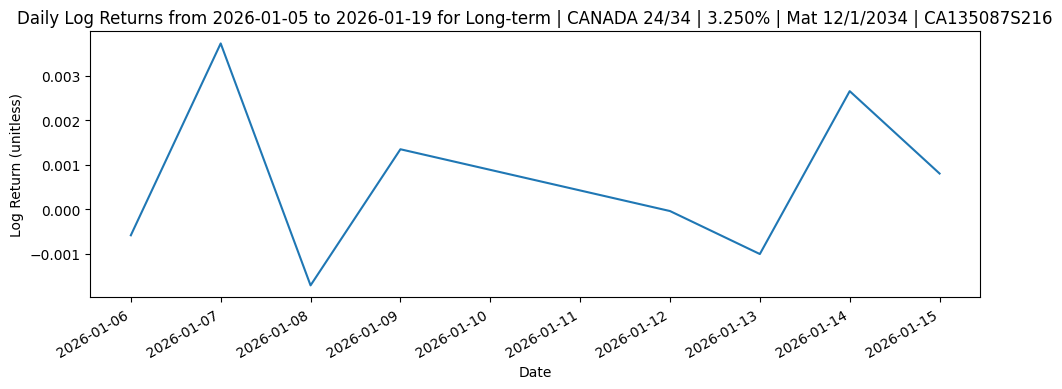


BOND: Short-term | CANADA 24/26 | 3.250% | Mat 11/1/2026 | CA135087S398


Term                                      bond_page_url  \
63  Short-term  https://markets.businessinsider.com/bonds/cana...   
64  Short-term  https://markets.businessinsider.com/bonds/cana...   
65  Short-term  https://markets.businessinsider.com/bonds/cana...   
66  Short-term  https://markets.businessinsider.com/bonds/cana...   
67  Short-term  https://markets.businessinsider.com/bonds/cana...   
68  Short-term  https://markets.businessinsider.com/bonds/cana...   
69  Short-term  https://markets.businessinsider.com/bonds/cana...   
70  Short-term  https://markets.businessinsider.com/bonds/cana...   
71  Short-term  https://markets.businessinsider.com/bonds/cana...   

                  tkData                                     chart_json_url  \
63  1,137893857,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
64  1,137893857,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
65  1,137893857,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
66  1,137893857,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
67  1,137893857,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
68  1,137893857,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
69  1,137893857,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
70  1,137893857,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
71  1,137893857,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

            ISIN          Name Country                    Issuer  \
63  CA135087S398  CANADA 24/26  Canada  Canada, Government of...   
64  CA135087S398  CANADA 24/26  Canada  Canada, Government of...   
65  CA135087S398  CANADA 24/26  Canada  Canada, Government of...   
66  CA135087S398  CANADA 24/26  Canada  Canada, Government of...   
67  CA135087S398  CANADA 24/26  Canada  Canada, Government of...   
68  CA135087S398  CANADA 24/26  Canada  Canada, Government of...   
69  CA135087S398  CANADA 24/26  Canada  Canada, Government of...   
70  CA135087S398  CANADA 24/26  Canada  Canada, Government of...   
71  CA135087S398  CANADA 24/26  Canada  Canada, Government of...   

      Issue Volume Currency  ... Special Coupon Type Maturity Date  \
63  21,500,000,000      CAD  ...                         11/1/2026   
64  21,500,000,000      CAD  ...                         11/1/2026   
65  21,500,000,000      CAD  ...                         11/1/2026   
66  21,500,000,000      CAD  ...                         11/1/2026   
67  21,500,000,000      CAD  ...                         11/1/2026   
68  21,500,000,000      CAD  ...                         11/1/2026   
69  21,500,000,000      CAD  ...                         11/1/2026   
70  21,500,000,000      CAD  ...                         11/1/2026   
71  21,500,000,000      CAD  ...                         11/1/2026   

   Coupon Payment Date Payment Frequency No. of Payments per Year  \
63            5/1/2026                                        2.0   
64            5/1/2026                                        2.0   
65            5/1/2026                                        2.0   
66            5/1/2026                                        2.0   
67            5/1/2026                                        2.0   
68            5/1/2026                                        2.0   
69            5/1/2026                                        2.0   
70            5/1/2026                                        2.0   
71            5/1/2026                                        2.0   

   Coupon Start Date Final Coupon Date Floater?        date  \
63         11/1/2024        10/31/2026       No  2026-01-05   
64         11/1/2024        10/31/2026       No  2026-01-06   
65         11/1/2024        10/31/2026       No  2026-01-07   
66         11/1/2024        10/31/2026       No  2026-01-08   
67         11/1/2024        10/31/2026       No  2026-01-09   
68         11/1/2024        10/31/2026       No  2026-01-12   
69         11/

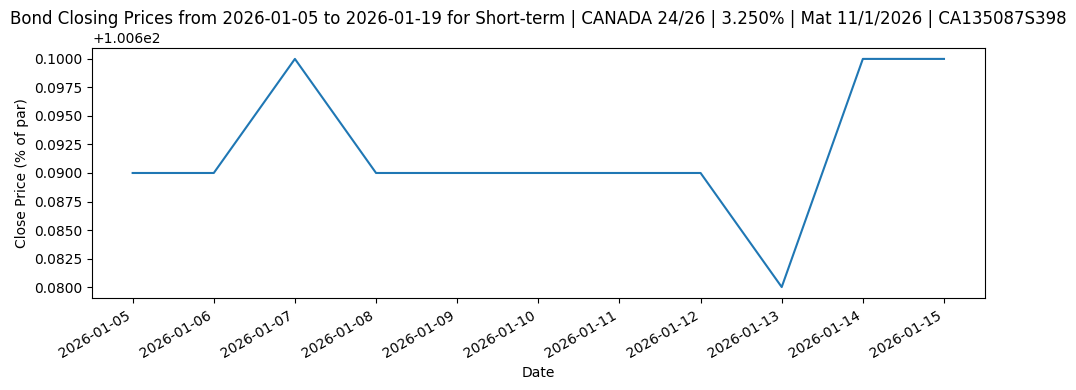

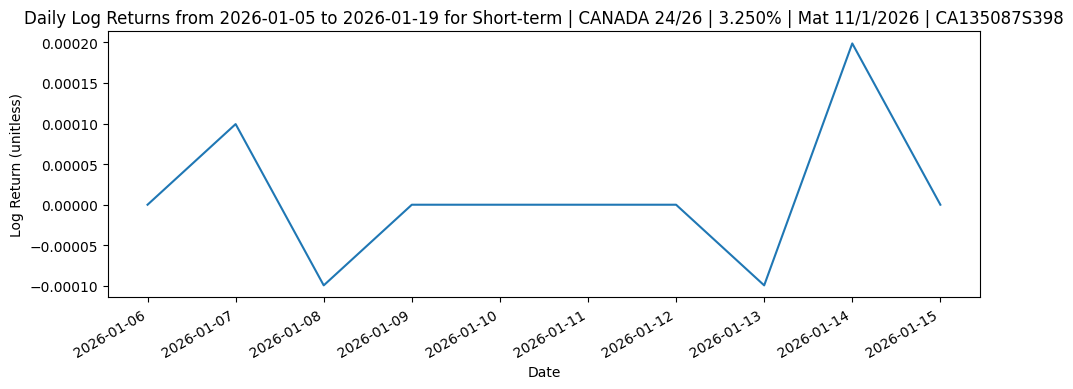


BOND: Long-term | CANADA 24/30 | 2.750% | Mat 3/1/2030 | CA135087S471


Term                                      bond_page_url  \
235  Long-term  https://markets.businessinsider.com/bonds/cana...   
236  Long-term  https://markets.businessinsider.com/bonds/cana...   
237  Long-term  https://markets.businessinsider.com/bonds/cana...   
238  Long-term  https://markets.businessinsider.com/bonds/cana...   
239  Long-term  https://markets.businessinsider.com/bonds/cana...   
240  Long-term  https://markets.businessinsider.com/bonds/cana...   
241  Long-term  https://markets.businessinsider.com/bonds/cana...   
242  Long-term  https://markets.businessinsider.com/bonds/cana...   
243  Long-term  https://markets.businessinsider.com/bonds/cana...   

                   tkData                                     chart_json_url  \
235  1,138913105,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
236  1,138913105,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
237  1,138913105,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
238  1,138913105,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
239  1,138913105,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
240  1,138913105,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
241  1,138913105,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
242  1,138913105,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
243  1,138913105,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

             ISIN          Name Country                    Issuer  \
235  CA135087S471  CANADA 24/30  Canada  Canada, Government of...   
236  CA135087S471  CANADA 24/30  Canada  Canada, Government of...   
237  CA135087S471  CANADA 24/30  Canada  Canada, Government of...   
238  CA135087S471  CANADA 24/30  Canada  Canada, Government of...   
239  CA135087S471  CANADA 24/30  Canada  Canada, Government of...   
240  CA135087S471  CANADA 24/30  Canada  Canada, Government of...   
241  CA135087S471  CANADA 24/30  Canada  Canada, Government of...   
242  CA135087S471  CANADA 24/30  Canada  Canada, Government of...   
243  CA135087S471  CANADA 24/30  Canada  Canada, Government of...   

       Issue Volume Currency  ... Special Coupon Type Maturity Date  \
235  33,000,000,000      CAD  ...                          3/1/2030   
236  33,000,000,000      CAD  ...                          3/1/2030   
237  33,000,000,000      CAD  ...                          3/1/2030   
238  33,000,000,000      CAD  ...                          3/1/2030   
239  33,000,000,000      CAD  ...                          3/1/2030   
240  33,000,000,000      CAD  ...                          3/1/2030   
241  33,000,000,000      CAD  ...                          3/1/2030   
242  33,000,000,000      CAD  ...                          3/1/2030   
243  33,000,000,000      CAD  ...                          3/1/2030   

    Coupon Payment Date Payment Frequency No. of Payments per Year  \
235            3/1/2026                                        2.0   
236            3/1/2026                                        2.0   
237            3/1/2026                                        2.0   
238            3/1/2026                                        2.0   
239            3/1/2026                                        2.0   
240            3/1/2026                                        2.0   
241            3/1/2026                                        2.0   
242            3/1/2026                                        2.0   
243            3/1/2026                                        2.0   

    Coupon Start Date Final Coupon Date Floater?        date  \
235          3/1/2025         2/28/2030       No  2026-01-05   
236          3/1/2025         2/28/2030       No  2026-01-06   
237          3/1/2025         2/28/2030       No  2026-01-07   
238          3/1/2025         2/28/2030       No  2026-01-08   
239          3/1/2025         2/28/2030       No  2026-01-09   
240          3/1/2025         2

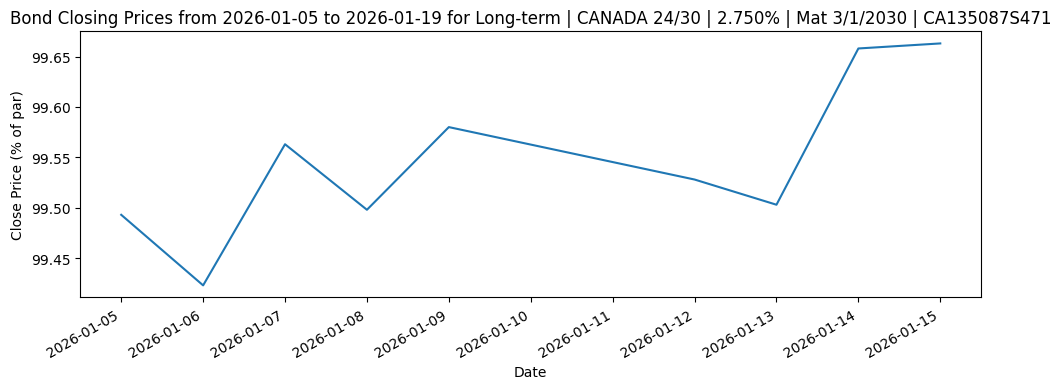

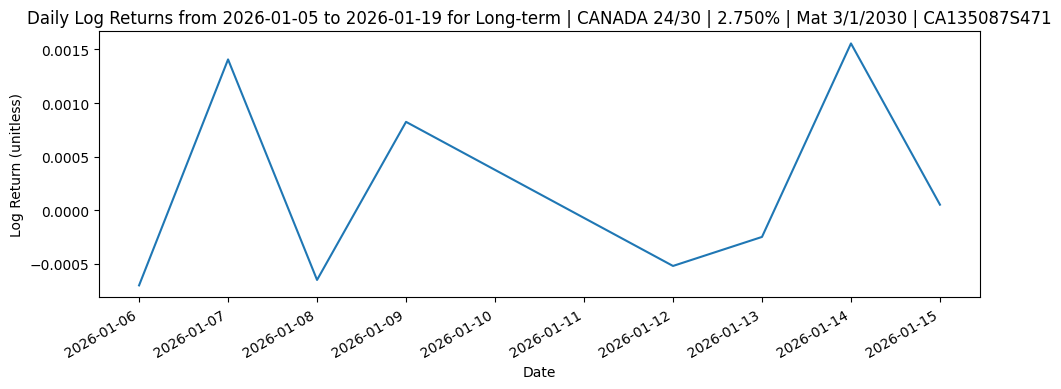


BOND: Short-term | CANADA 24/27 | 3.000% | Mat 2/1/2027 | CA135087S547


Term                                      bond_page_url  \
72  Short-term  https://markets.businessinsider.com/bonds/cana...   
73  Short-term  https://markets.businessinsider.com/bonds/cana...   
74  Short-term  https://markets.businessinsider.com/bonds/cana...   
75  Short-term  https://markets.businessinsider.com/bonds/cana...   
76  Short-term  https://markets.businessinsider.com/bonds/cana...   
77  Short-term  https://markets.businessinsider.com/bonds/cana...   
78  Short-term  https://markets.businessinsider.com/bonds/cana...   
79  Short-term  https://markets.businessinsider.com/bonds/cana...   
80  Short-term  https://markets.businessinsider.com/bonds/cana...   

                  tkData                                     chart_json_url  \
72  1,139591564,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
73  1,139591564,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
74  1,139591564,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
75  1,139591564,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
76  1,139591564,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
77  1,139591564,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
78  1,139591564,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
79  1,139591564,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
80  1,139591564,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

            ISIN          Name Country                    Issuer  \
72  CA135087S547  CANADA 24/27  Canada  Canada, Government of...   
73  CA135087S547  CANADA 24/27  Canada  Canada, Government of...   
74  CA135087S547  CANADA 24/27  Canada  Canada, Government of...   
75  CA135087S547  CANADA 24/27  Canada  Canada, Government of...   
76  CA135087S547  CANADA 24/27  Canada  Canada, Government of...   
77  CA135087S547  CANADA 24/27  Canada  Canada, Government of...   
78  CA135087S547  CANADA 24/27  Canada  Canada, Government of...   
79  CA135087S547  CANADA 24/27  Canada  Canada, Government of...   
80  CA135087S547  CANADA 24/27  Canada  Canada, Government of...   

      Issue Volume Currency  ... Special Coupon Type Maturity Date  \
72  27,500,000,000      CAD  ...                          2/1/2027   
73  27,500,000,000      CAD  ...                          2/1/2027   
74  27,500,000,000      CAD  ...                          2/1/2027   
75  27,500,000,000      CAD  ...                          2/1/2027   
76  27,500,000,000      CAD  ...                          2/1/2027   
77  27,500,000,000      CAD  ...                          2/1/2027   
78  27,500,000,000      CAD  ...                          2/1/2027   
79  27,500,000,000      CAD  ...                          2/1/2027   
80  27,500,000,000      CAD  ...                          2/1/2027   

   Coupon Payment Date Payment Frequency No. of Payments per Year  \
72            2/1/2026                                        2.0   
73            2/1/2026                                        2.0   
74            2/1/2026                                        2.0   
75            2/1/2026                                        2.0   
76            2/1/2026                                        2.0   
77            2/1/2026                                        2.0   
78            2/1/2026                                        2.0   
79            2/1/2026                                        2.0   
80            2/1/2026                                        2.0   

   Coupon Start Date Final Coupon Date Floater?        date  \
72          2/1/2025         1/31/2027       No  2026-01-05   
73          2/1/2025         1/31/2027       No  2026-01-06   
74          2/1/2025         1/31/2027       No  2026-01-07   
75          2/1/2025         1/31/2027       No  2026-01-08   
76          2/1/2025         1/31/2027       No  2026-01-09   
77          2/1/2025         1/31/2027       No  2026-01-12   
78          2/

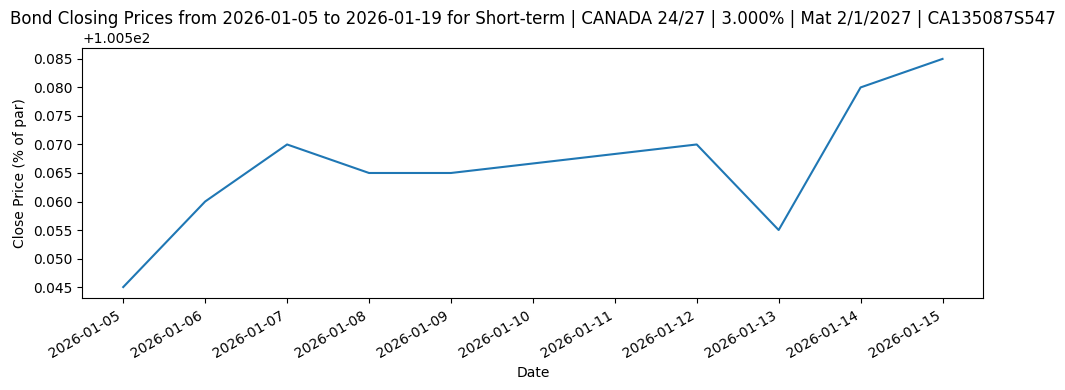

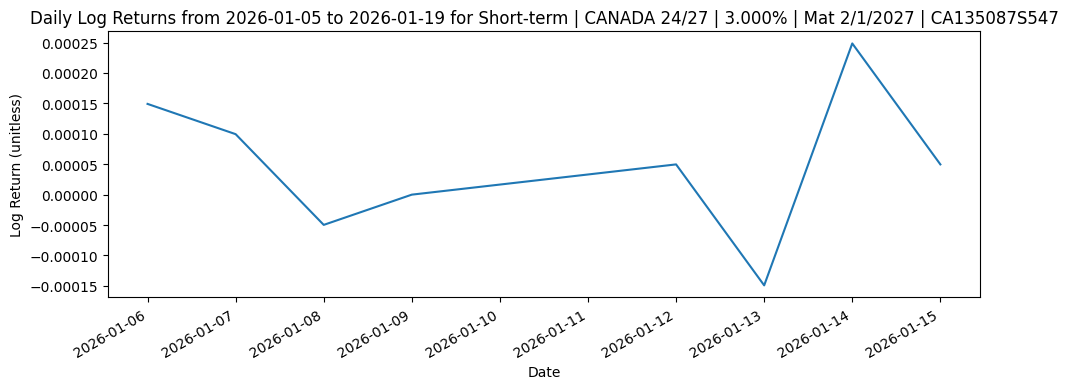


BOND: Long-term | CANADA 25/35 | 3.250% | Mat 6/1/2035 | CA135087S620


Term                                      bond_page_url  \
362  Long-term  https://markets.businessinsider.com/bonds/cana...   
363  Long-term  https://markets.businessinsider.com/bonds/cana...   
364  Long-term  https://markets.businessinsider.com/bonds/cana...   
365  Long-term  https://markets.businessinsider.com/bonds/cana...   
366  Long-term  https://markets.businessinsider.com/bonds/cana...   
367  Long-term  https://markets.businessinsider.com/bonds/cana...   
368  Long-term  https://markets.businessinsider.com/bonds/cana...   
369  Long-term  https://markets.businessinsider.com/bonds/cana...   
370  Long-term  https://markets.businessinsider.com/bonds/cana...   

                   tkData                                     chart_json_url  \
362  1,141608780,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
363  1,141608780,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
364  1,141608780,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
365  1,141608780,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
366  1,141608780,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
367  1,141608780,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
368  1,141608780,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
369  1,141608780,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
370  1,141608780,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

             ISIN          Name Country                    Issuer  \
362  CA135087S620  CANADA 25/35  Canada  Canada, Government of...   
363  CA135087S620  CANADA 25/35  Canada  Canada, Government of...   
364  CA135087S620  CANADA 25/35  Canada  Canada, Government of...   
365  CA135087S620  CANADA 25/35  Canada  Canada, Government of...   
366  CA135087S620  CANADA 25/35  Canada  Canada, Government of...   
367  CA135087S620  CANADA 25/35  Canada  Canada, Government of...   
368  CA135087S620  CANADA 25/35  Canada  Canada, Government of...   
369  CA135087S620  CANADA 25/35  Canada  Canada, Government of...   
370  CA135087S620  CANADA 25/35  Canada  Canada, Government of...   

       Issue Volume Currency  ... Special Coupon Type Maturity Date  \
362  39,000,000,000      CAD  ...                          6/1/2035   
363  39,000,000,000      CAD  ...                          6/1/2035   
364  39,000,000,000      CAD  ...                          6/1/2035   
365  39,000,000,000      CAD  ...                          6/1/2035   
366  39,000,000,000      CAD  ...                          6/1/2035   
367  39,000,000,000      CAD  ...                          6/1/2035   
368  39,000,000,000      CAD  ...                          6/1/2035   
369  39,000,000,000      CAD  ...                          6/1/2035   
370  39,000,000,000      CAD  ...                          6/1/2035   

    Coupon Payment Date Payment Frequency No. of Payments per Year  \
362            6/1/2026                                        2.0   
363            6/1/2026                                        2.0   
364            6/1/2026                                        2.0   
365            6/1/2026                                        2.0   
366            6/1/2026                                        2.0   
367            6/1/2026                                        2.0   
368            6/1/2026                                        2.0   
369            6/1/2026                                        2.0   
370            6/1/2026                                        2.0   

    Coupon Start Date Final Coupon Date Floater?        date  \
362          6/1/2025         5/31/2035       No  2026-01-05   
363          6/1/2025         5/31/2035       No  2026-01-06   
364          6/1/2025         5/31/2035       No  2026-01-07   
365          6/1/2025         5/31/2035       No  2026-01-08   
366          6/1/2025         5/31/2035       No  2026-01-09   
367          6/1/2025         5

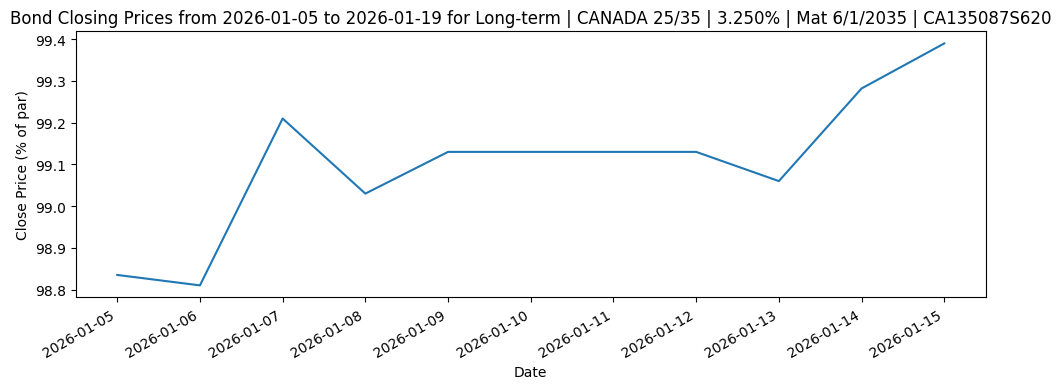

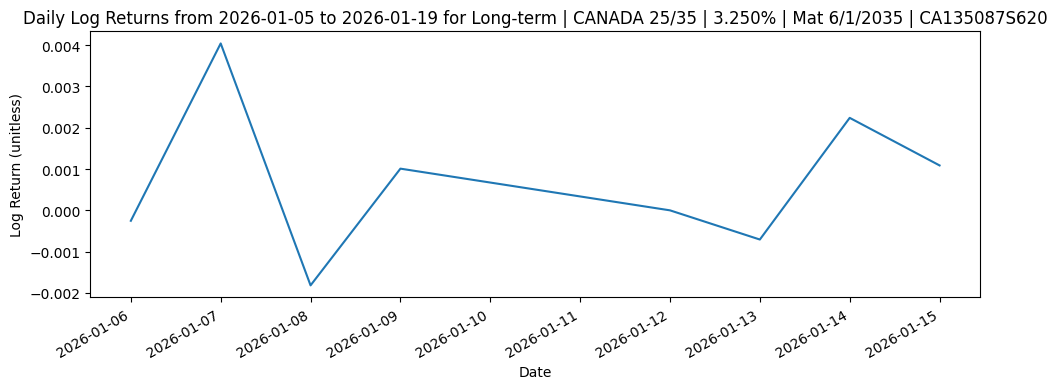


BOND: Short-term | CANADA 25/27 | 2.750% | Mat 5/1/2027 | CA135087S885


Term                                      bond_page_url  \
90  Short-term  https://markets.businessinsider.com/bonds/cana...   
91  Short-term  https://markets.businessinsider.com/bonds/cana...   
92  Short-term  https://markets.businessinsider.com/bonds/cana...   
93  Short-term  https://markets.businessinsider.com/bonds/cana...   
94  Short-term  https://markets.businessinsider.com/bonds/cana...   
95  Short-term  https://markets.businessinsider.com/bonds/cana...   
96  Short-term  https://markets.businessinsider.com/bonds/cana...   
97  Short-term  https://markets.businessinsider.com/bonds/cana...   
98  Short-term  https://markets.businessinsider.com/bonds/cana...   

                  tkData                                     chart_json_url  \
90  1,142700048,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
91  1,142700048,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
92  1,142700048,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
93  1,142700048,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
94  1,142700048,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
95  1,142700048,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
96  1,142700048,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
97  1,142700048,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
98  1,142700048,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

            ISIN          Name Country                    Issuer  \
90  CA135087S885  CANADA 25/27  Canada  Canada, Government of...   
91  CA135087S885  CANADA 25/27  Canada  Canada, Government of...   
92  CA135087S885  CANADA 25/27  Canada  Canada, Government of...   
93  CA135087S885  CANADA 25/27  Canada  Canada, Government of...   
94  CA135087S885  CANADA 25/27  Canada  Canada, Government of...   
95  CA135087S885  CANADA 25/27  Canada  Canada, Government of...   
96  CA135087S885  CANADA 25/27  Canada  Canada, Government of...   
97  CA135087S885  CANADA 25/27  Canada  Canada, Government of...   
98  CA135087S885  CANADA 25/27  Canada  Canada, Government of...   

      Issue Volume Currency  ... Special Coupon Type Maturity Date  \
90  28,500,000,000      CAD  ...                          5/1/2027   
91  28,500,000,000      CAD  ...                          5/1/2027   
92  28,500,000,000      CAD  ...                          5/1/2027   
93  28,500,000,000      CAD  ...                          5/1/2027   
94  28,500,000,000      CAD  ...                          5/1/2027   
95  28,500,000,000      CAD  ...                          5/1/2027   
96  28,500,000,000      CAD  ...                          5/1/2027   
97  28,500,000,000      CAD  ...                          5/1/2027   
98  28,500,000,000      CAD  ...                          5/1/2027   

   Coupon Payment Date Payment Frequency No. of Payments per Year  \
90            5/1/2026                                        2.0   
91            5/1/2026                                        2.0   
92            5/1/2026                                        2.0   
93            5/1/2026                                        2.0   
94            5/1/2026                                        2.0   
95            5/1/2026                                        2.0   
96            5/1/2026                                        2.0   
97            5/1/2026                                        2.0   
98            5/1/2026                                        2.0   

   Coupon Start Date Final Coupon Date Floater?        date  \
90          5/1/2025         4/30/2027       No  2026-01-05   
91          5/1/2025         4/30/2027       No  2026-01-06   
92          5/1/2025         4/30/2027       No  2026-01-07   
93          5/1/2025         4/30/2027       No  2026-01-08   
94          5/1/2025         4/30/2027       No  2026-01-09   
95          5/1/2025         4/30/2027       No  2026-01-12   
96          5/

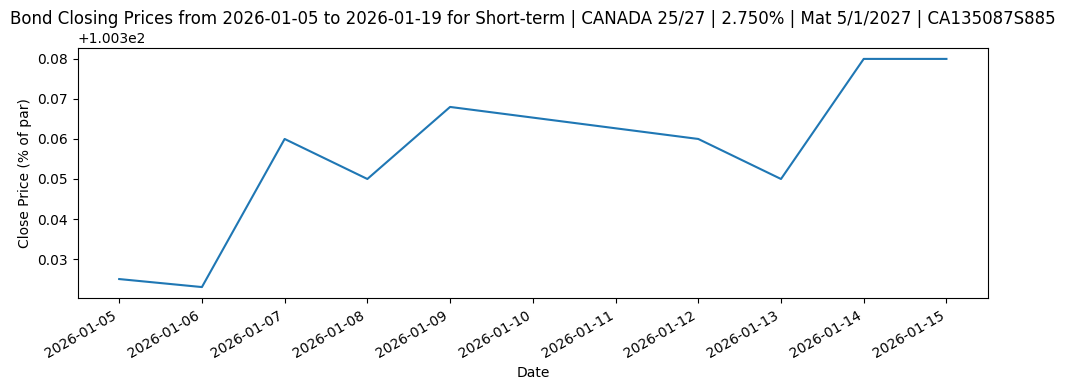

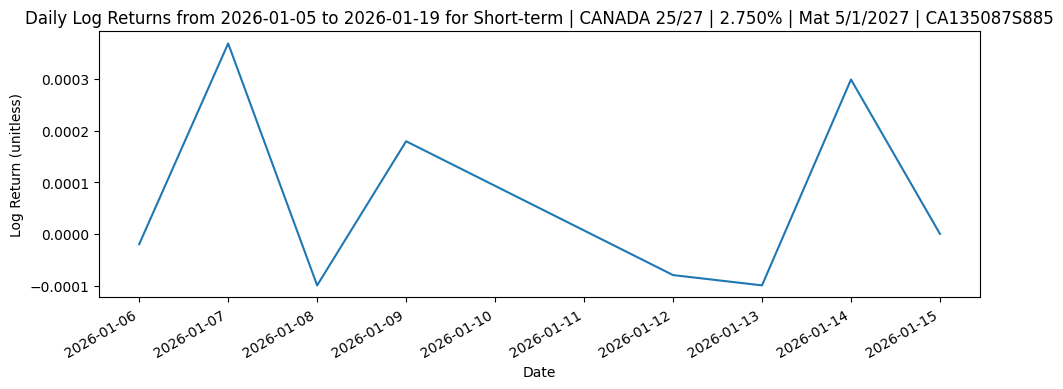


BOND: Long-term | CANADA 25/32 | 3.000% | Mat 3/1/2032 | CA135087S968


Term                                      bond_page_url  \
190  Long-term  https://markets.businessinsider.com/bonds/cana...   
191  Long-term  https://markets.businessinsider.com/bonds/cana...   
192  Long-term  https://markets.businessinsider.com/bonds/cana...   
193  Long-term  https://markets.businessinsider.com/bonds/cana...   
194  Long-term  https://markets.businessinsider.com/bonds/cana...   
195  Long-term  https://markets.businessinsider.com/bonds/cana...   
196  Long-term  https://markets.businessinsider.com/bonds/cana...   
197  Long-term  https://markets.businessinsider.com/bonds/cana...   
198  Long-term  https://markets.businessinsider.com/bonds/cana...   

                   tkData                                     chart_json_url  \
190  1,142567197,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
191  1,142567197,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
192  1,142567197,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
193  1,142567197,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
194  1,142567197,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
195  1,142567197,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
196  1,142567197,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
197  1,142567197,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
198  1,142567197,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

             ISIN          Name Country                    Issuer  \
190  CA135087S968  CANADA 25/32  Canada  Canada, Government of...   
191  CA135087S968  CANADA 25/32  Canada  Canada, Government of...   
192  CA135087S968  CANADA 25/32  Canada  Canada, Government of...   
193  CA135087S968  CANADA 25/32  Canada  Canada, Government of...   
194  CA135087S968  CANADA 25/32  Canada  Canada, Government of...   
195  CA135087S968  CANADA 25/32  Canada  Canada, Government of...   
196  CA135087S968  CANADA 25/32  Canada  Canada, Government of...   
197  CA135087S968  CANADA 25/32  Canada  Canada, Government of...   
198  CA135087S968  CANADA 25/32  Canada  Canada, Government of...   

      Issue Volume Currency  ... Special Coupon Type Maturity Date  \
190  3,500,000,000      CAD  ...                          3/1/2032   
191  3,500,000,000      CAD  ...                          3/1/2032   
192  3,500,000,000      CAD  ...                          3/1/2032   
193  3,500,000,000      CAD  ...                          3/1/2032   
194  3,500,000,000      CAD  ...                          3/1/2032   
195  3,500,000,000      CAD  ...                          3/1/2032   
196  3,500,000,000      CAD  ...                          3/1/2032   
197  3,500,000,000      CAD  ...                          3/1/2032   
198  3,500,000,000      CAD  ...                          3/1/2032   

    Coupon Payment Date Payment Frequency No. of Payments per Year  \
190            3/1/2026                                        2.0   
191            3/1/2026                                        2.0   
192            3/1/2026                                        2.0   
193            3/1/2026                                        2.0   
194            3/1/2026                                        2.0   
195            3/1/2026                                        2.0   
196            3/1/2026                                        2.0   
197            3/1/2026                                        2.0   
198            3/1/2026                                        2.0   

    Coupon Start Date Final Coupon Date Floater?        date  \
190          3/1/2025         2/28/2032       No  2026-01-05   
191          3/1/2025         2/28/2032       No  2026-01-06   
192          3/1/2025         2/28/2032       No  2026-01-07   
193          3/1/2025         2/28/2032       No  2026-01-08   
194          3/1/2025         2/28/2032       No  2026-01-09   
195          3/1/2025         2/28/2032  

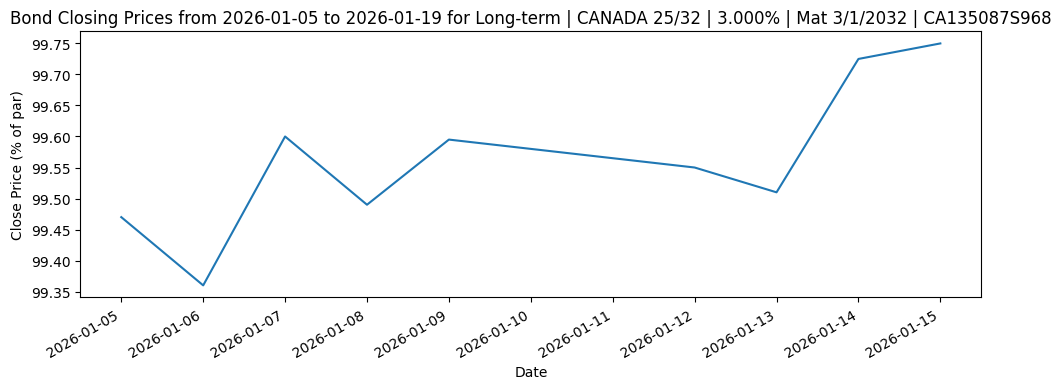

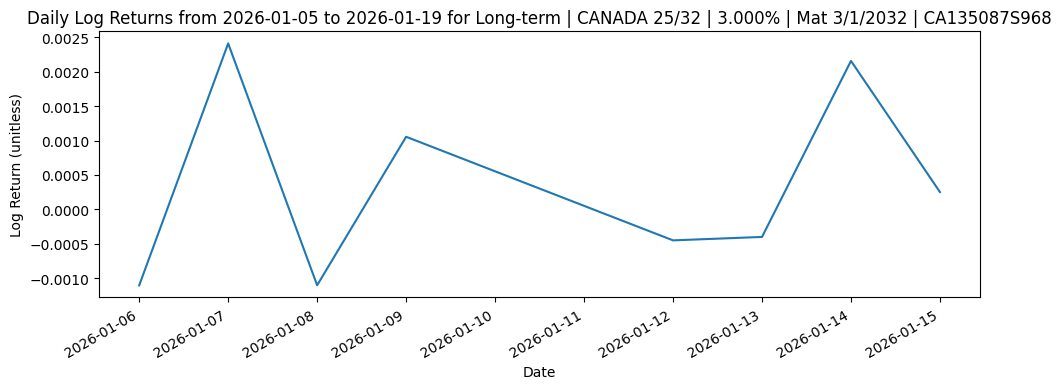


BOND: Long-term | CANADA 25/30 | 2.750% | Mat 9/1/2030 | CA135087T388


Term                                      bond_page_url  \
290  Long-term  https://markets.businessinsider.com/bonds/cana...   
291  Long-term  https://markets.businessinsider.com/bonds/cana...   
292  Long-term  https://markets.businessinsider.com/bonds/cana...   
293  Long-term  https://markets.businessinsider.com/bonds/cana...   
294  Long-term  https://markets.businessinsider.com/bonds/cana...   
295  Long-term  https://markets.businessinsider.com/bonds/cana...   
296  Long-term  https://markets.businessinsider.com/bonds/cana...   
297  Long-term  https://markets.businessinsider.com/bonds/cana...   
298  Long-term  https://markets.businessinsider.com/bonds/cana...   

                   tkData                                     chart_json_url  \
290  1,144389623,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
291  1,144389623,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
292  1,144389623,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
293  1,144389623,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
294  1,144389623,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
295  1,144389623,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
296  1,144389623,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
297  1,144389623,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
298  1,144389623,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

             ISIN          Name Country                    Issuer  \
290  CA135087T388  CANADA 25/30  Canada  Canada, Government of...   
291  CA135087T388  CANADA 25/30  Canada  Canada, Government of...   
292  CA135087T388  CANADA 25/30  Canada  Canada, Government of...   
293  CA135087T388  CANADA 25/30  Canada  Canada, Government of...   
294  CA135087T388  CANADA 25/30  Canada  Canada, Government of...   
295  CA135087T388  CANADA 25/30  Canada  Canada, Government of...   
296  CA135087T388  CANADA 25/30  Canada  Canada, Government of...   
297  CA135087T388  CANADA 25/30  Canada  Canada, Government of...   
298  CA135087T388  CANADA 25/30  Canada  Canada, Government of...   

       Issue Volume Currency  ... Special Coupon Type Maturity Date  \
290  42,000,000,000      CAD  ...                          9/1/2030   
291  42,000,000,000      CAD  ...                          9/1/2030   
292  42,000,000,000      CAD  ...                          9/1/2030   
293  42,000,000,000      CAD  ...                          9/1/2030   
294  42,000,000,000      CAD  ...                          9/1/2030   
295  42,000,000,000      CAD  ...                          9/1/2030   
296  42,000,000,000      CAD  ...                          9/1/2030   
297  42,000,000,000      CAD  ...                          9/1/2030   
298  42,000,000,000      CAD  ...                          9/1/2030   

    Coupon Payment Date Payment Frequency No. of Payments per Year  \
290            3/1/2026                                        2.0   
291            3/1/2026                                        2.0   
292            3/1/2026                                        2.0   
293            3/1/2026                                        2.0   
294            3/1/2026                                        2.0   
295            3/1/2026                                        2.0   
296            3/1/2026                                        2.0   
297            3/1/2026                                        2.0   
298            3/1/2026                                        2.0   

    Coupon Start Date Final Coupon Date Floater?        date  \
290          9/1/2025         8/31/2030       No  2026-01-05   
291          9/1/2025         8/31/2030       No  2026-01-06   
292          9/1/2025         8/31/2030       No  2026-01-07   
293          9/1/2025         8/31/2030       No  2026-01-08   
294          9/1/2025         8/31/2030       No  2026-01-09   
295          9/1/2025         8

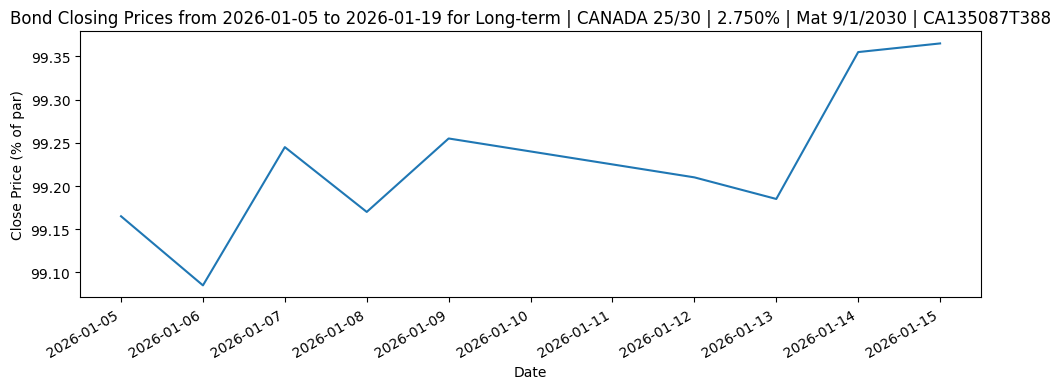

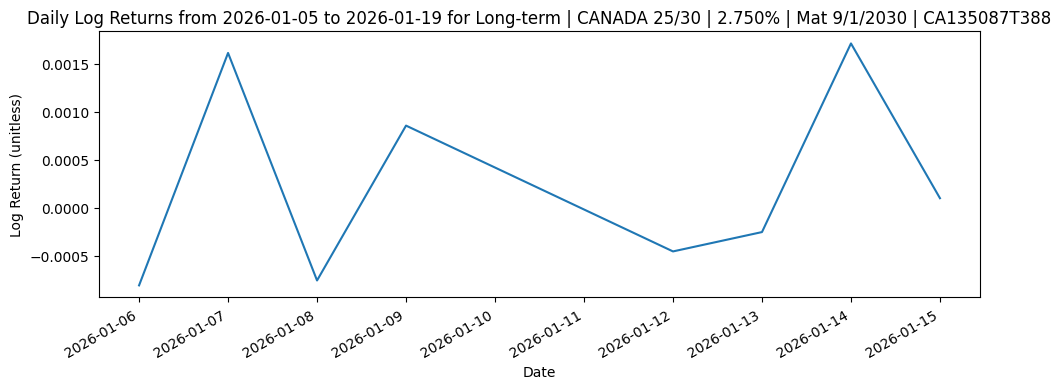


BOND: Short-term | CANADA 25/27 | 2.500% | Mat 8/1/2027 | CA135087T461


Term                                      bond_page_url  \
117  Short-term  https://markets.businessinsider.com/bonds/cana...   
118  Short-term  https://markets.businessinsider.com/bonds/cana...   
119  Short-term  https://markets.businessinsider.com/bonds/cana...   
120  Short-term  https://markets.businessinsider.com/bonds/cana...   
121  Short-term  https://markets.businessinsider.com/bonds/cana...   
122  Short-term  https://markets.businessinsider.com/bonds/cana...   
123  Short-term  https://markets.businessinsider.com/bonds/cana...   
124  Short-term  https://markets.businessinsider.com/bonds/cana...   
125  Short-term  https://markets.businessinsider.com/bonds/cana...   

                   tkData                                     chart_json_url  \
117  1,145462038,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
118  1,145462038,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
119  1,145462038,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
120  1,145462038,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
121  1,145462038,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
122  1,145462038,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
123  1,145462038,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
124  1,145462038,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
125  1,145462038,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

             ISIN          Name Country                    Issuer  \
117  CA135087T461  CANADA 25/27  Canada  Canada, Government of...   
118  CA135087T461  CANADA 25/27  Canada  Canada, Government of...   
119  CA135087T461  CANADA 25/27  Canada  Canada, Government of...   
120  CA135087T461  CANADA 25/27  Canada  Canada, Government of...   
121  CA135087T461  CANADA 25/27  Canada  Canada, Government of...   
122  CA135087T461  CANADA 25/27  Canada  Canada, Government of...   
123  CA135087T461  CANADA 25/27  Canada  Canada, Government of...   
124  CA135087T461  CANADA 25/27  Canada  Canada, Government of...   
125  CA135087T461  CANADA 25/27  Canada  Canada, Government of...   

       Issue Volume Currency  ... Special Coupon Type Maturity Date  \
117  30,000,000,000      CAD  ...                          8/1/2027   
118  30,000,000,000      CAD  ...                          8/1/2027   
119  30,000,000,000      CAD  ...                          8/1/2027   
120  30,000,000,000      CAD  ...                          8/1/2027   
121  30,000,000,000      CAD  ...                          8/1/2027   
122  30,000,000,000      CAD  ...                          8/1/2027   
123  30,000,000,000      CAD  ...                          8/1/2027   
124  30,000,000,000      CAD  ...                          8/1/2027   
125  30,000,000,000      CAD  ...                          8/1/2027   

    Coupon Payment Date Payment Frequency No. of Payments per Year  \
117            2/1/2026                                        2.0   
118            2/1/2026                                        2.0   
119            2/1/2026                                        2.0   
120            2/1/2026                                        2.0   
121            2/1/2026                                        2.0   
122            2/1/2026                                        2.0   
123            2/1/2026                                        2.0   
124            2/1/2026                                        2.0   
125            2/1/2026                                        2.0   

    Coupon Start Date Final Coupon Date Floater?        date  \
117          8/1/2025         7/31/2027       No  2026-01-05   
118          8/1/2025         7/31/2027       No  2026-01-06   
119          8/1/2025         7/31/2027       No  2026-01-07   
120          8/1/2025         7/31/2027       No  2026-01-08   
121          8/1/2025         7/31/2027       No  2026-01-09   
122          8/1/2025 

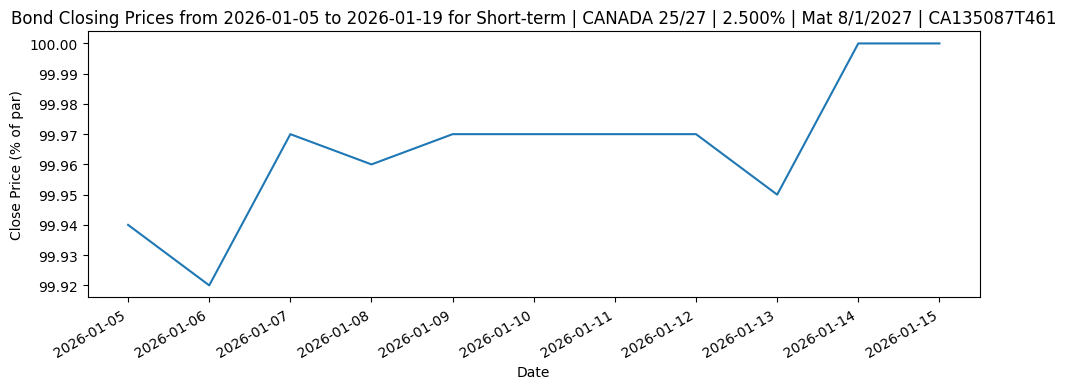

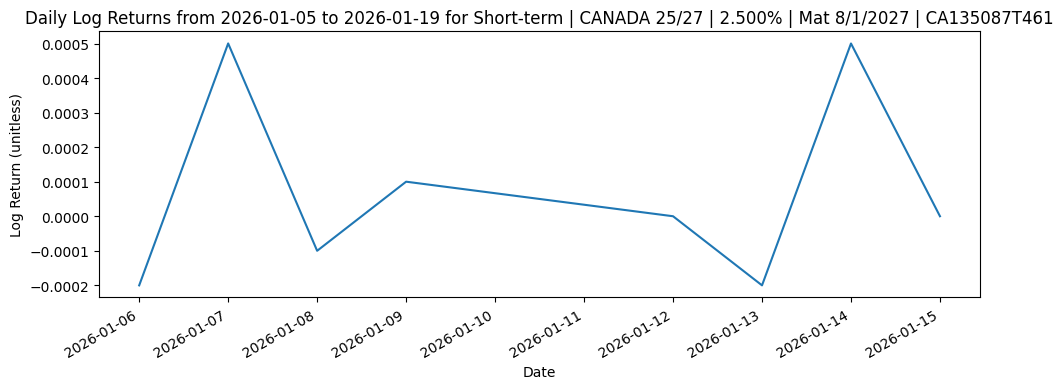


BOND: Long-term | CANADA 25/35 | 3.250% | Mat 12/1/2035 | CA135087T537


Term                                      bond_page_url  \
281  Long-term  https://markets.businessinsider.com/bonds/cana...   
282  Long-term  https://markets.businessinsider.com/bonds/cana...   
283  Long-term  https://markets.businessinsider.com/bonds/cana...   
284  Long-term  https://markets.businessinsider.com/bonds/cana...   
285  Long-term  https://markets.businessinsider.com/bonds/cana...   
286  Long-term  https://markets.businessinsider.com/bonds/cana...   
287  Long-term  https://markets.businessinsider.com/bonds/cana...   
288  Long-term  https://markets.businessinsider.com/bonds/cana...   
289  Long-term  https://markets.businessinsider.com/bonds/cana...   

                   tkData                                     chart_json_url  \
281  1,146822867,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
282  1,146822867,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
283  1,146822867,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
284  1,146822867,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
285  1,146822867,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
286  1,146822867,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
287  1,146822867,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
288  1,146822867,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
289  1,146822867,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

             ISIN          Name Country                    Issuer  \
281  CA135087T537  CANADA 25/35  Canada  Canada, Government of...   
282  CA135087T537  CANADA 25/35  Canada  Canada, Government of...   
283  CA135087T537  CANADA 25/35  Canada  Canada, Government of...   
284  CA135087T537  CANADA 25/35  Canada  Canada, Government of...   
285  CA135087T537  CANADA 25/35  Canada  Canada, Government of...   
286  CA135087T537  CANADA 25/35  Canada  Canada, Government of...   
287  CA135087T537  CANADA 25/35  Canada  Canada, Government of...   
288  CA135087T537  CANADA 25/35  Canada  Canada, Government of...   
289  CA135087T537  CANADA 25/35  Canada  Canada, Government of...   

       Issue Volume Currency  ... Special Coupon Type Maturity Date  \
281  42,000,000,000      CAD  ...                         12/1/2035   
282  42,000,000,000      CAD  ...                         12/1/2035   
283  42,000,000,000      CAD  ...                         12/1/2035   
284  42,000,000,000      CAD  ...                         12/1/2035   
285  42,000,000,000      CAD  ...                         12/1/2035   
286  42,000,000,000      CAD  ...                         12/1/2035   
287  42,000,000,000      CAD  ...                         12/1/2035   
288  42,000,000,000      CAD  ...                         12/1/2035   
289  42,000,000,000      CAD  ...                         12/1/2035   

    Coupon Payment Date Payment Frequency No. of Payments per Year  \
281            6/1/2026                                        2.0   
282            6/1/2026                                        2.0   
283            6/1/2026                                        2.0   
284            6/1/2026                                        2.0   
285            6/1/2026                                        2.0   
286            6/1/2026                                        2.0   
287            6/1/2026                                        2.0   
288            6/1/2026                                        2.0   
289            6/1/2026                                        2.0   

    Coupon Start Date Final Coupon Date Floater?        date  \
281         12/1/2025        11/30/2035       No  2026-01-05   
282         12/1/2025        11/30/2035       No  2026-01-06   
283         12/1/2025        11/30/2035       No  2026-01-07   
284         12/1/2025        11/30/2035       No  2026-01-08   
285         12/1/2025        11/30/2035       No  2026-01-09   
286         12/1/2025        11

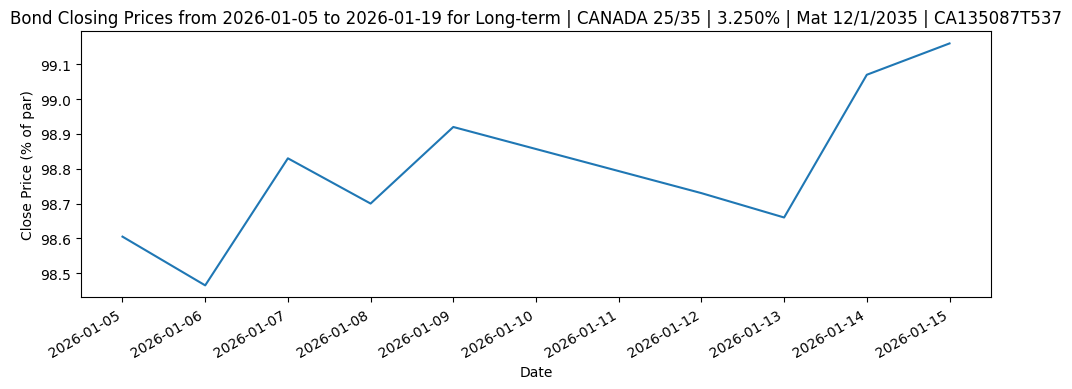

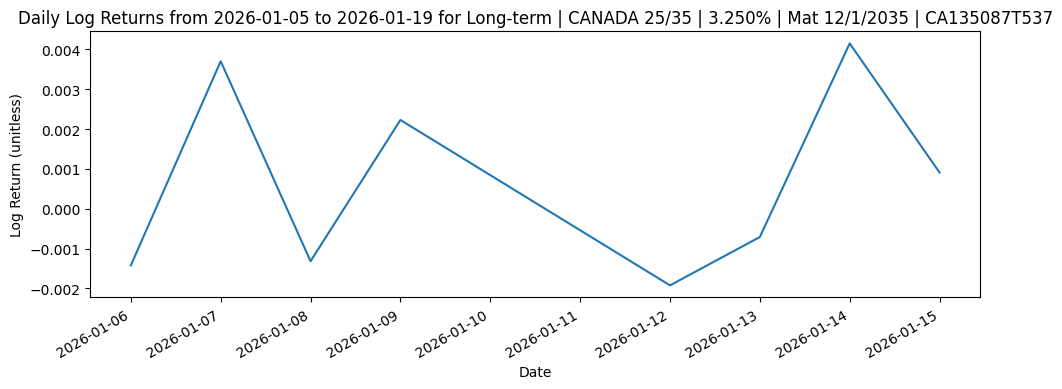


BOND: Short-term | CANADA 25/27 | 2.500% | Mat 11/1/2027 | CA135087T610


Term                                      bond_page_url  \
144  Short-term  https://markets.businessinsider.com/bonds/cana...   
145  Short-term  https://markets.businessinsider.com/bonds/cana...   
146  Short-term  https://markets.businessinsider.com/bonds/cana...   
147  Short-term  https://markets.businessinsider.com/bonds/cana...   
148  Short-term  https://markets.businessinsider.com/bonds/cana...   
149  Short-term  https://markets.businessinsider.com/bonds/cana...   
150  Short-term  https://markets.businessinsider.com/bonds/cana...   
151  Short-term  https://markets.businessinsider.com/bonds/cana...   
152  Short-term  https://markets.businessinsider.com/bonds/cana...   

                   tkData                                     chart_json_url  \
144  1,148260836,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
145  1,148260836,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
146  1,148260836,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
147  1,148260836,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
148  1,148260836,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
149  1,148260836,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
150  1,148260836,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
151  1,148260836,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
152  1,148260836,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

             ISIN          Name Country                    Issuer  \
144  CA135087T610  CANADA 25/27  Canada  Canada, Government of...   
145  CA135087T610  CANADA 25/27  Canada  Canada, Government of...   
146  CA135087T610  CANADA 25/27  Canada  Canada, Government of...   
147  CA135087T610  CANADA 25/27  Canada  Canada, Government of...   
148  CA135087T610  CANADA 25/27  Canada  Canada, Government of...   
149  CA135087T610  CANADA 25/27  Canada  Canada, Government of...   
150  CA135087T610  CANADA 25/27  Canada  Canada, Government of...   
151  CA135087T610  CANADA 25/27  Canada  Canada, Government of...   
152  CA135087T610  CANADA 25/27  Canada  Canada, Government of...   

       Issue Volume Currency  ... Special Coupon Type Maturity Date  \
144  30,000,000,000      CAD  ...                         11/1/2027   
145  30,000,000,000      CAD  ...                         11/1/2027   
146  30,000,000,000      CAD  ...                         11/1/2027   
147  30,000,000,000      CAD  ...                         11/1/2027   
148  30,000,000,000      CAD  ...                         11/1/2027   
149  30,000,000,000      CAD  ...                         11/1/2027   
150  30,000,000,000      CAD  ...                         11/1/2027   
151  30,000,000,000      CAD  ...                         11/1/2027   
152  30,000,000,000      CAD  ...                         11/1/2027   

    Coupon Payment Date Payment Frequency No. of Payments per Year  \
144            5/1/2026                                        2.0   
145            5/1/2026                                        2.0   
146            5/1/2026                                        2.0   
147            5/1/2026                                        2.0   
148            5/1/2026                                        2.0   
149            5/1/2026                                        2.0   
150            5/1/2026                                        2.0   
151            5/1/2026                                        2.0   
152            5/1/2026                                        2.0   

    Coupon Start Date Final Coupon Date Floater?        date  \
144         11/1/2025        10/31/2027       No  2026-01-05   
145         11/1/2025        10/31/2027       No  2026-01-06   
146         11/1/2025        10/31/2027       No  2026-01-07   
147         11/1/2025        10/31/2027       No  2026-01-08   
148         11/1/2025        10/31/2027       No  2026-01-09   
149         11/1/2025 

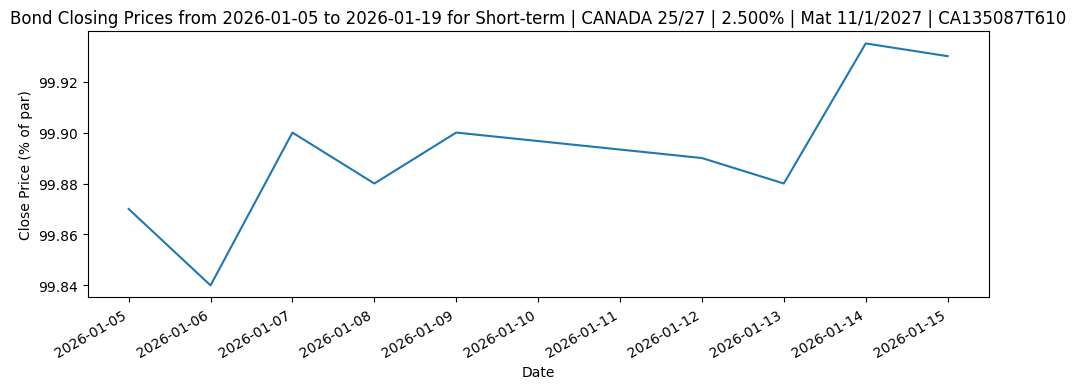

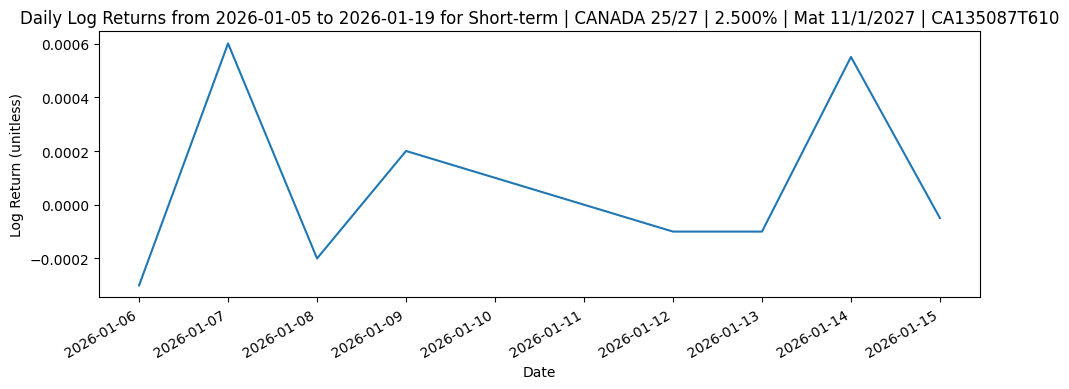


BOND: Long-term | CANADA 25/31 | 2.750% | Mat 3/1/2031 | CA135087T792


Term                                      bond_page_url  \
253  Long-term  https://markets.businessinsider.com/bonds/cana...   
254  Long-term  https://markets.businessinsider.com/bonds/cana...   
255  Long-term  https://markets.businessinsider.com/bonds/cana...   
256  Long-term  https://markets.businessinsider.com/bonds/cana...   
257  Long-term  https://markets.businessinsider.com/bonds/cana...   
258  Long-term  https://markets.businessinsider.com/bonds/cana...   
259  Long-term  https://markets.businessinsider.com/bonds/cana...   
260  Long-term  https://markets.businessinsider.com/bonds/cana...   
261  Long-term  https://markets.businessinsider.com/bonds/cana...   

                   tkData                                     chart_json_url  \
253  1,149759344,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
254  1,149759344,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
255  1,149759344,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
256  1,149759344,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
257  1,149759344,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
258  1,149759344,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
259  1,149759344,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
260  1,149759344,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
261  1,149759344,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

             ISIN          Name Country                    Issuer  \
253  CA135087T792  CANADA 25/31  Canada  Canada, Government of...   
254  CA135087T792  CANADA 25/31  Canada  Canada, Government of...   
255  CA135087T792  CANADA 25/31  Canada  Canada, Government of...   
256  CA135087T792  CANADA 25/31  Canada  Canada, Government of...   
257  CA135087T792  CANADA 25/31  Canada  Canada, Government of...   
258  CA135087T792  CANADA 25/31  Canada  Canada, Government of...   
259  CA135087T792  CANADA 25/31  Canada  Canada, Government of...   
260  CA135087T792  CANADA 25/31  Canada  Canada, Government of...   
261  CA135087T792  CANADA 25/31  Canada  Canada, Government of...   

       Issue Volume Currency  ... Special Coupon Type Maturity Date  \
253  21,000,000,000      CAD  ...                          3/1/2031   
254  21,000,000,000      CAD  ...                          3/1/2031   
255  21,000,000,000      CAD  ...                          3/1/2031   
256  21,000,000,000      CAD  ...                          3/1/2031   
257  21,000,000,000      CAD  ...                          3/1/2031   
258  21,000,000,000      CAD  ...                          3/1/2031   
259  21,000,000,000      CAD  ...                          3/1/2031   
260  21,000,000,000      CAD  ...                          3/1/2031   
261  21,000,000,000      CAD  ...                          3/1/2031   

    Coupon Payment Date Payment Frequency No. of Payments per Year  \
253            3/1/2026                                        2.0   
254            3/1/2026                                        2.0   
255            3/1/2026                                        2.0   
256            3/1/2026                                        2.0   
257            3/1/2026                                        2.0   
258            3/1/2026                                        2.0   
259            3/1/2026                                        2.0   
260            3/1/2026                                        2.0   
261            3/1/2026                                        2.0   

    Coupon Start Date Final Coupon Date Floater?        date  \
253          3/1/2026         2/28/2031       No  2026-01-05   
254          3/1/2026         2/28/2031       No  2026-01-06   
255          3/1/2026         2/28/2031       No  2026-01-07   
256          3/1/2026         2/28/2031       No  2026-01-08   
257          3/1/2026         2/28/2031       No  2026-01-09   
258          3/1/2026         2

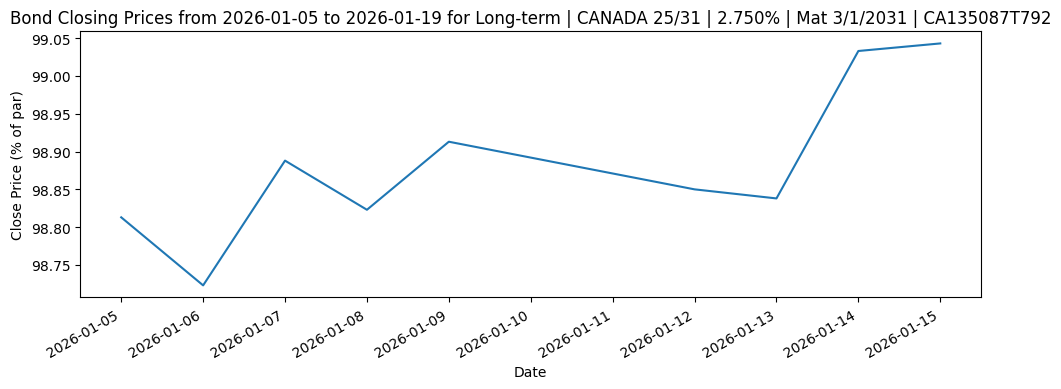

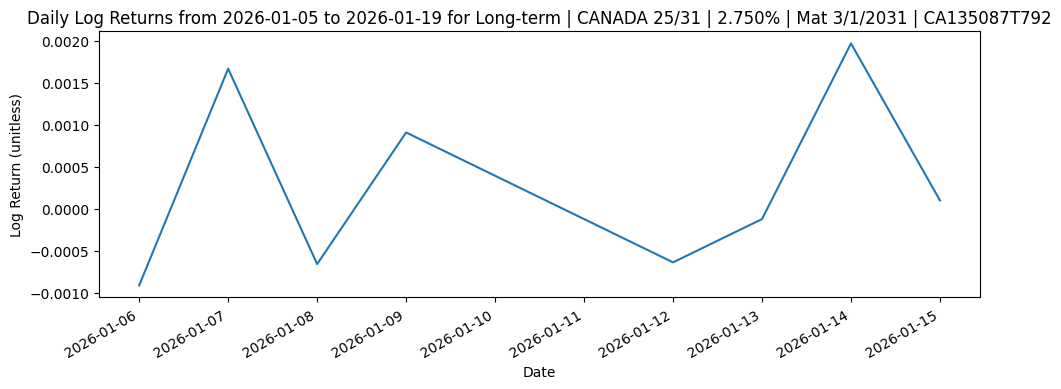


BOND: Short-term | CANADA 25/28 | 2.250% | Mat 2/1/2028 | CA135087T958


Term                                      bond_page_url  \
153  Short-term  https://markets.businessinsider.com/bonds/cana...   
154  Short-term  https://markets.businessinsider.com/bonds/cana...   
155  Short-term  https://markets.businessinsider.com/bonds/cana...   
156  Short-term  https://markets.businessinsider.com/bonds/cana...   
157  Short-term  https://markets.businessinsider.com/bonds/cana...   
158  Short-term  https://markets.businessinsider.com/bonds/cana...   
159  Short-term  https://markets.businessinsider.com/bonds/cana...   
160  Short-term  https://markets.businessinsider.com/bonds/cana...   
161  Short-term  https://markets.businessinsider.com/bonds/cana...   
162  Short-term  https://markets.businessinsider.com/bonds/cana...   

                 tkData                                     chart_json_url  \
153  1,151027258,16,184  https://markets.businessinsider.com/Ajax/Chart...   
154  1,151027258,16,184  https://markets.businessinsider.com/Ajax/Chart...   
155  1,151027258,16,184  https://markets.businessinsider.com/Ajax/Chart...   
156  1,151027258,16,184  https://markets.businessinsider.com/Ajax/Chart...   
157  1,151027258,16,184  https://markets.businessinsider.com/Ajax/Chart...   
158  1,151027258,16,184  https://markets.businessinsider.com/Ajax/Chart...   
159  1,151027258,16,184  https://markets.businessinsider.com/Ajax/Chart...   
160  1,151027258,16,184  https://markets.businessinsider.com/Ajax/Chart...   
161  1,151027258,16,184  https://markets.businessinsider.com/Ajax/Chart...   
162  1,151027258,16,184  https://markets.businessinsider.com/Ajax/Chart...   

             ISIN          Name Country                    Issuer  \
153  CA135087T958  CANADA 25/28  Canada  Canada, Government of...   
154  CA135087T958  CANADA 25/28  Canada  Canada, Government of...   
155  CA135087T958  CANADA 25/28  Canada  Canada, Government of...   
156  CA135087T958  CANADA 25/28  Canada  Canada, Government of...   
157  CA135087T958  CANADA 25/28  Canada  Canada, Government of...   
158  CA135087T958  CANADA 25/28  Canada  Canada, Government of...   
159  CA135087T958  CANADA 25/28  Canada  Canada, Government of...   
160  CA135087T958  CANADA 25/28  Canada  Canada, Government of...   
161  CA135087T958  CANADA 25/28  Canada  Canada, Government of...   
162  CA135087T958  CANADA 25/28  Canada  Canada, Government of...   

       Issue Volume Currency  ... Special Coupon Type Maturity Date  \
153  24,000,000,000      CAD  ...                          2/1/2028   
154  24,000,000,000      CAD  ...                          2/1/2028   
155  24,000,000,000      CAD  ...                          2/1/2028   
156  24,000,000,000      CAD  ...                          2/1/2028   
157  24,000,000,000      CAD  ...                          2/1/2028   
158  24,000,000,000      CAD  ...                          2/1/2028   
159  24,000,000,000      CAD  ...                          2/1/2028   
160  24,000,000,000      CAD  ...                          2/1/2028   
161  24,000,000,000      CAD  ...                          2/1/2028   
162  24,000,000,000      CAD  ...                          2/1/2028   

    Coupon Payment Date Payment Frequency No. of Payments per Year  \
153            2/1/2026                                        2.0   
154            2/1/2026                                        2.0   
155            2/1/2026                                        2.0   
156            2/1/2026                                        2.0   
157            2/1/2026                                        2.0   
158            2/1/2026                                        2.0   
159            2/1/2026                                        2.0   
160            2/1/2026                                        2.0   
161            2/1/2026                                        2.0   
162            2/1/2026                                        2.0   

    Coupon Start Date Final Coupon Date Floater?        date  \
153 

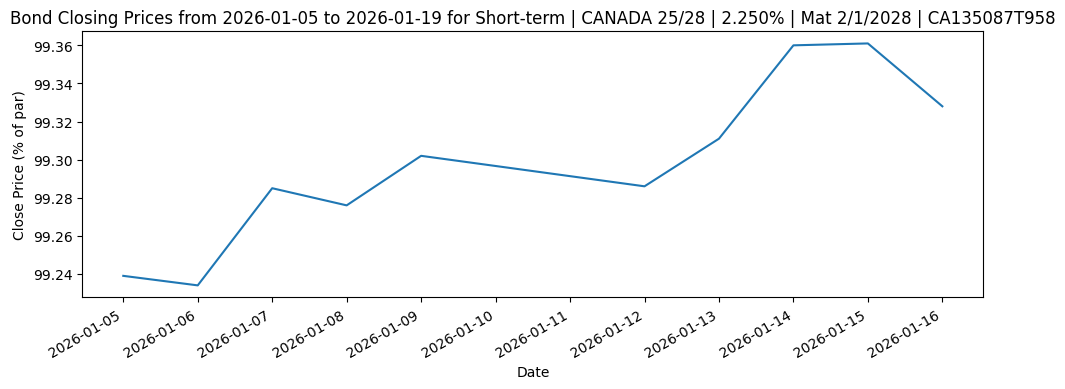

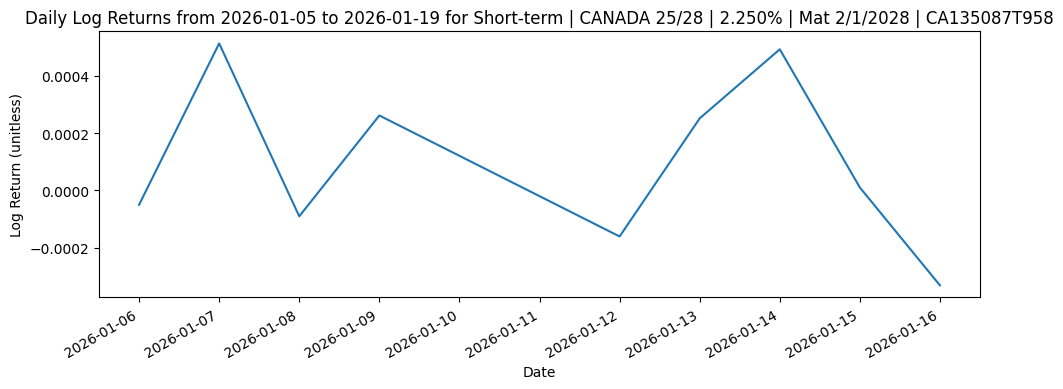


BOND: Short-term | CDA 2027            01.06 | 8.000% | Mat 6/1/2027 | CA135087VW17


Term                                      bond_page_url  \
108  Short-term  https://markets.businessinsider.com/bonds/8_00...   
109  Short-term  https://markets.businessinsider.com/bonds/8_00...   
110  Short-term  https://markets.businessinsider.com/bonds/8_00...   
111  Short-term  https://markets.businessinsider.com/bonds/8_00...   
112  Short-term  https://markets.businessinsider.com/bonds/8_00...   
113  Short-term  https://markets.businessinsider.com/bonds/8_00...   
114  Short-term  https://markets.businessinsider.com/bonds/8_00...   
115  Short-term  https://markets.businessinsider.com/bonds/8_00...   
116  Short-term  https://markets.businessinsider.com/bonds/8_00...   

                tkData                                     chart_json_url  \
108  1,490501,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
109  1,490501,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
110  1,490501,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
111  1,490501,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
112  1,490501,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
113  1,490501,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
114  1,490501,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
115  1,490501,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
116  1,490501,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

             ISIN                       Name Country  \
108  CA135087VW17  CDA 2027            01.06  Canada   
109  CA135087VW17  CDA 2027            01.06  Canada   
110  CA135087VW17  CDA 2027            01.06  Canada   
111  CA135087VW17  CDA 2027            01.06  Canada   
112  CA135087VW17  CDA 2027            01.06  Canada   
113  CA135087VW17  CDA 2027            01.06  Canada   
114  CA135087VW17  CDA 2027            01.06  Canada   
115  CA135087VW17  CDA 2027            01.06  Canada   
116  CA135087VW17  CDA 2027            01.06  Canada   

                       Issuer   Issue Volume Currency  ...  \
108  Canada, Government of...  3,620,841,000      CAD  ...   
109  Canada, Government of...  3,620,841,000      CAD  ...   
110  Canada, Government of...  3,620,841,000      CAD  ...   
111  Canada, Government of...  3,620,841,000      CAD  ...   
112  Canada, Government of...  3,620,841,000      CAD  ...   
113  Canada, Government of...  3,620,841,000      CAD  ...   
114  Canada, Government of...  3,620,841,000      CAD  ...   
115  Canada, Government of...  3,620,841,000      CAD  ...   
116  Canada, Government of...  3,620,841,000      CAD  ...   

    Special Coupon Type Maturity Date Coupon Payment Date Payment Frequency  \
108                          6/1/2027            6/1/2026                     
109                          6/1/2027            6/1/2026                     
110                          6/1/2027            6/1/2026                     
111                          6/1/2027            6/1/2026                     
112                          6/1/2027            6/1/2026                     
113                          6/1/2027            6/1/2026                     
114                          6/1/2027            6/1/2026                     
115                          6/1/2027            6/1/2026                     
116                          6/1/2027            6/1/2026                     

    No. of Payments per Year Coupon Start Date Final Coupon Date Floater?  \
108                      2.0          6/1/1996         5/31/2027       No   
109                      2.0          6/1/1996         5/31/2027       No   
110                      2.0          6/1/1996         5/31/2027       No   
111                      2.0          6/1/1996         5/31/2027       No   
112                      2.0          6/1/1996         5/31/2027       No   
113                      2.0          6/1/1996         5/31/2027       No   
114                      2.

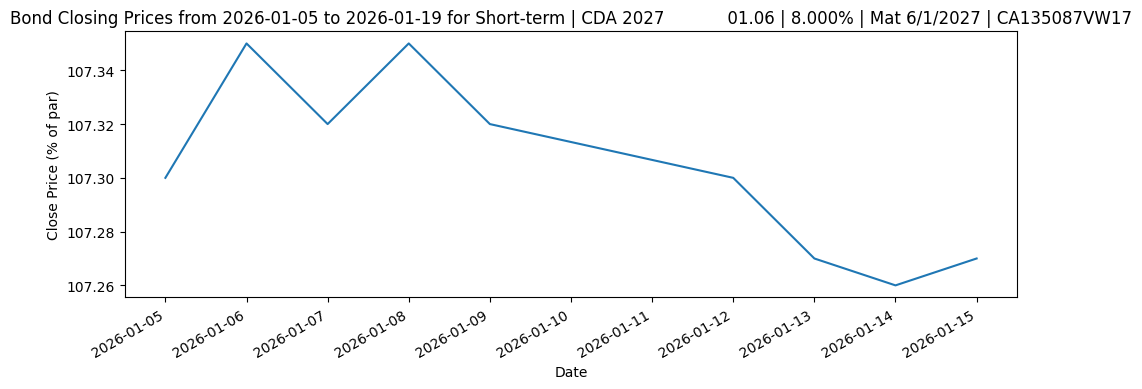

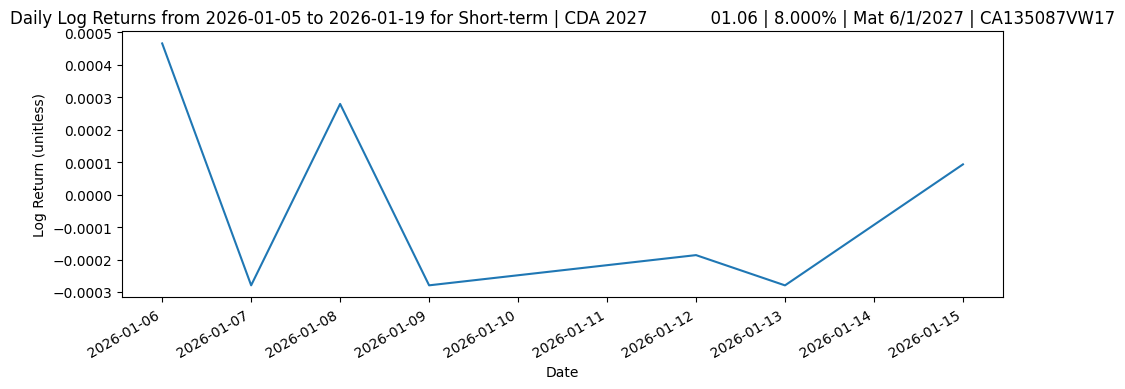


BOND: Long-term | CDA 2029            01.06 | 5.750% | Mat 6/1/2029 | CA135087WL43


Term                                      bond_page_url  \
208  Long-term  https://markets.businessinsider.com/bonds/5_75...   
209  Long-term  https://markets.businessinsider.com/bonds/5_75...   
210  Long-term  https://markets.businessinsider.com/bonds/5_75...   
211  Long-term  https://markets.businessinsider.com/bonds/5_75...   
212  Long-term  https://markets.businessinsider.com/bonds/5_75...   
213  Long-term  https://markets.businessinsider.com/bonds/5_75...   
214  Long-term  https://markets.businessinsider.com/bonds/5_75...   
215  Long-term  https://markets.businessinsider.com/bonds/5_75...   
216  Long-term  https://markets.businessinsider.com/bonds/5_75...   

                tkData                                     chart_json_url  \
208  1,847359,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
209  1,847359,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
210  1,847359,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
211  1,847359,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
212  1,847359,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
213  1,847359,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
214  1,847359,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
215  1,847359,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
216  1,847359,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

             ISIN                       Name Country  \
208  CA135087WL43  CDA 2029            01.06  Canada   
209  CA135087WL43  CDA 2029            01.06  Canada   
210  CA135087WL43  CDA 2029            01.06  Canada   
211  CA135087WL43  CDA 2029            01.06  Canada   
212  CA135087WL43  CDA 2029            01.06  Canada   
213  CA135087WL43  CDA 2029            01.06  Canada   
214  CA135087WL43  CDA 2029            01.06  Canada   
215  CA135087WL43  CDA 2029            01.06  Canada   
216  CA135087WL43  CDA 2029            01.06  Canada   

                       Issuer    Issue Volume Currency  ...  \
208  Canada, Government of...  10,598,959,000      CAD  ...   
209  Canada, Government of...  10,598,959,000      CAD  ...   
210  Canada, Government of...  10,598,959,000      CAD  ...   
211  Canada, Government of...  10,598,959,000      CAD  ...   
212  Canada, Government of...  10,598,959,000      CAD  ...   
213  Canada, Government of...  10,598,959,000      CAD  ...   
214  Canada, Government of...  10,598,959,000      CAD  ...   
215  Canada, Government of...  10,598,959,000      CAD  ...   
216  Canada, Government of...  10,598,959,000      CAD  ...   

    Special Coupon Type Maturity Date Coupon Payment Date Payment Frequency  \
208                          6/1/2029            6/1/2026                     
209                          6/1/2029            6/1/2026                     
210                          6/1/2029            6/1/2026                     
211                          6/1/2029            6/1/2026                     
212                          6/1/2029            6/1/2026                     
213                          6/1/2029            6/1/2026                     
214                          6/1/2029            6/1/2026                     
215                          6/1/2029            6/1/2026                     
216                          6/1/2029            6/1/2026                     

    No. of Payments per Year Coupon Start Date Final Coupon Date Floater?  \
208                      2.0          6/1/1998         5/31/2029       No   
209                      2.0          6/1/1998         5/31/2029       No   
210                      2.0          6/1/1998         5/31/2029       No   
211                      2.0          6/1/1998         5/31/2029       No   
212                      2.0          6/1/1998         5/31/2029       No   
213                      2.0          6/1/1998         5/31/2029       No   
214                      2

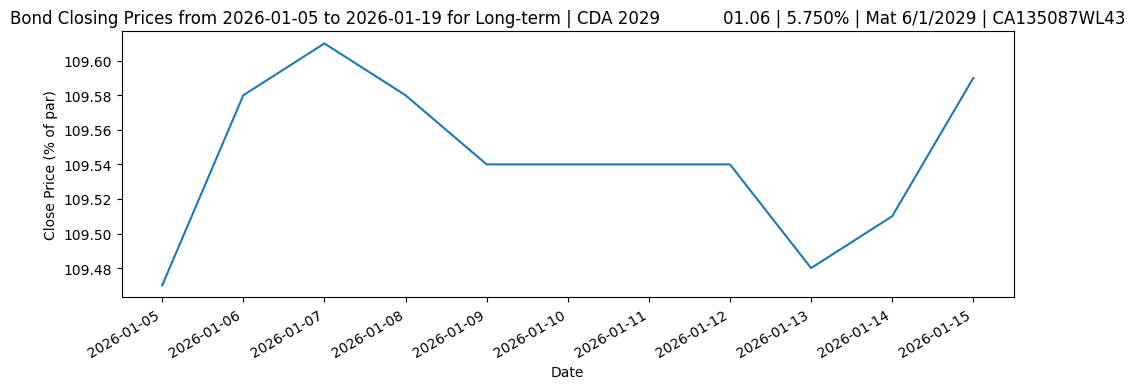

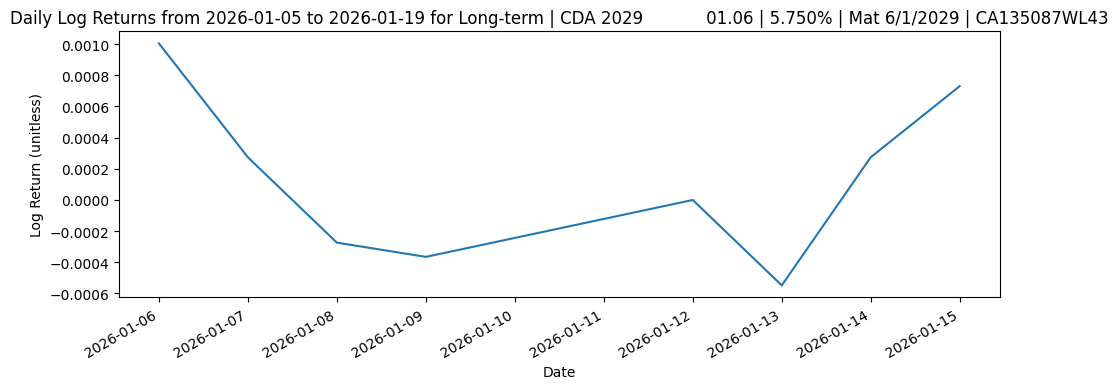


BOND: Long-term | CDA 2033            01.06 | 5.750% | Mat 6/1/2033 | CA135087XG49


Term                                      bond_page_url  \
317  Long-term  https://markets.businessinsider.com/bonds/5_75...   
318  Long-term  https://markets.businessinsider.com/bonds/5_75...   
319  Long-term  https://markets.businessinsider.com/bonds/5_75...   
320  Long-term  https://markets.businessinsider.com/bonds/5_75...   
321  Long-term  https://markets.businessinsider.com/bonds/5_75...   
322  Long-term  https://markets.businessinsider.com/bonds/5_75...   
323  Long-term  https://markets.businessinsider.com/bonds/5_75...   
324  Long-term  https://markets.businessinsider.com/bonds/5_75...   
325  Long-term  https://markets.businessinsider.com/bonds/5_75...   

                 tkData                                     chart_json_url  \
317  1,1321208,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
318  1,1321208,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
319  1,1321208,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
320  1,1321208,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
321  1,1321208,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
322  1,1321208,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
323  1,1321208,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
324  1,1321208,1330,184  https://markets.businessinsider.com/Ajax/Chart...   
325  1,1321208,1330,184  https://markets.businessinsider.com/Ajax/Chart...   

             ISIN                       Name Country  \
317  CA135087XG49  CDA 2033            01.06  Canada   
318  CA135087XG49  CDA 2033            01.06  Canada   
319  CA135087XG49  CDA 2033            01.06  Canada   
320  CA135087XG49  CDA 2033            01.06  Canada   
321  CA135087XG49  CDA 2033            01.06  Canada   
322  CA135087XG49  CDA 2033            01.06  Canada   
323  CA135087XG49  CDA 2033            01.06  Canada   
324  CA135087XG49  CDA 2033            01.06  Canada   
325  CA135087XG49  CDA 2033            01.06  Canada   

                       Issuer    Issue Volume Currency  ...  \
317  Canada, Government of...  11,988,905,000      CAD  ...   
318  Canada, Government of...  11,988,905,000      CAD  ...   
319  Canada, Government of...  11,988,905,000      CAD  ...   
320  Canada, Government of...  11,988,905,000      CAD  ...   
321  Canada, Government of...  11,988,905,000      CAD  ...   
322  Canada, Government of...  11,988,905,000      CAD  ...   
323  Canada, Government of...  11,988,905,000      CAD  ...   
324  Canada, Government of...  11,988,905,000      CAD  ...   
325  Canada, Government of...  11,988,905,000      CAD  ...   

    Special Coupon Type Maturity Date Coupon Payment Date Payment Frequency  \
317                          6/1/2033            6/1/2026                     
318                          6/1/2033            6/1/2026                     
319                          6/1/2033            6/1/2026                     
320                          6/1/2033            6/1/2026                     
321                          6/1/2033            6/1/2026                     
322                          6/1/2033            6/1/2026                     
323                          6/1/2033            6/1/2026                     
324                          6/1/2033            6/1/2026                     
325                          6/1/2033            6/1/2026                     

    No. of Payments per Year Coupon Start Date Final Coupon Date Floater?  \
317                      2.0         12/1/2001         5/31/2033       No   
318                      2.0         12/1/2001         5/31/2033       No   
319                      2.0         12/1/2001         5/31/2033       No   
320                      2.0         12/1/2001         5/31/2033       No   
321                      2.0         12/1/2001         5/31/2033       No   
322                      2.0         12/1/2001         5/31/2033       No   
323             

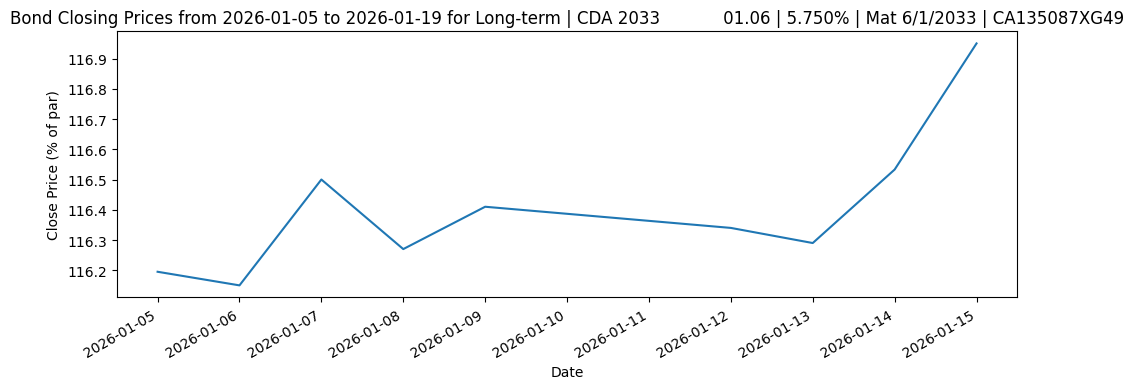

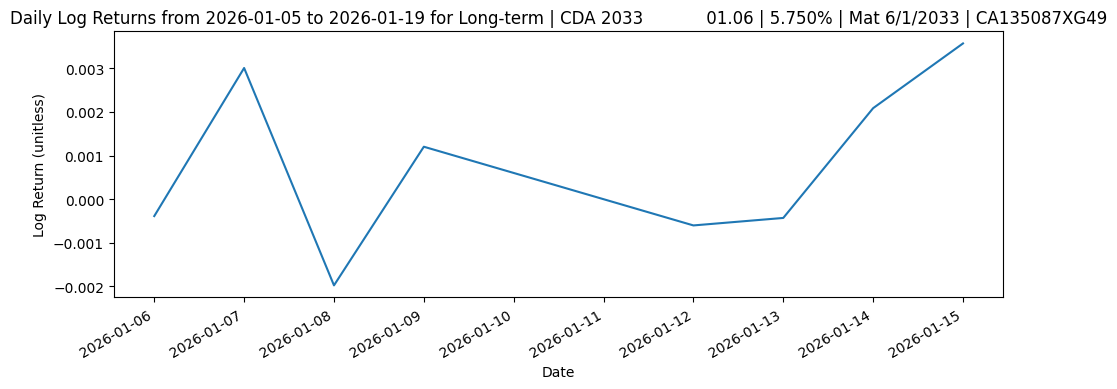


Per-bond CSVs written to ./bonds/
Unique bonds processed: 42


In [ ]:
"""
Markets Insider Bond Data Pipeline

Features
--------
1. Scrapes static bond metadata from Markets Insider bond pages:
   - ISIN, name, issuer, country
   - Issue details (volume, currency, price, date)
   - Coupon structure and payment characteristics
   - Maturity information

2. Retrieves historical bond closing prices using the Chart_GetChartData endpoint
   identified by tkData.

3. Uses a single, centralized date configuration to:
   - Control API request windows
   - Filter observations to a consistent analysis period
   - Restrict data to weekday trading days

4. Classifies bonds as:
   - Short-term: maturity within 3 years of START_DATE
   - Long-term: maturity beyond 3 years of START_DATE

5. Produces one root-level master CSV containing the union of all per-bond CSV rows:
   - bonds_master_all.csv
   - One row per bond-day, with full bond metadata repeated per row.
   - Column order matches the Bond Data table with Close Price at the end.

6. Produces one self-contained CSV per bond (stored under ./bonds/):
   - Full bond metadata repeated per date
   - Closing prices appended as the final column

7. For each bond:
   - Prints a readable bond title before displaying the bond dataframe
   - Displays the bond dataframe
   - Generates two plots:
       a) daily closing prices (% of par)
       b) daily log returns (unitless)

8. Ensures input bond uniqueness by:
   - Deduplicating on tkData (time series identifier)
   - Secondary deduplication on bond page URL

9. Uses explicit HTTP headers and request timeouts to ensure:
   - Stable HTML parsing
   - Consistent API responses
   - Predictable failure behavior in batch execution

URLs are kept for documentation:
  - bond_page_url
  - chart_json_url

Dependencies
------------
beautifulsoup4
pandas
numpy
matplotlib
requests
"""

import os
import re
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from bs4 import BeautifulSoup
from urllib.parse import unquote


# ======================================================================================
# 1) Date configuration (single source of truth)
# ======================================================================================
START_DATE = pd.to_datetime("2026-01-05")  # inclusive
END_DATE   = pd.to_datetime("2026-01-19")  # inclusive

FROM_YYYYMMDD = START_DATE.strftime("%Y%m%d")
TO_YYYYMMDD   = END_DATE.strftime("%Y%m%d")

START = START_DATE.date()
END   = END_DATE.date()


# ======================================================================================
# 2) HTTP settings
# ======================================================================================
HEADERS = {"User-Agent": "Mozilla/5.0"}
TIMEOUT_SEC = 30


# ======================================================================================
# 3) Bond inputs (bond_page_url, chart_json_url used only to extract tkData)
#    Includes updated 30 and 32 values.
# ======================================================================================
RAW_BONDS = [
    ("https://markets.businessinsider.com/bonds/canadacd-bonds_202326-bond-2026-ca135087r226?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C130654501%2C1330%2C184&from=20251115&to=20260115"),
    ("https://markets.businessinsider.com/bonds/canadacd-bonds_202026-bond-2026-ca135087l518?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C57601476%2C1330%2C184&from=20251115&to=20260115"),
    ("https://markets.businessinsider.com/bonds/canadacd-bonds_202326-bond-2026-ca135087p816?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C124578091%2C1330%2C184&from=20251115&to=20260115"),
    ("https://markets.businessinsider.com/bonds/canadacd-bonds_202426-bond-2026-ca135087r556?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C132969994%2C1330%2C184&from=20251115&to=20260115"),
    ("https://markets.businessinsider.com/bonds/canadacd-bonds_201526-bond-2026-ca135087e679?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C28975906%2C1330%2C184&from=20251115&to=20260115"),
    ("https://markets.businessinsider.com/bonds/canadacd-bonds_202426-bond-2026-ca135087r978?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C135402145%2C1330%2C184&from=20251115&to=20260115"),
    ("https://markets.businessinsider.com/bonds/canadacd-bonds_202126-bond-2026-ca135087l930?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C111141014%2C1330%2C184&from=20251115&to=20260115"),
    ("https://markets.businessinsider.com/bonds/canadacd-bonds_202426-bond-2026-ca135087s398?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C137893857%2C1330%2C184&from=20251115&to=20260115"),
    ("https://markets.businessinsider.com/bonds/canadacd-bonds_202427-bond-2027-ca135087s547?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C139591564%2C1330%2C184&from=20251115&to=20260115"),
    ("https://markets.businessinsider.com/bonds/canadacd-bonds_202127-bond-2027-ca135087m847?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C114329463%2C1330%2C184&from=20251115&to=20260115"),
    ("https://markets.businessinsider.com/bonds/canadacd-bonds_202527-bond-2027-ca135087s885?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C142700048%2C1330%2C184&from=20251115&to=20260115"),
    ("https://markets.businessinsider.com/bonds/canadacd-bonds_201627-bond-2027-ca135087f825?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C33461441%2C1330%2C184&from=20251115&to=20260115"),
    ("https://markets.businessinsider.com/bonds/8_000-canada-government-of-bond-2027-ca135087vw17?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C490501%2C1330%2C184&from=20251115&to=20260115"),
    ("https://markets.businessinsider.com/bonds/canadacd-bonds_202527-bond-2027-ca135087t461?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C145462038%2C1330%2C184&from=20251115&to=20260115"),
    ("https://markets.businessinsider.com/bonds/canadacd-bonds_202227-bond-2027-ca135087p733?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C123653782%2C1330%2C184&from=20251115&to=20260115"),
    ("https://markets.businessinsider.com/bonds/canadacd-bonds_202227-bond-2027-ca135087n837?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C119036843%2C1330%2C184&from=20251115&to=20260115"),
    ("https://markets.businessinsider.com/bonds/canadacd-bonds_202527-bond-2027-ca135087t610?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C148260836%2C1330%2C184&from=20251115&to=20260115"),
    ("https://markets.businessinsider.com/bonds/canadacd-bonds_202528-bond-2028-ca135087t958?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C151027258%2C16%2C184&from=20251115&to=20260115"),
    ("https://markets.businessinsider.com/bonds/canadacd-bonds_202228-bond-2028-ca135087p576?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C122651336%2C1330%2C184&from=20251115&to=20260115"),
    ("https://markets.businessinsider.com/bonds/canadacd-bonds_201728-bond-2028-ca135087h235?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C37720230%2C1330%2C184&from=20251115&to=20260115"),
    ("https://markets.businessinsider.com/bonds/canadacd-bonds_202328-bond-2028-ca135087q491?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C126528699%2C1330%2C184&from=20251115&to=20260115"),

    ("https://markets.businessinsider.com/bonds/canadacd-bonds_202532-bond-2032-ca135087s968?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C142567197%2C1330%2C184&from=20251115&to=20260115"),
    ("https://markets.businessinsider.com/bonds/canadacd-bonds_202030_series_l443-bond-2030-ca135087l443?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C57501684%2C1330%2C184&from=20251115&to=20260115"),
    ("https://markets.businessinsider.com/bonds/5_750-canada-government-of-bond-2029-ca135087wl43?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C847359%2C1330%2C184&from=20251115&to=20260115"),
    ("https://markets.businessinsider.com/bonds/canadacd-bonds_202229-bond-2029-ca135087n670?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C117855494%2C1330%2C184&from=20251115&to=20260115"),
    ("https://markets.businessinsider.com/bonds/canadacd-bonds_202434-bond-2034-ca135087r713?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C133356706%2C1330%2C184&from=20251115&to=20260115"),
    ("https://markets.businessinsider.com/bonds/canadacd-bonds_202430-bond-2030-ca135087s471?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C138913105%2C1330%2C184&from=20251115&to=20260115"),
    ("https://markets.businessinsider.com/bonds/canadacd-bonds_202429-bond-2029-ca135087r895?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C134387959%2C1330%2C184&from=20251115&to=20260115"),
    ("https://markets.businessinsider.com/bonds/canadacd-bonds_202531-bond-2031-ca135087t792?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C149759344%2C1330%2C184&from=20251115&to=20260115"),
    ("https://markets.businessinsider.com/bonds/canadacd-bonds_202131-bond-2031-ca135087m276?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C111293704%2C1330%2C184&from=20251115&to=20260115"),
    ("https://markets.businessinsider.com/bonds/canadacd-bonds_202131-bond-2031-ca135087n266?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C114466942%2C1330%2C184&from=20251115&to=20260115"),
    ("https://markets.businessinsider.com/bonds/canadacd-bonds_202535-bond-2035-ca135087t537?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C146822867%2C1330%2C184&from=20251115&to=20260115"),
    ("https://markets.businessinsider.com/bonds/canadacd-bonds_202530-bond-2030-ca135087t388?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C144389623%2C1330%2C184&from=20251115&to=20260115"),
    ("https://markets.businessinsider.com/bonds/canadacd-bonds_202334-bond-2034-ca135087r481?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C131843886%2C1330%2C184&from=20251115&to=20260115"),
    ("https://markets.businessinsider.com/bonds/canadacd-bonds_202232-bond-2032-ca135087p329?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C120914999%2C1330%2C184&from=20251115&to=20260115"),
    ("https://markets.businessinsider.com/bonds/5_750-canada-government-of-bond-2033-ca135087xg49?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C1321208%2C1330%2C184&from=20251115&to=20260115"),
    ("https://markets.businessinsider.com/bonds/canadacd-bonds_202329-bond-2029-ca135087q988?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C130328741%2C1330%2C184&from=20251115&to=20260115"),
    ("https://markets.businessinsider.com/bonds/canadacd-bonds_202333-bond-2033-ca135087q723?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C128007448%2C1330%2C184&from=20251115&to=20260115"),
    ("https://markets.businessinsider.com/bonds/canadacd-bonds_202232-bond-2032-ca135087n597?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C117606959%2C1330%2C184&from=20251115&to=20260115"),
    ("https://markets.businessinsider.com/bonds/canadacd-bonds_202434-bond-2034-ca135087s216?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C136888775%2C1330%2C184&from=20251115&to=20260115"),
    ("https://markets.businessinsider.com/bonds/canadacd-bonds_202535-bond-2035-ca135087s620?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C141608780%2C1330%2C184&from=20251115&to=20260115"),
    ("https://markets.businessinsider.com/bonds/canadacd-bonds_201829-bond-2029-ca135087j397?miRedirects=1",
     "https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Bond&tkData=1%2C42965744%2C1330%2C184&from=20251115&to=20260115")
]


# ======================================================================================
# 4) Build BONDS list (bond_page_url + tkData) and deduplicate for uniqueness
# ======================================================================================
def extract_tkdata(chart_json_url: str) -> str:
    u = unquote(chart_json_url)
    m = re.search(r"(?:\?|&)tkData=([^&]+)", u)
    if not m:
        raise ValueError("tkData not found in chart_json_url")
    return m.group(1)


bond_records = []
for bond_page_url, chart_json_url in RAW_BONDS:
    bond_records.append({"bond_page_url": bond_page_url, "tkData": extract_tkdata(chart_json_url)})

df_input = pd.DataFrame(bond_records)

df_unique = df_input.drop_duplicates(subset=["tkData"], keep="first").copy()
df_unique = df_unique.drop_duplicates(subset=["bond_page_url"], keep="first").copy()

BONDS = df_unique.to_dict(orient="records")


# ======================================================================================
# 5) Working-code helper functions (aligned with proven version)
# ======================================================================================
def isin_from_bond_url(url: str) -> str | None:
    m = re.search(r"\b(ca[0-9a-z]{10})\b", url, re.I)
    return m.group(1).upper() if m else None


def chart_url_for_tkdata(tkdata: str) -> str:
    return (
        "https://markets.businessinsider.com/Ajax/Chart_GetChartData"
        f"?instrumentType=Bond&tkData={tkdata}&from={FROM_YYYYMMDD}&to={TO_YYYYMMDD}"
    )


def iter_points(obj):
    if isinstance(obj, list):
        if obj and all(isinstance(x, list) and len(x) >= 2 for x in obj):
            for x in obj:
                yield x[0], x[1]
        for x in obj:
            yield from iter_points(x)
    elif isinstance(obj, dict):
        keys = {str(k).lower(): k for k in obj.keys()}
        tkey = next((keys[k] for k in ["x", "t", "time", "date", "timestamp"] if k in keys), None)
        vkey = next((keys[k] for k in ["y", "v", "value", "close", "price", "last"] if k in keys), None)
        if tkey and vkey:
            yield obj[tkey], obj[vkey]
        for v in obj.values():
            yield from iter_points(v)


def to_date(t):
    if isinstance(t, str):
        dt = pd.to_datetime(t, errors="coerce")
        return None if pd.isna(dt) else dt.date()
    try:
        t = float(t)
    except Exception:
        return None
    unit = "ms" if t > 1e11 else "s"
    dt = pd.to_datetime(t, unit=unit, errors="coerce")
    return None if pd.isna(dt) else dt.date()


def filter_window_weekdays(df: pd.DataFrame) -> pd.DataFrame:
    df = df[(df["date"] >= START) & (df["date"] <= END)]
    df = df[[pd.to_datetime(d).weekday() < 5 for d in df["date"]]]
    return df


def fetch_bond_info(bond_page_url: str) -> dict:
    html = requests.get(bond_page_url, headers=HEADERS, timeout=TIMEOUT_SEC).text
    soup = BeautifulSoup(html, "html.parser")

    # NOTE: ISIN_from_url is intentionally NOT included in the output dict
    # to satisfy the requirement to remove that redundant column.
    out = {"bond_page_url": bond_page_url}

    tbody = soup.select_one("tbody.table__tbody")
    if not tbody:
        return out

    current_group = None
    for tr in tbody.select("tr.table__tr"):
        tds = tr.select("td.table__td")
        if not tds:
            continue

        if len(tds) == 1 and "group" in (tds[0].get("class") or []):
            current_group = tds[0].get_text(" ", strip=True)
            continue

        if len(tds) >= 2:
            key = tds[0].get_text(" ", strip=True)
            val = tds[1].get_text(" ", strip=True)

            final_key = key
            if final_key in out and current_group:
                final_key = f"{current_group}::{key}"
            elif final_key in out:
                final_key = f"{key}__2"

            val_norm = val.replace("\xa0", " ").strip()
            if re.fullmatch(r"-?\d+,\d+", val_norm):
                val_norm = val_norm.replace(",", ".")
            out[final_key] = val_norm

    if "ISIN" in out and isinstance(out["ISIN"], str):
        out["ISIN"] = out["ISIN"].strip().upper()

    return out


def classify_term(maturity_date_str: str) -> str:
    maturity = pd.to_datetime(maturity_date_str, errors="coerce")
    if pd.isna(maturity):
        return "Unknown-term"
    years = (maturity.date() - START).days / 365.25
    return "Short-term" if years <= 3.0 else "Long-term"


def safe_filename(s: str) -> str:
    s = s.strip().replace(" ", "_")
    s = re.sub(r"[^A-Za-z0-9_\-\.]+", "", s)
    return s


def bond_title_from_row(df_row: pd.Series) -> str:
    """
    Create a readable bond title for Colab output and plot titles without using bond_label.
    Uses fields already present in the table.
    """
    term = df_row.get("Term", "Unknown-term")
    name = df_row.get("Name", "")
    coupon = df_row.get("Coupon", "")
    mat = df_row.get("Maturity Date", "")
    isin = df_row.get("ISIN", "")

    parts = [term]
    if isinstance(name, str) and name:
        parts.append(name)
    if isinstance(coupon, str) and coupon:
        parts.append(coupon)
    if isinstance(mat, str) and mat:
        parts.append(f"Mat {mat}")
    if isinstance(isin, str) and isin:
        parts.append(isin)

    return " | ".join(parts)


# ======================================================================================
# 6) Data collection loop (working structure, with bond_label removed)
# ======================================================================================
info_rows = []
price_rows = []
errors = []

for bond in BONDS:
    bond_page_url = bond["bond_page_url"]
    tkdata = bond["tkData"]
    chart_url = chart_url_for_tkdata(tkdata)

    info = fetch_bond_info(bond_page_url)
    info["tkData"] = tkdata
    info["chart_json_url"] = chart_url

    # ISIN: prefer table ISIN; fallback to URL ISIN only internally
    if "ISIN" not in info or not isinstance(info["ISIN"], str) or not info["ISIN"].strip():
        info["ISIN"] = isin_from_bond_url(bond_page_url)

    info["Term"] = classify_term(info.get("Maturity Date", ""))
    info_rows.append(info)

    try:
        resp = requests.get(chart_url, headers=HEADERS, timeout=TIMEOUT_SEC)
        resp.raise_for_status()
        data = resp.json()

        pts = []
        for t, v in iter_points(data):
            d = to_date(t)
            if d is None:
                continue
            try:
                val = float(v)
            except Exception:
                continue
            pts.append((d, val))

        if not pts:
            raise RuntimeError("No time-series points parsed from Chart_GetChartData.")

        df = pd.DataFrame(pts, columns=["date", "Close Price (% of par)"])
        df = df.groupby("date", as_index=False)["Close Price (% of par)"].last().sort_values("date")
        df = filter_window_weekdays(df)

        df.insert(0, "ISIN", info["ISIN"])
        df.insert(1, "tkData", tkdata)
        df.insert(2, "bond_page_url", bond_page_url)
        df.insert(3, "chart_json_url", chart_url)

        price_rows.append(df)

    except Exception as e:
        errors.append((bond_page_url, str(e)))


# ======================================================================================
# 7) Merge, column ordering, master export
#    Master is the union of per-bond CSV rows.
# ======================================================================================
df_info = pd.DataFrame(info_rows).drop_duplicates(subset=["bond_page_url", "tkData"])

df_prices = pd.concat(price_rows, ignore_index=True) if price_rows else pd.DataFrame(
    columns=["ISIN", "tkData", "bond_page_url", "chart_json_url", "date", "Close Price (% of par)"]
)

df_all = df_prices.merge(df_info, on=["ISIN", "tkData", "bond_page_url", "chart_json_url"], how="left")

# Column order with Close at the end
BOND_DATA_ORDER = [
    "ISIN",
    "Name",
    "Country",
    "Issuer",
    "Issue Volume",
    "Currency",
    "Issue Price",
    "Issue Date",
    "Coupon",
    "Denomination",
    "Quotation Type",
    "Payment Type",
    "Special Coupon Type",
    "Maturity Date",
    "Coupon Payment Date",
    "Payment Frequency",
    "No. of Payments per Year",
    "Coupon Start Date",
    "Final Coupon Date",
    "Floater?",
]

preferred = (
    ["Term", "bond_page_url", "tkData", "chart_json_url"]
    + [c for c in BOND_DATA_ORDER if c in df_all.columns]
    + ["date", "Close Price (% of par)"]
)

remaining = [c for c in df_all.columns if c not in preferred]
final_cols = [c for c in preferred if c in df_all.columns] + remaining
final_cols = [c for c in final_cols if c != "Close Price (% of par)"] + (
    ["Close Price (% of par)"] if "Close Price (% of par)" in df_all.columns else []
)

df_all = df_all[final_cols]

# Root master CSV: union of all per-bond rows
df_all.to_csv("bonds_master_all.csv", index=False)
print("Root master CSV written: bonds_master_all.csv")

if errors:
    print("\nErrors during time series retrieval:")
    for u, msg in errors:
        print(" ", u, "->", msg)


# ======================================================================================
# 8) Per-bond display, per-bond CSV export, and per-bond plots
# ======================================================================================
out_dir = "bonds"
os.makedirs(out_dir, exist_ok=True)

for (isin, tkdata), bond_df in df_all.groupby(["ISIN", "tkData"]):
    bond_df = bond_df.sort_values("date").copy()

    # Create a bond title without bond_label
    title = bond_title_from_row(bond_df.iloc[0])

    # Title block for readability in Colab output
    print("\n" + "=" * 120)
    print(f"BOND: {title}")
    print("=" * 120)

    # Display dataframe before plots
    display(bond_df)

    # Export per-bond CSV (full dataframe slice)
    term = bond_df["Term"].iloc[0] if "Term" in bond_df.columns else "Unknown-term"
    term_safe = str(term).replace(" ", "_")
    key = isin if isinstance(isin, str) and isin.strip() else f"tkData_{tkdata.replace(',', '_')}"
    csv_name = safe_filename(f"{term_safe}_{key}.csv")
    csv_path = os.path.join(out_dir, csv_name)
    bond_df.to_csv(csv_path, index=False)

    # Plot: Close Price
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(pd.to_datetime(bond_df["date"]), bond_df["Close Price (% of par)"])
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
    fig.autofmt_xdate(rotation=30)
    ax.set_title(f"Bond Closing Prices from {START} to {END} for {title}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Price (% of par)")
    plt.tight_layout()
    plt.show()

    # Plot: Log Returns
    bond_df["Log Return (unitless)"] = np.log(
        bond_df["Close Price (% of par)"] / bond_df["Close Price (% of par)"].shift(1)
    )

    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(pd.to_datetime(bond_df["date"]), bond_df["Log Return (unitless)"])
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
    fig.autofmt_xdate(rotation=30)
    ax.set_title(f"Daily Log Returns from {START} to {END} for {title}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Log Return (unitless)")
    plt.tight_layout()
    plt.show()

print(f"\nPer-bond CSVs written to ./{out_dir}/")
print(f"Unique bonds processed: {df_all.groupby(['ISIN','tkData']).ngroups}")